In [1]:
def nms(bounding_boxes, confidence_score,threshold):
    # If no bounding boxes, return empty list
    if len(bounding_boxes) == 0:
        return [], []

    # Bounding boxes
    boxes = np.array(bounding_boxes)

    # coordinates of bounding boxes
    start_x = boxes[:, 0]
    start_y = boxes[:, 1]
    end_x = boxes[:, 2]
    end_y = boxes[:, 3]

    # Confidence scores of bounding boxes
    score = np.array(confidence_score)

    # Picked bounding boxes
    picked_boxes = []
    picked_score = []
    #template_modi=[]

    # Compute areas of bounding boxes
    areas = (end_x - start_x + 1) * (end_y - start_y + 1)

    # Sort by confidence score of bounding boxes
    order = np.argsort(score)

    # Iterate bounding boxes
    while order.size > 0:
        # The index of largest confidence score
        index = order[-1]

        # Pick the bounding box with largest confidence score
        picked_boxes.append(bounding_boxes[index])
        picked_score.append(confidence_score[index])
       # template_modi.append(template_mod[index])
        # Compute ordinates of intersection-over-union(IOU)
        x1 = np.maximum(start_x[index], start_x[order[:-1]])
        x2 = np.minimum(end_x[index], end_x[order[:-1]])
        y1 = np.maximum(start_y[index], start_y[order[:-1]])
        y2 = np.minimum(end_y[index], end_y[order[:-1]])

        # Compute areas of intersection-over-union
        w = np.maximum(0.0, x2 - x1 + 1)
        h = np.maximum(0.0, y2 - y1 + 1)
        intersection = w * h

        # Compute the ratio between intersection and union
        ratio = intersection / (areas[index] + areas[order[:-1]] - intersection)

        left = np.where(ratio < threshold)
        order = order[left]

    return picked_boxes, picked_score

In [2]:
# import cv2
# import numpy as np

# template1 = cv2.imread('../Cell_Templates/cell1.png', 0)
# template2 = cv2.imread('../Cell_Templates/cell2.png', 0)
# template3 = cv2.imread('../Cell_Templates/cell3.png', 0)
# template4 = cv2.imread('../Data/Cell_Templates/cell4.png', 0)
# template5 = cv2.imread('../Data/Cell_Templates/cell5.png', 0)
# template6 = cv2.imread('../Data/Cell_Templates/cell6.png', 0)
# template7 = cv2.imread('../Data/Cell_Templates/cell7.png', 0)
# template8 = cv2.imread('../Data/Cell_Templates/cell8.png', 0)
# template9 = cv2.imread('../Data/Cell_Templates/cell9.png', 0)
# template10 = cv2.imread('../Data/Cell_Templates/cell10.png', 0)
# template11 = cv2.imread('../Data/Cell_Templates/cell11.png', 0)all
# template12 = cv2.imread('../Data/Cell_Templates/cell12.png', 0)
# #template13 = cv2.imread('../Data/Cell_Templates/cell13.png', 0
# template14 = cv2.imread('../Data/Cell_Templates/cell14.png', 0)
# template15 = cv2.imread('../Data/Cell_Templates/cell15.png', 0)
# #template16 = cv2.imread('../Data/Cell_Templates/cell16.png', 0)
# template17 = cv2.imread('../Data/Cell_Templates/cell17.png', 0)
# template18 = cv2.imread('../Data/Cell_Templates/cell18.png', 0)
# template19 = cv2.imread('../Data/Cell_Templates/cell19.png', 0)
# #template20 = cv2.imread('../Data/Cell_Templates/cell20.png', 0)
# #template21 = cv2.imread('../Data/Cell_Templates/cell21.png', 0)
# template22 = cv2.imread('../Data/Cell_Templates/cell22.png', 0)
# template23 = cv2.imread('../Data/Cell_Templates/cell23.png', 0)
# template24 = cv2.imread('../Data/Cell_Templates/cell24.png', 0)
# #template25 = cv2.imread('../Data/Cell_Templates/cell25.png', 0)
# #template26 = cv2.imread('../Data/Cell_Templates/cell26.png', 0)
# #template27 = cv2.imread('../Data/Cell_Templates/cell27.png', 0)
# template28 = cv2.imread('../Data/Cell_Templates/cell28.png', 0)
# template29 = cv2.imread('../Data/Cell_Templates/cell29.png', 0)
# template31 = cv2.imread('../Data/Cell_Templates/cell31.png', 0)
# template32 = cv2.imread('../Data/Cell_Templates/cell32.png', 0)
# template33 = cv2.imread('../Data/Cell_Templates/cell33.png', 0)
# template34 = cv2.imread('../Data/Cell_Templates/cell34.png', 0)
# template35 = cv2.imread('../Data/Cell_Templates/cell35.png', 0)

# template_list = []
# template_list.append(template1)
# template_list.append(template2)
# template_list.append(template3)
# template_list.append(template4)
# template_list.append(template5)
# template_list.append(template6)
# template_list.append(template7)
# template_list.append(template8)
# template_list.append(template9)
# template_list.append(template10)
# template_list.append(template11)
# template_list.append(template12)#
# #template_list.append(template13)
# template_list.append(template14)#
# template_list.append(template15)#
# #template_list.append(template16)
# template_list.append(template17)#
# template_list.append(template18)#
# template_list.append(template19)
# #template_list.append(template20)#
# #template_list.append(template21)
# template_list.append(template22)
# template_list.append(template23)
# template_list.append(template24)
# #template_list.append(template25)#
# #template_list.append(template26)#
# #template_list.append(template27)#
# template_list.append(template28)
# template_list.append(template29)
# template_list.append(template31)
# template_list.append(template32)
# template_list.append(template33)
# template_list.append(template34)
# #template_list.append(template35)

In [3]:
import cv2
import numpy as np

path = "cell_templates/cell"

def read_template(path):
    templ = []
    for i in range(1,36):
        templ.append(cv2.imread(path+str(i)+".png", 0))
    return templ
	
template_list = read_template(path)

In [4]:
print(len(template_list))

35


In [5]:
read = cv2.imread('00A.tif')
cv2.imwrite('00A.jpg',read,[int(cv2.IMWRITE_JPEG_QUALITY), 200])

True

In [6]:
img_rgb = cv2.imread('00A.jpg')
#img_rgb = cv2.imread('40B.jpg')
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY) 
#template_mod=[]
#template_mod_dict=dict()
bounding_boxes = []
confidence_score = []
#i=0
for template in template_list:

    template_bounding=[]
    h, w = template.shape[::]
    #print(h,w)
    res = cv2.matchTemplate(img_gray, template, cv2.TM_CCOEFF_NORMED)
    threshold = 0.70
    loc = np.where( res >= threshold)
    #print(res)
    #print(loc)
    #template_mod.append(template)
    for pt in zip(*loc[::-1]):
        bounding_boxes.append([pt[0], pt[1], pt[0] + w, pt[1] + h ])
        confidence_score.append(res[pt[1]][pt[0]])
        #template_mod_dict[template].append(bounding_boxes)
        #template_bounding.append([pt[0], pt[1], pt[0] + w, pt[1] + h ])
    #if template_list.index(template) not in template_mod_dict:
    #template_mod_dict[i]=template_bounding
    #i+=1
 

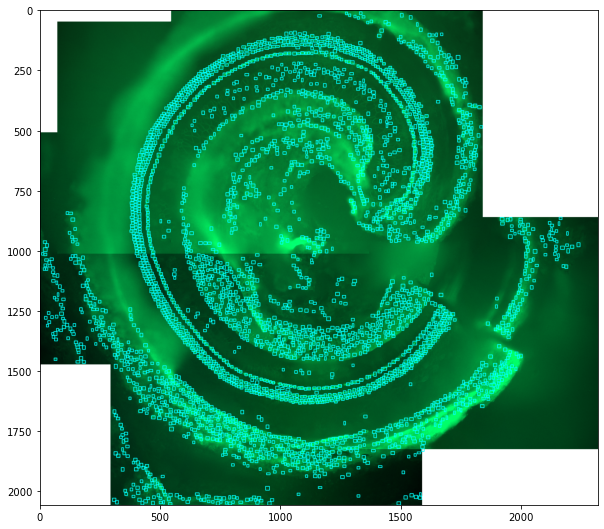

In [8]:
import matplotlib.pyplot as plt
##for (start_x, start_y, end_x, end_y), confidence in zip(bounding_boxes, confidence_score):
    ##cv2.rectangle(img_rgb, (start_x, start_y), (end_x, end_y), (0, 255, 255), 2)


picked_boxes, picked_score= nms(bounding_boxes, confidence_score, 0.05)
img_rgb1 = cv2.imread('00A.tif')
#img_rgb1 = cv2.imread('40B.jpg')

for (start_x, start_y, end_x, end_y), confidence in zip(picked_boxes, picked_score):
    cv2.rectangle(img_rgb1, (start_x, start_y), (end_x, end_y), (0, 255, 255), 2)
plt.figure(figsize=(10, 10))
plt.imshow(img_rgb1)
#plt.imshow(img_rgb1)

In [ ]:
img_rgb1 = cv2.imread('60B.tif')
print(img_rgb1.shape)
plt.figure(figsize=(10, 10))
height, width = img_rgb1.shape[:2]

center = (width/2, height/2)
rotate_matrix = cv2.getRotationMatrix2D(center=center, angle=90, scale=1)
rotated_image = cv2.warpAffine(src=img_rgb1, M=rotate_matrix, dsize=(width, height))
plt.imshow(rotated_image)


In [ ]:
#resizing images
scale_percent = 40
width = int(img_rgb1.shape[1] * scale_percent / 100)
height = int(img_rgb1.shape[0] * scale_percent / 100)
dim = (width, height)

img_rgb2 = cv2.imread('60B.jpg')
#img_rgb2 = cv2.imread('40B.jpg',flags=0)


org_image = cv2.resize(img_rgb2, dim, interpolation = cv2.INTER_AREA)
resized = cv2.resize(img_rgb1, dim, interpolation = cv2.INTER_AREA)
 
print('Resized Dimensions : ',resized.shape)
cv2.imshow("Original image", org_image)
cv2.imshow("Resized image", resized)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

###################################################################################################

In [9]:

#finding centroid from the bounding boxes
#x_min, y_min, width, height
def find_centroid(picked_points):
    centroids = []
    for idx, bbox in enumerate(picked_points):
        centroids.append([bbox[0]+((bbox[2] - bbox[0])/2), bbox[1]+((bbox[3]-bbox[1])/2)])
    return centroids

In [10]:
centroid = find_centroid(picked_boxes)
centroid[:10]

[[1626.0, 540.0],
 [973.0, 1585.0],
 [1429.0, 223.0],
 [909.0, 1566.0],
 [1101.0, 1631.0],
 [898.0, 1561.0],
 [1398.0, 212.0],
 [505.0, 1984.5],
 [1630.0, 563.0],
 [1026.0, 1593.0]]

In [11]:
x_arr = np.array(centroid)


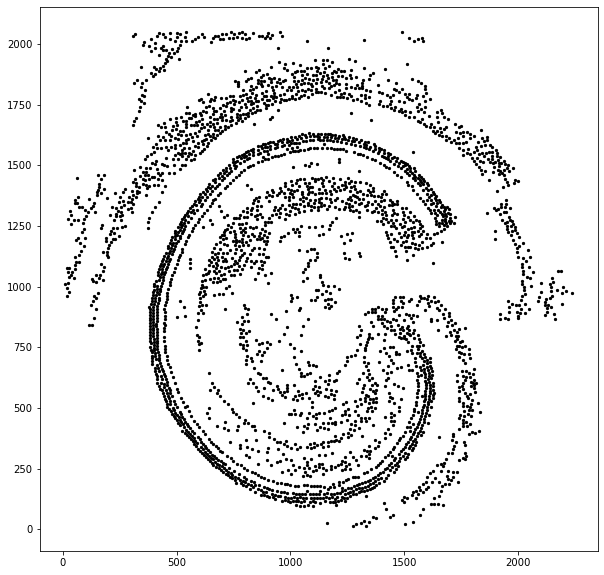

In [12]:
plt.figure(figsize=(10,10))
plt.scatter(x_arr[ : , 0], x_arr[ :, 1], s = 5, c = 'k')

In [124]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.datasets import make_circles
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

In [125]:
x_tr = StandardScaler().fit_transform(x_arr)

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(x_tr[ : , 0], x_tr[ :, 1], s = 5, c = 'k')

In [ ]:
from sklearn.neighbors import NearestNeighbors
nearest_neighbors = NearestNeighbors(n_neighbors=3)
neighbors = nearest_neighbors.fit(x_tr)
distances, indices = neighbors.kneighbors(x_tr)
distances = np.sort(distances[:,2], axis=0)
fig = plt.figure(figsize=(5, 5))
plt.plot(distances)
plt.xlabel("Points")
plt.ylabel("Distance")
plt.savefig("Distance_curve.png", dpi=300)

In [126]:

#y_pred = DBSCAN(eps=0.11, min_samples=5).fit_predict(x_tr)
#y_pred = DBSCAN(eps=0.058, min_samples=3).fit_predict(x_tr) #20B
#y_pred = DBSCAN(eps=0.068, min_samples=3).fit_predict(x_tr)# 20B
y_pred = DBSCAN(eps=0.1, min_samples=20).fit_predict(x_tr) #00A
#y_pred = DBSCAN(eps=0.1, min_samples=15).fit_predict(x_tr) #00A

#y_pred= DBSCAN(eps=0.052, min_samples=4).fit_predict(x_tr) #60B

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(x_tr[:,0], x_tr[:,1], c=y_pred, s=10)

In [14]:
print('Number of clusters: {}'.format(len(set(y_pred[np.where(y_pred != -1)]))))

Number of clusters: 72


In [ ]:
re_combined = pd.DataFrame({'x':x_tr[:,0], 'y':x_tr[:,1], 'labels':y_pred})
new_re_combined = re_combined[(re_combined.labels == 0)]

In [127]:
x_tr=x_tr.tolist()


In [128]:
y_pred = [[el] for el in y_pred]

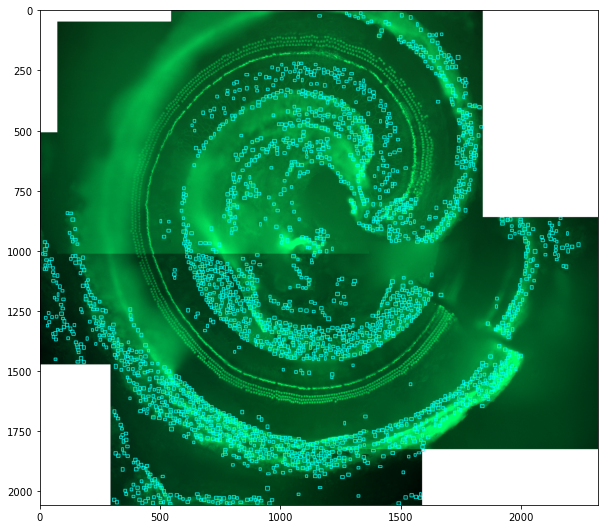

In [132]:
import pandas as pd
[ i+j+k+l for i,j,k,l in zip(picked_boxes, centroid,x_tr, y_pred)]
data_df = pd.DataFrame([ i+j+k+l for i,j,k,l in zip(picked_boxes, centroid, x_tr, y_pred)], columns = ['X_Start', 'Y_Start', 'X_End', 'Y_End', 'X_Centroid', 'Y_Centroid','X_scaled','Y_scaled', 'Cluster_Number'])

actual_display=data_df[["X_Start","Y_Start","X_End","Y_End"]][data_df['Cluster_Number']!=0]
#actual_display=data_df[["X_Start","Y_Start","X_End","Y_End"]]
img_rgb1 = cv2.imread('00A.tif')
#img_rgb1 = cv2.imread('40B.jpg')

for (start_x, start_y, end_x, end_y) in actual_display.values:
    cv2.rectangle(img_rgb1, (start_x, start_y), (end_x, end_y), (0, 255, 255), 2)
plt.figure(figsize=(10, 10))
plt.imshow(img_rgb1)

In [ ]:
actual_display=data_df[["X_Start","Y_Start","X_End","Y_End"]][data_df['Cluster_Number']==0]

In [ ]:
#actual_display=data_df[["X_Start","Y_Start","X_End","Y_End"]]
img_rgb1 = cv2.imread('60B.tif')
#img_rgb1 = cv2.imread('40B.jpg')

for (start_x, start_y, end_x, end_y) in actual_display.values:
    cv2.rectangle(img_rgb1, (start_x, start_y), (end_x, end_y), (0, 255, 255), 2)
plt.figure(figsize=(10, 10))
plt.imshow(img_rgb1)

In [ ]:
import pandas as pd
#combined = pd.DataFrame({'x':x_tr[:,0], 'y':x_tr[:,1], 'labels':y_pred})

#combined = pd.DataFrame({'x':x_tr[:,0], 'y':x_tr[:,1], 'labels':y_pred})
new_combined = data_df[(data_df.Cluster_Number == 0)]

In [ ]:
with pd.option_context("display.max_rows", None):
    display(data_df)

In [ ]:
with pd.option_context("display.max_rows", None):
    display(new_combined)

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(new_combined['X_scaled'], new_combined['Y_scaled'], c=new_combined['Cluster_Number'], s=10)

In [ ]:
print('Number of clusters: {}'.format(len(data_df['Cluster_Number'][data_df['Cluster_Number']!=-1].unique())))

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(or_img)

##############################################################################################

Re Clustering using DBSCAN on the output 

In [ ]:
for_re_cluster = new_combined[['X_scaled', 'Y_scaled']].to_numpy()
#for_re_cluster1 = new_combined1[['x', 'y']].to_numpy()

In [ ]:
from sklearn.neighbors import NearestNeighbors
nearest_neighbors = NearestNeighbors(n_neighbors=5)
neighbors = nearest_neighbors.fit(for_re_cluster)
distances, indices = neighbors.kneighbors(for_re_cluster)
distances = np.sort(distances[:,4], axis=0)
fig = plt.figure(figsize=(5, 5))
plt.plot(distances)
plt.xlabel("Points")
plt.ylabel("Distance")
plt.savefig("Distance_curve.png", dpi=300)

In [ ]:
re_y_pred = DBSCAN(eps=0.052, min_samples=4).fit_predict(for_re_cluster)
#re_y_pred1 = DBSCAN(eps=0.052, min_samples=4).fit_predict(for_re_cluster1)

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(for_re_cluster[:,0], for_re_cluster[:,1], c=re_y_pred, s=10)

In [ ]:
print('Number of clusters: {}'.format(len(set(re_y_pred[np.where(re_y_pred != 0)]))))

In [ ]:
re_y_pred1 = re_y_pred.tolist()

In [ ]:
new_combined = new_combined.assign(re_y_pred=[i for i in re_y_pred1])

In [ ]:
new_combined

In [ ]:
actual=(data_df.loc[new_combined.index])

In [ ]:
actual=actual.assign(re_y_pred=[i for i in re_y_pred1])


In [ ]:
actual.reset_index(drop=True,inplace=True)

In [ ]:
new_combined.reset_index(drop=True,inplace=True)

In [ ]:
img_rgb1 = cv2.imread('60B.tif')
#img_rgb1 = cv2.imread('40B.jpg')

for (start_x, start_y, end_x, end_y) in actual[["X_Start","Y_Start","X_End","Y_End"]][actual['re_y_pred']==0].values:
    cv2.rectangle(img_rgb1, (start_x, start_y), (end_x, end_y), (0, 255, 255), 2)
plt.figure(figsize=(10, 10))
plt.imshow(img_rgb1)

In [ ]:
with pd.option_context("display.max_rows", None):
    display(actual)

In [ ]:
with pd.option_context("display.max_rows", None):
    display(new_combined)

In [ ]:
with pd.option_context("display.max_rows", None):
    display(actual)

In [ ]:
print('Number of clusters: {}'.format(len(set(re_y_pred[np.where(re_y_pred!= -1)]))))

In [ ]:
with pd.option_context("display.max_rows", None):
    display(new_combined)

In [ ]:
with pd.option_context("display.max_rows", None):
    display(positive_class)

In [ ]:
positive_class=actual[["X_Start","Y_Start","X_End","Y_End"]][actual['re_y_pred']==0]

In [ ]:
negative_class=actual[["X_Start","Y_Start","X_End","Y_End"]][actual['re_y_pred']!=0]

In [ ]:
positive_class.reset_index(drop=True,inplace=True)

In [ ]:
negative_class.reset_index(drop=True,inplace=True)

In [ ]:
img_rgb1 = cv2.imread('20B.tif')
    
plt.figure(figsize=(10, 10))
plt.imshow(img_rgb1)


In [ ]:
##### 213 >214
img_rgb1 = cv2.imread('60B.tif')
#img_rgb1 = cv2.imread('40B.jpg')

for (start_x, start_y, end_x, end_y) in negative_class.values:
    cv2.rectangle(img_rgb1, (start_x, start_y), (end_x, end_y), (255,0,0), 3)

    
plt.figure(figsize=(10, 10))
plt.imshow(img_rgb1)

In [ ]:
negative_class.values[784]

In [ ]:
len(negative_class)

In [ ]:
#actual.index[actual['X_Start','Y_Start','X_End','Y_End']==[1873,1220,1889,1236]]

#np.where(actual['X_Start','Y_Start','X_End','Y_End']==[1873,1220,1889,1236],actual.index,0)

#np.where((actual['X_Start']==1873) & (actual['Y_Start']==1220) & (actual['X_End']==1889) & (actual['Y_End']==1236),actual.index,0)

actual.index[(actual['X_Start']==777) & (actual['Y_Start']==1905) & (actual['X_End']==789) & (actual['Y_End']==1915)]

In [ ]:
actual.loc[1572]

In [ ]:
new_combined.loc[1572]

In [ ]:
new_combined.at[1572,'re_y_pred']=0


In [ ]:
###### convert_to_list=actual[["X_Start","Y_Start","X_End","Y_End"]][actual["re_y_pred"]==0].values.tolist()
convert_to_list1=actual[["X_Start","Y_Start","X_End","Y_End"]][actual["re_y_pred"]!=0].values.tolist()

In [ ]:
positive_class=new_combined[["X_Start","Y_Start","X_End","Y_End"]][new_combined['re_y_pred']==0]

In [ ]:
negative_class=new_combined[["X_Start","Y_Start","X_End","Y_End"]][new_combined['re_y_pred']!=0]

In [ ]:
##### 213 >214
img_rgb1 = cv2.imread('60B.tif')
#img_rgb1 = cv2.imread('40B.jpg')

for (start_x, start_y, end_x, end_y) in positive_class.values:
    cv2.rectangle(img_rgb1, (start_x, start_y), (end_x, end_y), (255,0,0), 3)

    
plt.figure(figsize=(10, 10))
plt.imshow(img_rgb1)

In [ ]:
##### 213 >214
img_rgb1 = cv2.imread('60B.tif')
#img_rgb1 = cv2.imread('40B.jpg')

for (start_x, start_y, end_x, end_y) in negative_class.values:
    cv2.rectangle(img_rgb1, (start_x, start_y), (end_x, end_y), (255,0,0), 3)

    
plt.figure(figsize=(10, 10))
plt.imshow(img_rgb1)


In [ ]:
elif template_mod_dict_mod[2][3] in convert_to_list1:
    (start_x, start_y, end_x, end_y)=template_mod_dict_mod[2][3]
    cv2.rectangle(img_rgb1, (start_x, start_y), (end_x, end_y), (255, 0, 0), 3)
    plt.figure(figsize=(10, 10))
    plt.imshow(img_rgb1)
    print("1")

In [ ]:
len(template_mod_dict_mod[8])


In [ ]:
actual_display1=data_df[["X_Start","Y_Start","X_End","Y_End"]]
img_rgb1 = cv2.imread('20B.tif')
#img_rgb1 = cv2.imread('40B.jpg')

for (start_x, start_y, end_x, end_y) in actual_display1.values:
    cv2.rectangle(img_rgb1, (start_x, start_y), (end_x, end_y), (0, 255, 255), 2)
plt.figure(figsize=(10, 10))
plt.imshow(img_rgb1)

In [ ]:
z=[]
for (i,x,y,c) in actual_display.values:
    i,x,y,c=actual_display.values

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(for_re_cluster[:,0], for_re_cluster[:,1], c=re_y_pred, s=10)

In [ ]:
print('Number of clusters: {}'.format(len(set(y_pred[np.where(re_y_pred != -1)]))))

In [ ]:
re_combined = pd.DataFrame({'x':for_re_cluster[:,0], 'y':for_re_cluster[:,1], 'labels':re_y_pred})
new_re_combined = re_combined[(re_combined.labels == 0)]
plt.figure(figsize=(10,10))
plt.scatter(new_re_combined['x'], new_re_combined['y'], c=new_re_combined['labels'], s=10)


In [ ]:
data_df=data_df.sort_values(by = ['X_scaled', 'Y_scaled'])
recombined_sort=re_combined.sort_values(by = ['x', 'y'])

In [ ]:
data_df['common'] = np.where(data_df.X_scaled == recombined_sort.low, 'True', 'False')

In [ ]:
from matplotlib.lines import Line2D 

fig, ax = plt.subplots(figsize=(10, 10))

colors = {-1:'tab:blue', 0:'tab:orange', 1:'tab:green', 2:'tab:red', 3:'tab:purple', 4:'tab:brown', 5:'tab:pink', 6:'firebrick', 7:'aqua', 8:'wheat', 9:'slategray'}


ax.scatter(for_re_cluster1[:,0], for_re_cluster1[:,1], c=[colors[k] for k in re_y_pred1], s = 10)

# add a legend
handles = [Line2D([0], [0], marker='o', color='w', markerfacecolor=v, label=k, markersize=12) for k, v in colors.items()]
ax.legend(title='color', handles=handles, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

In [ ]:
print('Number of clusters: {}'.format(len(set(re_y_pred[np.where(re_y_pred != -1)]))))

In [ ]:
from matplotlib.lines import Line2D 

fig, ax = plt.subplots(figsize=(10, 10))

colors = {-1:'tab:blue', 0:'tab:orange', 1:'tab:green', 2:'tab:red', 3:'tab:purple', 4:'tab:brown', 5:'tab:pink', 6:'firebrick', 7:'aqua', 8:'wheat', 9:'slategray'}


ax.scatter(for_re_cluster[:,0], for_re_cluster[:,1], c=[colors[k] for k in re_y_pred], s = 10)

# add a legend
handles = [Line2D([0], [0], marker='o', color='w', markerfacecolor=v, label=k, markersize=12) for k, v in colors.items()]
ax.legend(title='color', handles=handles, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

In [ ]:
re_combined = pd.DataFrame({'x':for_re_cluster[:,0], 'y':for_re_cluster[:,1], 'labels':re_y_pred})
new_re_combined = re_combined[(re_combined.labels == 0)]

In [ ]:
re_combined

re_combined[(re_combined['y']==2.109908368667044)]

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(new_re_combined['x'], new_re_combined['y'], c=new_re_combined['labels'], s=10)

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(new_re_combined['x'], new_re_combined['y'], c=new_re_combined['labels'], s=10)

In [ ]:
re_y_pred = [[el] for el in re_y_pred]

In [ ]:
import pandas as pd
data_df = pd.DataFrame([ i+j for i,j in zip(picked_boxes,re_y_pred)], columns = ['X_Start', 'Y_Start', 'X_End', 'Y_End', 'Cluster_Number'])
data_df[(data_df.Cluster_Number == 0)]


In [ ]:
data_df[data_df.]

In [ ]:
import matplotlib.pyplot as plt
crop1_res = cv2.imread('60B.tif')
for (start_x, start_y, end_x, end_y) in data_df[data_df['Cluster_Number'] == 0][['X_Start', 'Y_Start', 'X_End', 'Y_End']].values:
    cv2.rectangle(crop1_res, (start_x, start_y), (end_x, end_y), (0, 255, 255), 1)

plt.imshow("Original image", crop1_res)
#cv2.waitKey()
#cv2.destroyAllWindows()


#resizing images
##img_rgb2 = cv2.imread('60B.tif')
##scale_percent = 40
##width = int(img_rgb2.shape[1] * scale_percent / 100)
##height = int(img_rgb2.shape[0] * scale_percent / 100)
##dim = (width, height)


##resized = cv2.resize(crop1_res, dim, interpolation = cv2.INTER_AREA)
#cv2.imshow("Original image", crop1_res)
##cv2.imshow("Resized image", resized)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

In [18]:
data_df['image_name']=np.nan
data_df['context_name']=np.nan

In [19]:
match = 0
non_match = 0
img = cv2.imread('60B.tif')
i=0
for (start_x, start_y, end_x, end_y, cluster_number) in data_df[['X_Start', 'Y_Start', 'X_End', 'Y_End', 'Cluster_Number']].values:
    center_y = start_y + int((end_y-start_y)/2)
    center_x = start_x + int((end_x-start_x)/2)
    if cluster_number == 0:
        if center_y-20 >= 0 and center_y+20 <= img.shape[0] and center_x-20 >=0 and center_x+20 <= img.shape[1]: 
            match +=1 
            roi_cell=img[start_y:end_y,start_x:end_x]
            roi_context = img[center_y-16:center_y+16, center_x-16:center_x+16] 
            #cv2.imwrite('Image_Corrupted_Distillation/Test/class1/'+'60B_'+str(match) + '.jpg', roi_cell)
            #cv2.imwrite('Image_Corrupted_Distillation/Test/class1/'+'60B_'+str(match)+'_context' + '.jpg', roi_context) 
            data_df['image_name'].loc[i] = '60B_'+str(match) + '.jpg'
            data_df['context_name'].loc[i] = '60B_'+str(match)+'_context' + '.jpg'
    else:
        if center_y-20 >= 0 and center_y+20 <= img.shape[0] and center_x-20 >=0 and center_x+20 <= img.shape[1]:
            non_match +=1 
            roi_cell=img[start_y:end_y,start_x:end_x]
            roi_context = img[center_y-16:center_y+16, center_x-16:center_x+16]
            #cv2.imwrite('Image_Corrupted_Distillation/Test/class0/'+'60B_'+str(non_match) + '.jpg', roi_cell)
            #cv2.imwrite('Image_Corrupted_Distillation/Test/class0/'+'60B_'+str(non_match)+'_context' + '.jpg', roi_context)
            data_df['image_name'].loc[i]  = '60B_'+str(match) + '.jpg'
            data_df['context_name'].loc[i] = '60B_'+str(match)+'_context' + '.jpg'
    i+=1

C:\Users\anind\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [ ]:
import os
import glob
# Get a list of all the file paths that ends with .txt from in specified directory
fileList=glob.glob('Image_Corrupted_Distillation/Test/class0/60B*')

for filePath in fileList:
    try:
        os.remove(filePath)
    except:
        print("Error while deleting file : ", filePath)

In [ ]:
glob.glob('Image_Corrupted_Distillation/Test/class0/60B*')

In [ ]:
data_df

In [ ]:
data_corrup_60B=data_df  #data_clean_20B,data_clean_00A,data_clean_60B,data_corrup_20B,data_corrup_00A

In [ ]:
data_df

In [ ]:
glob.glob('Images_Distillation/Train/class1/40B*', recursive=True)

In [31]:
import glob
import cv2
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import numpy as np
import torchvision
from torchvision import *
from torch.utils.data import Dataset, DataLoader

In [32]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [33]:
def scale_image(img_path,target_length=16):
    #img = plt.imread('images/'+image_name)  # Reading in the image 
    #print(img_path)
    img = cv2.imread(img_path)
    img_width = img.shape[1]
    img_height = img.shape[0]
    #target_length = 16
    img_target = np.zeros((target_length, target_length,3), np.uint8)
    if img_width >= img_height:
        scale_img_width = target_length
        scale_img_height = int( (float(scale_img_width)/img_width)*img_height )
        img_scaled = cv2.resize(img, (scale_img_width, scale_img_height), interpolation = cv2.INTER_AREA)
        copy_location = int((target_length-scale_img_height)/2)
        img_target[copy_location:copy_location+scale_img_height,:] = img_scaled
    else:
        # leaf_img_width < leaf_img_height:
        scale_img_height = target_length
        scale_img_width = int( (float(scale_img_height)/img_height)*img_width )
        img_scaled = cv2.resize(img, (scale_img_width, scale_img_height), interpolation = cv2.INTER_AREA)
        copy_location = int((target_length-scale_img_width)/2)
        img_target[:, copy_location:copy_location+scale_img_width] = img_scaled 

    return img_target

In [34]:
import os
class CustomDataset(Dataset):
    def __init__(self):
        #self.retrain=True
        self.imgs_path = r"Images_Clean_Data/Train/"
        #self.retrain=retrain
        #if self.retrain==True:
        file_list = []
        for root, dirs, files in os.walk(self.imgs_path):
            for file in dirs:
                file_list.append(os.path.join(root,file))
        if os.path.isdir ("Images_for_retraining/"):
            self.imgs_path1 = r"Images_for_retraining/"
            for root, dirs, files in os.walk(self.imgs_path1):
                for file in dirs:
                    file_list.append(os.path.join(root,file))
        print(file_list)
        self.data = []
        for class_path in file_list:
            class_name = class_path.split("/")[-1]
            for root, dirs, files  in os.walk(class_path):
                #print(root, dirs, files)
                for file in files:
                    if 'context' not in file:
                        context=file.split('.')[0]+'_context.jpg'
                        self.data.append([os.path.join(root+'/', file), os.path.join(root+'/', context), class_name])
        self.class_map = {"class0" : 0, "class1": 1}
        self.img_dim = (15, 15, 0)
    def __len__(self):
        return len(self.data)
    def __getitem__(self, idx):
        
        
        img_path, context_path, class_name = self.data[idx]
        if img_path.split('/')[0]=="Images_Clean_Data":
            img = scale_image(img_path, target_length=16)
            actual_image=os.path.basename(img_path)
        else:
            img=cv2.imread(img_path)
        #img = cv2.resize(img, self.img_dim)
        class_id = self.class_map[class_name]
        img_tensor = torch.from_numpy(img)
        img_tensor = img_tensor.permute(2, 0, 1)
        context_tensor = cv2.imread(context_path)
        context_tensor = torch.from_numpy(context_tensor)
        context_tensor = context_tensor.permute(2, 0, 1)
        
        class_id = torch.tensor([class_id])
        return actual_image,img_tensor, context_tensor,  class_id

In [35]:
import os
class CustomDatasetTest(Dataset):
    def __init__(self):
        #self.retrain=True
        self.imgs_path = r"Images_Clean_Data/Test/"
        #self.retrain=retrain
        #if self.retrain==True:
        file_list = []
        for root, dirs, files in os.walk(self.imgs_path):
            for file in dirs:
                file_list.append(os.path.join(root,file))

        print(file_list)
        self.data = []
        for class_path in file_list:
            class_name = class_path.split("/")[-1]
            for root, dirs, files  in os.walk(class_path):
                #print(root, dirs, files)
                for file in files:
                    if 'context' not in file:
                        context=file.split('.')[0]+'_context.jpg'
                        self.data.append([os.path.join(root+'/', file), os.path.join(root+'/', context), class_name])
        self.class_map = {"class0" : 0, "class1": 1}
        self.img_dim = (15, 15, 0)
    def __len__(self):
        return len(self.data)
    def __getitem__(self, idx):
        
        
        img_path, context_path, class_name = self.data[idx]
        actual_image=os.path.basename(img_path)
        img = scale_image(img_path, target_length=16)
        #img = cv2.resize(img, self.img_dim)
        class_id = self.class_map[class_name]
        img_tensor = torch.from_numpy(img)
        img_tensor = img_tensor.permute(2, 0, 1)
        context_tensor = cv2.imread(context_path)
        context_tensor = torch.from_numpy(context_tensor)
        context_tensor = context_tensor.permute(2, 0, 1)
        
        class_id = torch.tensor([class_id])
        return actual_image,img_tensor, context_tensor,  class_id

In [36]:
dataset = CustomDataset()
datasetTest = CustomDatasetTest()

['Images_Clean_Data/Train/class0', 'Images_Clean_Data/Train/class1']
['Images_Clean_Data/Test/class0', 'Images_Clean_Data/Test/class1']


In [37]:
import numpy as np
from torch.utils.data.sampler import SubsetRandomSampler
batch_size = 10
def split_index(n, val_pct):
    n_val = int(n*val_pct)
    idxs = np.random.RandomState(seed=100).permutation(n)
    return idxs[n_val:], idxs[:n_val]
train_indices, val_indices = split_index(dataset.__len__(), val_pct = 0.3)
train_samples = SubsetRandomSampler(train_indices)
train_loader = DataLoader(dataset, batch_size, train_samples, drop_last=True)
val_samples = SubsetRandomSampler(val_indices)
val_loader = DataLoader(dataset, batch_size, val_samples, drop_last=True)

In [38]:
import numpy as np
from torch.utils.data.sampler import SubsetRandomSampler
dataset_size = datasetTest.__len__()
test_indices = list(range(dataset_size))
np.random.seed(0)
np.random.shuffle(test_indices)
batch_size = 10
test_samples = SubsetRandomSampler(test_indices)
test_loader = DataLoader(datasetTest, batch_size, test_samples, drop_last=True)

In [39]:
class Cell_ResNet_teacher(nn.Module):
    def __init__(self, cell_resnet, context_resnet):
        super(Cell_ResNet_teacher, self).__init__()
        self.cell_net = cell_resnet
        self.context_net = context_resnet
        self.fc1 = nn.Linear(1536, 2)
    def forward(self, cell, context):
        x = self.cell_net(cell)
        x = x.view(batch_size,-1)
        y = self.context_net(context)
        y = y.view(batch_size,-1)
        z = torch.cat((x, y), dim=1)
        z = self.fc1(z)
        return z

In [40]:
net1_teacher = models.resnet18(pretrained=True)
req_features = list(net1_teacher.children())[:6]
Cell_ResNet_Features_teacher = nn.Sequential(*req_features)

net2_teacher = models.resnet18(pretrained=True)
req_features = list(net2_teacher.children())[:7]
Context_ResNet_Features_teacher = nn.Sequential(*req_features)

In [ ]:
import torch.nn as nn
class Cell_Net_Student(nn.Module):
    def __init__(self):
        super(Cell_Net_Student,self).__init__()
        self.conv1 = nn.Conv2d(3, 64, 7, 2,3,bias=True)
        self.relu1=nn.ReLU()
        self.conv2 = nn.Conv2d(64, 32, 3, 1,1,bias=True)
        self.relu2=nn.ReLU()
        self.fc = nn.Linear(8, 2)
        self.relu3=nn.ReLU()
    def forward(self,x):
        x=self.conv1(x) 
        x=self.relu1(x)
        x=self.conv2(x)
        x=self.relu2(x)
        x = self.fc(x)
        x = self.relu3(x)
        return x
class Context_Net_Student(nn.Module):
    def __init__(self):
        super(Context_Net_Student,self).__init__()
        self.conv1 = nn.Conv2d(3, 64, 7, 2,3,bias=True)
        self.relu1=nn.ReLU()
        self.conv2 = nn.Conv2d(64, 32, 3, 1,1,bias=True)
        self.relu2=nn.ReLU()
        self.fc = nn.Linear(16, 2)
        self.relu3=nn.ReLU()
    def forward(self,x):
        x=self.conv1(x) 
        x=self.relu1(x)
        x=self.conv2(x)
        x=self.relu2(x)
        x = self.fc(x)
        x = self.relu3(x)
        return x

In [ ]:
net1_student = Cell_Net_Student()
req_features = list(net1_student.children())
Cell_student = nn.Sequential(*req_features)
net2_student = Context_Net_Student()
req_features = list(net2_student.children())
Context_student = nn.Sequential(*req_features)

In [ ]:
class Cell_Context_Student(nn.Module):
    def __init__(self, cell_student, context_student):
        super(Cell_Context_Student, self).__init__()
        self.cell_net = cell_student
        self.context_net = context_student
        self.fc1 = nn.Linear(1536, 2)
    def forward(self, cell, context):
        x = self.cell_net(cell)
        x = x.view(batch_size,-1)
        y = self.context_net(context)
        y = y.view(batch_size,-1)
        z = torch.cat((x, y), dim=1)
        z = self.fc1(z)
        return z

In [41]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
net_teacher = Cell_ResNet_teacher(Cell_ResNet_Features_teacher, Context_ResNet_Features_teacher)
net_teacher1 = Cell_ResNet_teacher(Cell_ResNet_Features_teacher, Context_ResNet_Features_teacher)
net_teacher2=Cell_ResNet_teacher(Cell_ResNet_Features_teacher, Context_ResNet_Features_teacher)
#net_student= Cell_Context_Student(Cell_student,Context_student)
#net_self_distill=Cell_ResNet_teacher(Cell_ResNet_Features_teacher, Context_ResNet_Features_teacher)

#net_self_distill_10=Cell_ResNet_teacher(Cell_ResNet_Features_teacher, Context_ResNet_Features_teacher)
#net_self_distill_rev=Cell_ResNet_teacher(Cell_ResNet_Features_teacher, Context_ResNet_Features_teacher)


In [42]:
net_student= Cell_ResNet_teacher(Cell_ResNet_Features_teacher, Context_ResNet_Features_teacher)


In [28]:
net_teacher2._modules['fc1'].weight.data.normal_(mean=0.0, std=1.0)

tensor([[ 0.2943, -0.0182,  0.7127,  ..., -0.4179,  0.4104, -1.1958],
        [ 0.6561, -0.3024, -0.2157,  ...,  1.2137,  1.0323,  0.6594]])

In [25]:
net_self_distill=Cell_ResNet_teacher(Cell_ResNet_Features_teacher, Context_ResNet_Features_teacher)

In [60]:
net_self_distill_10=Cell_ResNet_teacher(Cell_ResNet_Features_teacher, Context_ResNet_Features_teacher)

In [69]:
net_self_distill_rev=Cell_ResNet_teacher(Cell_ResNet_Features_teacher, Context_ResNet_Features_teacher)


In [90]:
net_self_distill_10_rev=Cell_ResNet_teacher(Cell_ResNet_Features_teacher, Context_ResNet_Features_teacher)

In [ ]:
dataiter = iter(train_loader)
image_name,cell_data, context_data, target_ = dataiter.next()
cell_data = cell_data.float()
context_data = context_data.float()
cell_data, context_data, target_ = cell_data.to(device), context_data.to(device),  target_.to(device)
net_student(cell_data,context_data)

In [65]:

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net_teacher.parameters(), lr=0.001, momentum=0.9)

In [14]:
import torch.nn.functional as F
n_epochs = 150
print_every = 10
teacher_valid_loss_min = np.Inf
teacher_val_loss = []
teacher_val_acc = []
teacher_train_loss = []
teacher_train_acc = []
total_step = len(train_loader)
epsilon = 1e-7
for epoch in range(1, n_epochs+1):
    running_loss = 0.0
    correct = 0
    total=0
    print(f'Epoch {epoch}\n')
    for batch_idx, (image_name,cell_data, context_data, target_) in enumerate(train_loader):
        #print(image_name)
     
        cell_data = cell_data.float()
        context_data = context_data.float()
        cell_data, context_data, target_ = cell_data.to(device), context_data.to(device),  target_.to(device)
        target_ = torch.squeeze(target_)
        outputs = net_teacher(cell_data, context_data)
        loss = criterion(outputs, target_)
        running_loss += loss.item()
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        _,pred = torch.max(outputs, dim=1)
        correct += torch.sum(pred==target_).item()
        total += target_.size(0)
        if (batch_idx) % 20 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' .format(epoch, n_epochs, batch_idx, total_step, loss.item()))
    teacher_train_acc.append(100 * correct / total)
    teacher_train_loss.append(running_loss/total_step)
    print(f'\ntrain-loss: {np.mean(teacher_train_loss):.4f}, train-acc: {(100 * correct/total):.4f}')
    batch_loss = 0
    total_t=0
    correct_t=0
    with torch.no_grad():
        net_teacher.eval()
        for val_image_name,cell_data, context_data, target_t in (val_loader):
            cell_data, context_data, target_t = cell_data.to(device), context_data.to(device), target_t.to(device)
            cell_data = cell_data.float()
            context_data = context_data.float()
            target_t = torch.squeeze(target_t)
            outputs_t = net_teacher(cell_data, context_data)
            loss_t = criterion(outputs_t, target_t)
            batch_loss += loss_t.item()
            _,pred_t = torch.max(outputs_t, dim=1)
            correct_t += torch.sum(pred_t==target_t).item()
            
            total_t += target_t.size(0)
        teacher_val_acc.append(100 * correct_t/total_t)
        teacher_val_loss.append(batch_loss/len(val_loader))
        network_learned = batch_loss < teacher_valid_loss_min
        print(f'validation loss: {np.mean(teacher_val_loss):.4f}, validation acc: {(100 * correct_t/total_t):.4f}\n')
        
        
        if network_learned:
            teacher_valid_loss_min = batch_loss
            torch.save(net_teacher.state_dict(), 'resnet_teacher.pt')
            print('Improvement-Detected, save-model')
    net_teacher.train()


    

Epoch 1

Epoch [1/150], Step [0/578], Loss: 0.6785
Epoch [1/150], Step [20/578], Loss: 0.7909
Epoch [1/150], Step [40/578], Loss: 0.3171
Epoch [1/150], Step [60/578], Loss: 0.3325
Epoch [1/150], Step [80/578], Loss: 0.6514
Epoch [1/150], Step [100/578], Loss: 0.7540
Epoch [1/150], Step [120/578], Loss: 0.2015
Epoch [1/150], Step [140/578], Loss: 0.1656
Epoch [1/150], Step [160/578], Loss: 0.3311
Epoch [1/150], Step [180/578], Loss: 0.2367
Epoch [1/150], Step [200/578], Loss: 0.1617
Epoch [1/150], Step [220/578], Loss: 0.1754
Epoch [1/150], Step [240/578], Loss: 0.1473
Epoch [1/150], Step [260/578], Loss: 0.1342
Epoch [1/150], Step [280/578], Loss: 0.0302
Epoch [1/150], Step [300/578], Loss: 0.5577
Epoch [1/150], Step [320/578], Loss: 0.1140
Epoch [1/150], Step [340/578], Loss: 0.2532
Epoch [1/150], Step [360/578], Loss: 0.0328
Epoch [1/150], Step [380/578], Loss: 0.0289
Epoch [1/150], Step [400/578], Loss: 0.5261
Epoch [1/150], Step [420/578], Loss: 0.1207
Epoch [1/150], Step [440/578]

In [27]:
net_teacher.load_state_dict(torch.load("resnet_teacher.pt", map_location=device))

<All keys matched successfully>

In [28]:
teacher_test_acc=[]
teacher_test_loss=[]
teacher_dict=dict()
n_epochs=150
for epoch in range(1, n_epochs+1):
    cum_loss=0
    total_t=0
    correct_t=0
    with torch.no_grad():
        for image_name,cell_data, context_data, target_t in test_loader:
            cell_data, context_data, target_t = cell_data.to(device), context_data.to(device), target_t.to(device)
            cell_data = cell_data.float()
            context_data = context_data.float()
            target_t = torch.squeeze(target_t)
            outputs_t = net_teacher(cell_data, context_data)
        #outputs_t = F.softmax(outputs_t, dim=1)
            loss_t = criterion(outputs_t, target_t)
            cum_loss += loss_t.item()
            pred_t = F.softmax(outputs_t, dim=1)
            _,pred_t = torch.max(pred_t, dim=1)
            correct_t+= torch.sum(pred_t==target_t).item()
            teacher_dict[loss_t]=(image_name,cell_data,context_data,target_t,pred_t,outputs_t)
            total_t += target_t.size(0)
        teacher_test_acc.append(100 * correct_t/total_t)
        teacher_test_loss.append(cum_loss/len(test_loader))
    
    print(f'teacher test loss: {np.mean(teacher_test_loss):.4f}, teacher test acc: {100 * correct_t/total_t:.4f}\n')
        
sorted_teacher_dict = dict(sorted(zip(teacher_dict.keys(), teacher_dict.values()),reverse=True))


teacher test loss: 0.6799, teacher test acc: 91.6290

teacher test loss: 0.7019, teacher test acc: 90.7240

teacher test loss: 0.7088, teacher test acc: 90.8145

teacher test loss: 0.7105, teacher test acc: 90.9050

teacher test loss: 0.7148, teacher test acc: 91.2670

teacher test loss: 0.7132, teacher test acc: 91.0407

teacher test loss: 0.7160, teacher test acc: 90.5430

teacher test loss: 0.7154, teacher test acc: 91.2670

teacher test loss: 0.7154, teacher test acc: 91.2670

teacher test loss: 0.7150, teacher test acc: 91.1312

teacher test loss: 0.7152, teacher test acc: 90.8145

teacher test loss: 0.7176, teacher test acc: 90.9955

teacher test loss: 0.7183, teacher test acc: 91.0407

teacher test loss: 0.7183, teacher test acc: 91.2217

teacher test loss: 0.7182, teacher test acc: 91.4480

teacher test loss: 0.7185, teacher test acc: 90.6335

teacher test loss: 0.7179, teacher test acc: 91.2670

teacher test loss: 0.7183, teacher test acc: 90.9050

teacher test loss: 0.7176, t

In [ ]:
teacher_test_acc

In [12]:
len(teacher_test_acc)

NameError: name 'teacher_test_acc' is not defined

In [14]:
criterion = nn.CrossEntropyLoss()
optimizer=optim.SGD(list(net_teacher1.parameters()) + list(net_teacher2.parameters()),lr=0.001, momentum=0.9)

def accuracy(out, labels):
    _,pred = torch.max(out, dim=1)
    return torch.sum(pred==labels).item()
           

C:\Users\anind\anaconda3\lib\site-packages\torch\optim\sgd.py:101: UserWarning: optimizer contains a parameter group with duplicate parameters; in future, this will cause an error; see github.com/pytorch/pytorch/issues/40967 for more information
  super(SGD, self).__init__(params, defaults)


In [15]:
import torch.nn.functional as F
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import math
n_epochs = 150
print_every = 10
CCT_valid_loss_min = np.Inf
CCT_val_loss = []
CCT_val_acc1 = []
CCT_val_acc2 = []
CCT_val_avg_Acc = []
CCT_train_loss = []
CCT_train_acc1 = []
CCT_train_acc2=[]
CCT_avg_correct=[]
total_step = len(train_loader)
epsilon = 1e-7
co_lambda_max=0.9
beta=0.65
e_r = 0.9 * n_epochs
CCT_precision_Score1=[]
CCT_f1_Score1=[]
CCT_recall_Score1=[]
CCT_precision_Score1=[]
CCT_f1_Score2=[]
CCT_recall_Score2=[]
CCT_precision_Score2=[]
CCT_f1_Score_avg=[]
CCT_recall_Score_avg=[]
CCT_precision_Score_avg=[]
consistency_Loss=[]
cross_entr_Loss=[]
cross_entr_L1=[]
cross_entr_L2=[]
consistency_Val_Loss=[]
cross_entr_Val_Loss=[]
cross_entr_VL1=[]
cross_entr_VL2=[]
co_lambda_L=[]

#custom_softmax=[]
#actual_softmax=[]
x=dict()
for epoch in range(1, n_epochs+1):
    running_loss = 0.0
    correct1 = 0
    correct2=0
    avg_correct=0
    total=0
    consistency_L=0.0
    cross_entr_L=0.0
    cross_entr_L1d=0.0
    cross_entr_L2d=0.0
    co_lambda = co_lambda_max * math.exp(-1.0 * beta * (1.0 - epoch / e_r ) ** 2)
    co_lambda_L.append(co_lambda)

    print(f'Epoch {epoch}\n')
    for batch_idx, (image_name,cell_data, context_data, target_) in enumerate(train_loader):
        #print(image_name)
     
        cell_data = cell_data.float()
        context_data = context_data.float()
        cell_data, context_data, target_ = cell_data.to(device), context_data.to(device),  target_.to(device)
  
        target_ = torch.squeeze(target_)
        outputs_teacher1 = net_teacher1(cell_data, context_data)
        outputs_teacher2 = net_teacher2(cell_data, context_data)
        #print("kl1 {}".format(F.kl_div(F.log_softmax(outputs_teacher1, dim=1),F.softmax(outputs_teacher2, dim=1),reduce=False)))
        #print("kl2 {}".format(F.kl_div(F.log_softmax(outputs_teacher2, dim=1),F.softmax(outputs_teacher1, dim=1),reduce=False)))
        kl = F.kl_div(F.log_softmax(outputs_teacher1, dim=1),F.softmax(outputs_teacher2, dim=1),reduce=False)+F.kl_div(F.log_softmax(outputs_teacher2, dim=1),F.softmax(outputs_teacher1, dim=1),reduce=True)
        kl=torch.mean(torch.sum(kl, dim=1))
        #print("kl{}".format(kl))
        loss_ce_1 = F.cross_entropy(outputs_teacher1, target_) 
        cross_entr_L1d+=loss_ce_1.data.item()
        loss_ce_2 = F.cross_entropy(outputs_teacher2, target_) 
        cross_entr_L2d+=loss_ce_2.data.item()
        loss_ce =   (1 - co_lambda) * 0.33 * (loss_ce_1 + loss_ce_2)
        consistencyLoss =  co_lambda * 0.33 * (kl)
        loss  =  (consistencyLoss + loss_ce).cpu()
        consistency_L+=consistencyLoss.data.item()
        cross_entr_L+=loss_ce.data.item()
        running_loss += loss.data.item()
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        outputs_Soft_teacher1=F.softmax(outputs_teacher1, dim=1)
        _,pred1 = torch.max(outputs_Soft_teacher1, dim=1)
        outputs_Soft_teacher2=F.softmax(outputs_teacher2, dim=1)
        _,pred2 = torch.max(outputs_Soft_teacher2, dim=1)
        outputs_teacher_all=0.33*(outputs_teacher1+outputs_teacher2)
        outputs_Soft_teacher=F.softmax(outputs_teacher_all, dim=1)
        _,avg_pred = torch.max(outputs_Soft_teacher, dim=1)
        correct1 += torch.sum(pred1==target_).item()
        correct2 += torch.sum(pred2==target_).item()
        avg_correct += torch.sum(avg_pred==target_).item()
        total += target_.size(0)
        if (batch_idx) % 20 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' .format(epoch, n_epochs, batch_idx, total_step, loss.data.item()))

    CCT_train_acc1.append(100 * correct1 / total)
    CCT_train_acc2.append(100 * correct2 / total)
    CCT_avg_correct.append(100 * avg_correct / total)
    f1_Score1=f1_score(target_, pred1)
    CCT_f1_Score1.append(f1_Score1)
    f1_Score2=f1_score(target_, pred2)
    CCT_f1_Score2.append(f1_Score2)
    f1_Score_avg=f1_score(target_, avg_pred)
    CCT_f1_Score_avg.append(f1_Score_avg)
    recall_Score1=recall_score(target_, pred1)
    CCT_recall_Score1.append(recall_Score1)
    recall_Score2=recall_score(target_, pred2)
    CCT_recall_Score2.append(recall_Score2)
    recall_Score_avg=recall_score(target_, avg_pred)
    CCT_recall_Score_avg.append(recall_Score_avg)
    precision_Score1=precision_score(target_, pred1)
    CCT_precision_Score1.append(precision_Score1)
    precision_Score2=precision_score(target_, pred2)
    CCT_precision_Score2.append(precision_Score2)
    precision_Score_avg=precision_score(target_, avg_pred)
    CCT_precision_Score_avg.append(precision_Score_avg)
    CCT_train_loss.append(running_loss/total_step)
    consistency_Loss.append(consistency_L/total_step)
    cross_entr_Loss.append(cross_entr_L/total_step)
    cross_entr_L1.append(cross_entr_L1d/total_step)
    cross_entr_L2.append(cross_entr_L2d/total_step)
    print(f'\ntrain-loss: {np.mean(CCT_train_loss):.4f}, train_acc1: {(100 * correct1/total):.4f}, train_acc2: {(100 * correct2/total):.4f},train_acc_avg: {(100 * avg_correct/total):.4f},recall_Score_avg: {recall_Score_avg},precision_Score_avg: {precision_Score_avg}, f1_Score_avg: {f1_Score_avg}')
    batch_loss=0
    consistency_Val_L=0
    cross_entr_Val_L=0
    cross_entr_Val_L1=0
    cross_entr_Val_L2=0
    total_t=0
    correct_val1=0
    correct_val2=0
    correct_val_avg=0
    with torch.no_grad():
        net_teacher1.eval()
        net_teacher2.eval()
        
        for val_image_name,cell_data, context_data, target_t in (val_loader):
            cell_data, context_data, target_t = cell_data.to(device), context_data.to(device), target_t.to(device)
            cell_data = cell_data.float()
            context_data = context_data.float()
            target_t = torch.squeeze(target_t)
            outputs_val1 = net_teacher1(cell_data, context_data)
            outputs_val2 = net_teacher2(cell_data, context_data)
            outputs_Soft_val_teacher1=F.softmax(outputs_val1, dim=1)
            outputs_Soft_val_teacher2=F.softmax(outputs_val2, dim=1)
            outputs_teacher_val=0.33*(outputs_val1+outputs_val2)
            outputs_Soft_val=F.softmax(outputs_teacher_val, dim=1)
            _,pred_val1 = torch.max(outputs_Soft_val_teacher1, dim=1)
            _,pred_val2 = torch.max(outputs_Soft_val_teacher2, dim=1)
            _,pred_val_avg = torch.max(outputs_Soft_val, dim=1)
            kl_val = F.kl_div(F.log_softmax(outputs_val1, dim=1),F.softmax(outputs_val2, dim=1),reduce=False)+F.kl_div(F.log_softmax(outputs_val2, dim=1),F.softmax(outputs_val1, dim=1),reduce=True)
            kl_val=torch.mean(torch.sum(kl_val, dim=1))
            loss_ce_val1 = F.cross_entropy(outputs_val1, target_t) 
            loss_ce_val2 = F.cross_entropy(outputs_val2, target_t) 
            loss_ce_val =   (1 - co_lambda) * 0.33 * (loss_ce_val1 + loss_ce_val2)
            consistencyLoss_val =  co_lambda * 0.33 * (kl_val)
            consistency_Val_L+=consistencyLoss_val.data.item()
            cross_entr_Val_L+=loss_ce_val.data.item()
            cross_entr_Val_L1+=loss_ce_val1.data.item()
            cross_entr_Val_L2+=loss_ce_val2.data.item()
            loss_val =(consistencyLoss_val + loss_ce_val).cpu()
            batch_loss+=loss_val.data.item()
            correct_val1 += torch.sum(pred_val1==target_t).item()
            correct_val2 += torch.sum(pred_val2==target_t).item()
            correct_val_avg += torch.sum(pred_val_avg==target_t).item()
            total_t += target_t.size(0)
        CCT_val_acc1.append(100 * correct_val1/total_t)
        CCT_val_acc2.append(100 * correct_val2/total_t)
        CCT_val_avg_Acc.append(100 * correct_val_avg/total_t)
        CCT_val_loss.append(batch_loss/len(val_loader))
        consistency_Val_Loss.append(consistency_Val_L/len(val_loader))
        cross_entr_Val_Loss.append(cross_entr_Val_L/len(val_loader))
        cross_entr_VL1.append(cross_entr_Val_L1/len(val_loader))
        cross_entr_VL2.append(cross_entr_Val_L2/len(val_loader))
        network_learned = batch_loss < CCT_valid_loss_min
        print(f'validation loss: {np.mean(CCT_val_loss):.4f}, validation acc1: {(100 * correct_val1/total_t):.4f}\n, validation acc2: {(100 * correct_val2/total_t):.4f}\n, avg_validation_acc: {(100 * correct_val_avg/total_t):.4f}\n')
        
        
        if network_learned:
            CCT_valid_loss_min = batch_loss
            torch.save(net_teacher1.state_dict(), 'net_teacher1.pt')
            torch.save(net_teacher2.state_dict(), 'net_teacher2.pt')
            print('Improvement-Detected, save-model')
    net_teacher1.train()
    net_teacher2.train()

    

Epoch 1



C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))
C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


Epoch [1/150], Step [0/578], Loss: 3.0073
Epoch [1/150], Step [20/578], Loss: 1.6280
Epoch [1/150], Step [40/578], Loss: 0.5614
Epoch [1/150], Step [60/578], Loss: 1.6380
Epoch [1/150], Step [80/578], Loss: 0.5750
Epoch [1/150], Step [100/578], Loss: 0.8165
Epoch [1/150], Step [120/578], Loss: 0.3609
Epoch [1/150], Step [140/578], Loss: 0.7155
Epoch [1/150], Step [160/578], Loss: 0.2290
Epoch [1/150], Step [180/578], Loss: 0.3769
Epoch [1/150], Step [200/578], Loss: 0.3471
Epoch [1/150], Step [220/578], Loss: 0.0740
Epoch [1/150], Step [240/578], Loss: 0.0858
Epoch [1/150], Step [260/578], Loss: 0.7132
Epoch [1/150], Step [280/578], Loss: 0.0281
Epoch [1/150], Step [300/578], Loss: 0.0376
Epoch [1/150], Step [320/578], Loss: 0.0872
Epoch [1/150], Step [340/578], Loss: 0.0663
Epoch [1/150], Step [360/578], Loss: 0.0325
Epoch [1/150], Step [380/578], Loss: 0.1796
Epoch [1/150], Step [400/578], Loss: 0.5200
Epoch [1/150], Step [420/578], Loss: 0.4446
Epoch [1/150], Step [440/578], Loss: 0

C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))
C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


validation loss: 0.0652, validation acc1: 97.3529
, validation acc2: 96.8685
, avg_validation_acc: 97.4048

Improvement-Detected, save-model
Epoch 2

Epoch [2/150], Step [0/578], Loss: 0.2155
Epoch [2/150], Step [20/578], Loss: 0.0300
Epoch [2/150], Step [40/578], Loss: 0.0158
Epoch [2/150], Step [60/578], Loss: 0.0323
Epoch [2/150], Step [80/578], Loss: 0.1259
Epoch [2/150], Step [100/578], Loss: 0.0052
Epoch [2/150], Step [120/578], Loss: 0.0065
Epoch [2/150], Step [140/578], Loss: 0.1736
Epoch [2/150], Step [160/578], Loss: 0.0853
Epoch [2/150], Step [180/578], Loss: 0.0952
Epoch [2/150], Step [200/578], Loss: 0.0340
Epoch [2/150], Step [220/578], Loss: 0.0047
Epoch [2/150], Step [240/578], Loss: 0.2025
Epoch [2/150], Step [260/578], Loss: 0.2142
Epoch [2/150], Step [280/578], Loss: 0.0738
Epoch [2/150], Step [300/578], Loss: 0.5498
Epoch [2/150], Step [320/578], Loss: 0.4342
Epoch [2/150], Step [340/578], Loss: 0.0103
Epoch [2/150], Step [360/578], Loss: 0.0028
Epoch [2/150], Step 

C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))
C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


validation loss: 0.0510, validation acc1: 98.2872
, validation acc2: 98.3045
, avg_validation_acc: 98.3737

Improvement-Detected, save-model
Epoch 3

Epoch [3/150], Step [0/578], Loss: 0.0074
Epoch [3/150], Step [20/578], Loss: 0.0043
Epoch [3/150], Step [40/578], Loss: 0.0313
Epoch [3/150], Step [60/578], Loss: 0.0743
Epoch [3/150], Step [80/578], Loss: 0.0493
Epoch [3/150], Step [100/578], Loss: 0.0038
Epoch [3/150], Step [120/578], Loss: 0.0543
Epoch [3/150], Step [140/578], Loss: 0.0779
Epoch [3/150], Step [160/578], Loss: 0.0063
Epoch [3/150], Step [180/578], Loss: 0.1143
Epoch [3/150], Step [200/578], Loss: 0.0037
Epoch [3/150], Step [220/578], Loss: 0.0557
Epoch [3/150], Step [240/578], Loss: 0.0044
Epoch [3/150], Step [260/578], Loss: 0.0105
Epoch [3/150], Step [280/578], Loss: 0.0056
Epoch [3/150], Step [300/578], Loss: 0.2393
Epoch [3/150], Step [320/578], Loss: 0.0046
Epoch [3/150], Step [340/578], Loss: 0.0165
Epoch [3/150], Step [360/578], Loss: 0.0256
Epoch [3/150], Step 

C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))
C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


validation loss: 0.0405, validation acc1: 98.8927
, validation acc2: 98.9792
, avg_validation_acc: 99.0657

Improvement-Detected, save-model
Epoch 4

Epoch [4/150], Step [0/578], Loss: 0.0180
Epoch [4/150], Step [20/578], Loss: 0.0009
Epoch [4/150], Step [40/578], Loss: 0.0673
Epoch [4/150], Step [60/578], Loss: 0.0252
Epoch [4/150], Step [80/578], Loss: 0.0061
Epoch [4/150], Step [100/578], Loss: 0.0025
Epoch [4/150], Step [120/578], Loss: 0.0070
Epoch [4/150], Step [140/578], Loss: 0.0853
Epoch [4/150], Step [160/578], Loss: 0.0042
Epoch [4/150], Step [180/578], Loss: 0.0012
Epoch [4/150], Step [200/578], Loss: 0.0019
Epoch [4/150], Step [220/578], Loss: 0.0055
Epoch [4/150], Step [240/578], Loss: 0.0130
Epoch [4/150], Step [260/578], Loss: 0.0075
Epoch [4/150], Step [280/578], Loss: 0.0240
Epoch [4/150], Step [300/578], Loss: 0.2297
Epoch [4/150], Step [320/578], Loss: 0.0358
Epoch [4/150], Step [340/578], Loss: 0.0079
Epoch [4/150], Step [360/578], Loss: 0.0038
Epoch [4/150], Step 

C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))
C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


validation loss: 0.0345, validation acc1: 99.0138
, validation acc2: 98.8581
, avg_validation_acc: 99.1349

Improvement-Detected, save-model
Epoch 5

Epoch [5/150], Step [0/578], Loss: 0.0272
Epoch [5/150], Step [20/578], Loss: 0.0022
Epoch [5/150], Step [40/578], Loss: 0.0027
Epoch [5/150], Step [60/578], Loss: 0.0042
Epoch [5/150], Step [80/578], Loss: 0.0904
Epoch [5/150], Step [100/578], Loss: 0.0349
Epoch [5/150], Step [120/578], Loss: 0.0020
Epoch [5/150], Step [140/578], Loss: 0.0165
Epoch [5/150], Step [160/578], Loss: 0.0378
Epoch [5/150], Step [180/578], Loss: 0.0295
Epoch [5/150], Step [200/578], Loss: 0.0012
Epoch [5/150], Step [220/578], Loss: 0.0139
Epoch [5/150], Step [240/578], Loss: 0.0066
Epoch [5/150], Step [260/578], Loss: 0.0342
Epoch [5/150], Step [280/578], Loss: 0.0025
Epoch [5/150], Step [300/578], Loss: 0.0818
Epoch [5/150], Step [320/578], Loss: 0.0012
Epoch [5/150], Step [340/578], Loss: 0.1496
Epoch [5/150], Step [360/578], Loss: 0.0014
Epoch [5/150], Step 

C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))
C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


validation loss: 0.0298, validation acc1: 99.3253
, validation acc2: 99.4291
, avg_validation_acc: 99.3945

Improvement-Detected, save-model
Epoch 6

Epoch [6/150], Step [0/578], Loss: 0.0174
Epoch [6/150], Step [20/578], Loss: 0.0125
Epoch [6/150], Step [40/578], Loss: 0.0011
Epoch [6/150], Step [60/578], Loss: 0.0010
Epoch [6/150], Step [80/578], Loss: 0.0060
Epoch [6/150], Step [100/578], Loss: 0.0009
Epoch [6/150], Step [120/578], Loss: 0.0107
Epoch [6/150], Step [140/578], Loss: 0.0070
Epoch [6/150], Step [160/578], Loss: 0.0005
Epoch [6/150], Step [180/578], Loss: 0.0307
Epoch [6/150], Step [200/578], Loss: 0.0147
Epoch [6/150], Step [220/578], Loss: 0.1147
Epoch [6/150], Step [240/578], Loss: 0.0045
Epoch [6/150], Step [260/578], Loss: 0.0015
Epoch [6/150], Step [280/578], Loss: 0.0589
Epoch [6/150], Step [300/578], Loss: 0.0042
Epoch [6/150], Step [320/578], Loss: 0.0997
Epoch [6/150], Step [340/578], Loss: 0.0013
Epoch [6/150], Step [360/578], Loss: 0.0005
Epoch [6/150], Step 

C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))
C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


validation loss: 0.0262, validation acc1: 99.5329
, validation acc2: 99.6194
, avg_validation_acc: 99.6194

Improvement-Detected, save-model
Epoch 7

Epoch [7/150], Step [0/578], Loss: 0.0371
Epoch [7/150], Step [20/578], Loss: 0.0004
Epoch [7/150], Step [40/578], Loss: 0.0006
Epoch [7/150], Step [60/578], Loss: 0.0020
Epoch [7/150], Step [80/578], Loss: 0.0809
Epoch [7/150], Step [100/578], Loss: 0.0016
Epoch [7/150], Step [120/578], Loss: 0.0208
Epoch [7/150], Step [140/578], Loss: 0.4113
Epoch [7/150], Step [160/578], Loss: 0.0029
Epoch [7/150], Step [180/578], Loss: 0.0014
Epoch [7/150], Step [200/578], Loss: 0.0550
Epoch [7/150], Step [220/578], Loss: 0.1492
Epoch [7/150], Step [240/578], Loss: 0.0005
Epoch [7/150], Step [260/578], Loss: 0.0009
Epoch [7/150], Step [280/578], Loss: 0.0406
Epoch [7/150], Step [300/578], Loss: 0.0116
Epoch [7/150], Step [320/578], Loss: 0.0011
Epoch [7/150], Step [340/578], Loss: 0.0084
Epoch [7/150], Step [360/578], Loss: 0.0476
Epoch [7/150], Step 

C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))
C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


validation loss: 0.0236, validation acc1: 99.5156
, validation acc2: 99.5156
, avg_validation_acc: 99.5156

Improvement-Detected, save-model
Epoch 8

Epoch [8/150], Step [0/578], Loss: 0.0098
Epoch [8/150], Step [20/578], Loss: 0.0772
Epoch [8/150], Step [40/578], Loss: 0.0016
Epoch [8/150], Step [60/578], Loss: 0.0033
Epoch [8/150], Step [80/578], Loss: 0.0007
Epoch [8/150], Step [100/578], Loss: 0.0013
Epoch [8/150], Step [120/578], Loss: 0.0542
Epoch [8/150], Step [140/578], Loss: 0.0177
Epoch [8/150], Step [160/578], Loss: 0.0045
Epoch [8/150], Step [180/578], Loss: 0.0018
Epoch [8/150], Step [200/578], Loss: 0.0017
Epoch [8/150], Step [220/578], Loss: 0.0054
Epoch [8/150], Step [240/578], Loss: 0.0003
Epoch [8/150], Step [260/578], Loss: 0.0006
Epoch [8/150], Step [280/578], Loss: 0.0021
Epoch [8/150], Step [300/578], Loss: 0.0034
Epoch [8/150], Step [320/578], Loss: 0.0005
Epoch [8/150], Step [340/578], Loss: 0.0026
Epoch [8/150], Step [360/578], Loss: 0.0046
Epoch [8/150], Step 

C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))
C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


validation loss: 0.0216, validation acc1: 99.6540
, validation acc2: 99.4810
, avg_validation_acc: 99.6367

Improvement-Detected, save-model
Epoch 9

Epoch [9/150], Step [0/578], Loss: 0.0192
Epoch [9/150], Step [20/578], Loss: 0.0261
Epoch [9/150], Step [40/578], Loss: 0.0011
Epoch [9/150], Step [60/578], Loss: 0.0021
Epoch [9/150], Step [80/578], Loss: 0.0002
Epoch [9/150], Step [100/578], Loss: 0.0028
Epoch [9/150], Step [120/578], Loss: 0.0028
Epoch [9/150], Step [140/578], Loss: 0.0036
Epoch [9/150], Step [160/578], Loss: 0.0003
Epoch [9/150], Step [180/578], Loss: 0.0715
Epoch [9/150], Step [200/578], Loss: 0.0018
Epoch [9/150], Step [220/578], Loss: 0.0745
Epoch [9/150], Step [240/578], Loss: 0.0052
Epoch [9/150], Step [260/578], Loss: 0.0039
Epoch [9/150], Step [280/578], Loss: 0.0002
Epoch [9/150], Step [300/578], Loss: 0.0002
Epoch [9/150], Step [320/578], Loss: 0.0022
Epoch [9/150], Step [340/578], Loss: 0.0020
Epoch [9/150], Step [360/578], Loss: 0.0012
Epoch [9/150], Step 

C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))
C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


validation loss: 0.0199, validation acc1: 99.5156
, validation acc2: 99.6194
, avg_validation_acc: 99.6713

Improvement-Detected, save-model
Epoch 10

Epoch [10/150], Step [0/578], Loss: 0.0033
Epoch [10/150], Step [20/578], Loss: 0.1485
Epoch [10/150], Step [40/578], Loss: 0.0013
Epoch [10/150], Step [60/578], Loss: 0.0083
Epoch [10/150], Step [80/578], Loss: 0.0003
Epoch [10/150], Step [100/578], Loss: 0.0286
Epoch [10/150], Step [120/578], Loss: 0.0007
Epoch [10/150], Step [140/578], Loss: 0.0004
Epoch [10/150], Step [160/578], Loss: 0.0028
Epoch [10/150], Step [180/578], Loss: 0.0014
Epoch [10/150], Step [200/578], Loss: 0.0079
Epoch [10/150], Step [220/578], Loss: 0.0004
Epoch [10/150], Step [240/578], Loss: 0.0006
Epoch [10/150], Step [260/578], Loss: 0.0033
Epoch [10/150], Step [280/578], Loss: 0.0017
Epoch [10/150], Step [300/578], Loss: 0.0057
Epoch [10/150], Step [320/578], Loss: 0.0019
Epoch [10/150], Step [340/578], Loss: 0.0190
Epoch [10/150], Step [360/578], Loss: 0.0033


C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))
C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


validation loss: 0.0183, validation acc1: 99.7924
, validation acc2: 99.8097
, avg_validation_acc: 99.8097

Improvement-Detected, save-model
Epoch 11

Epoch [11/150], Step [0/578], Loss: 0.0013
Epoch [11/150], Step [20/578], Loss: 0.0108
Epoch [11/150], Step [40/578], Loss: 0.0124
Epoch [11/150], Step [60/578], Loss: 0.0265
Epoch [11/150], Step [80/578], Loss: 0.0051
Epoch [11/150], Step [100/578], Loss: 0.0001
Epoch [11/150], Step [120/578], Loss: 0.0049
Epoch [11/150], Step [140/578], Loss: 0.0179
Epoch [11/150], Step [160/578], Loss: 0.0017
Epoch [11/150], Step [180/578], Loss: 0.0208
Epoch [11/150], Step [200/578], Loss: 0.0002
Epoch [11/150], Step [220/578], Loss: 0.0004
Epoch [11/150], Step [240/578], Loss: 0.0048
Epoch [11/150], Step [260/578], Loss: 0.0053
Epoch [11/150], Step [280/578], Loss: 0.0007
Epoch [11/150], Step [300/578], Loss: 0.0008
Epoch [11/150], Step [320/578], Loss: 0.0016
Epoch [11/150], Step [340/578], Loss: 0.0015
Epoch [11/150], Step [360/578], Loss: 0.0025


C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))
C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


validation loss: 0.0168, validation acc1: 99.9308
, validation acc2: 99.8962
, avg_validation_acc: 99.9135

Improvement-Detected, save-model
Epoch 12

Epoch [12/150], Step [0/578], Loss: 0.0005
Epoch [12/150], Step [20/578], Loss: 0.0014
Epoch [12/150], Step [40/578], Loss: 0.0021
Epoch [12/150], Step [60/578], Loss: 0.0032
Epoch [12/150], Step [80/578], Loss: 0.0005
Epoch [12/150], Step [100/578], Loss: 0.0055
Epoch [12/150], Step [120/578], Loss: 0.0006
Epoch [12/150], Step [140/578], Loss: 0.0014
Epoch [12/150], Step [160/578], Loss: 0.0023
Epoch [12/150], Step [180/578], Loss: 0.0003
Epoch [12/150], Step [200/578], Loss: 0.0009
Epoch [12/150], Step [220/578], Loss: 0.0006
Epoch [12/150], Step [240/578], Loss: 0.0009
Epoch [12/150], Step [260/578], Loss: 0.0067
Epoch [12/150], Step [280/578], Loss: 0.0306
Epoch [12/150], Step [300/578], Loss: 0.0012
Epoch [12/150], Step [320/578], Loss: 0.1704
Epoch [12/150], Step [340/578], Loss: 0.0023
Epoch [12/150], Step [360/578], Loss: 0.0004


C:\Users\anind\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\anind\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))
C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))



train-loss: 0.0634, train_acc1: 99.5329, train_acc2: 99.4291,train_acc_avg: 99.4810,recall_Score_avg: 0.0,precision_Score_avg: 0.0, f1_Score_avg: 0.0
validation loss: 0.0158, validation acc1: 99.7059
, validation acc2: 99.7232
, avg_validation_acc: 99.7751

Epoch 13

Epoch [13/150], Step [0/578], Loss: 0.0034
Epoch [13/150], Step [20/578], Loss: 0.0004
Epoch [13/150], Step [40/578], Loss: 0.0002
Epoch [13/150], Step [60/578], Loss: 0.0287
Epoch [13/150], Step [80/578], Loss: 0.0003
Epoch [13/150], Step [100/578], Loss: 0.0004
Epoch [13/150], Step [120/578], Loss: 0.0003
Epoch [13/150], Step [140/578], Loss: 0.0004
Epoch [13/150], Step [160/578], Loss: 0.0064
Epoch [13/150], Step [180/578], Loss: 0.0001
Epoch [13/150], Step [200/578], Loss: 0.0124
Epoch [13/150], Step [220/578], Loss: 0.0019
Epoch [13/150], Step [240/578], Loss: 0.0001
Epoch [13/150], Step [260/578], Loss: 0.0012
Epoch [13/150], Step [280/578], Loss: 0.0037
Epoch [13/150], Step [300/578], Loss: 0.0010
Epoch [13/150], S

C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))
C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


validation loss: 0.0147, validation acc1: 99.9481
, validation acc2: 99.9654
, avg_validation_acc: 99.9481

Improvement-Detected, save-model
Epoch 14

Epoch [14/150], Step [0/578], Loss: 0.0705
Epoch [14/150], Step [20/578], Loss: 0.0025
Epoch [14/150], Step [40/578], Loss: 0.0005
Epoch [14/150], Step [60/578], Loss: 0.0051
Epoch [14/150], Step [80/578], Loss: 0.0027
Epoch [14/150], Step [100/578], Loss: 0.0012
Epoch [14/150], Step [120/578], Loss: 0.0002
Epoch [14/150], Step [140/578], Loss: 0.0027
Epoch [14/150], Step [160/578], Loss: 0.0002
Epoch [14/150], Step [180/578], Loss: 0.0015
Epoch [14/150], Step [200/578], Loss: 0.0069
Epoch [14/150], Step [220/578], Loss: 0.0005
Epoch [14/150], Step [240/578], Loss: 0.0013
Epoch [14/150], Step [260/578], Loss: 0.0238
Epoch [14/150], Step [280/578], Loss: 0.0002
Epoch [14/150], Step [300/578], Loss: 0.0016
Epoch [14/150], Step [320/578], Loss: 0.0005
Epoch [14/150], Step [340/578], Loss: 0.0018
Epoch [14/150], Step [360/578], Loss: 0.0001


C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))
C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


validation loss: 0.0138, validation acc1: 99.9827
, validation acc2: 99.9481
, avg_validation_acc: 99.9654

Epoch 15

Epoch [15/150], Step [0/578], Loss: 0.0187
Epoch [15/150], Step [20/578], Loss: 0.0001
Epoch [15/150], Step [40/578], Loss: 0.0004
Epoch [15/150], Step [60/578], Loss: 0.0002
Epoch [15/150], Step [80/578], Loss: 0.0002
Epoch [15/150], Step [100/578], Loss: 0.0004
Epoch [15/150], Step [120/578], Loss: 0.0008
Epoch [15/150], Step [140/578], Loss: 0.0009
Epoch [15/150], Step [160/578], Loss: 0.0001
Epoch [15/150], Step [180/578], Loss: 0.0010
Epoch [15/150], Step [200/578], Loss: 0.0052
Epoch [15/150], Step [220/578], Loss: 0.0048
Epoch [15/150], Step [240/578], Loss: 0.0009
Epoch [15/150], Step [260/578], Loss: 0.0036
Epoch [15/150], Step [280/578], Loss: 0.0005
Epoch [15/150], Step [300/578], Loss: 0.0028
Epoch [15/150], Step [320/578], Loss: 0.0002
Epoch [15/150], Step [340/578], Loss: 0.0001
Epoch [15/150], Step [360/578], Loss: 0.0002
Epoch [15/150], Step [380/578], L

C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))
C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


validation loss: 0.0129, validation acc1: 99.9135
, validation acc2: 99.9135
, avg_validation_acc: 99.9135

Improvement-Detected, save-model
Epoch 16

Epoch [16/150], Step [0/578], Loss: 0.0002
Epoch [16/150], Step [20/578], Loss: 0.0025
Epoch [16/150], Step [40/578], Loss: 0.0001
Epoch [16/150], Step [60/578], Loss: 0.0002
Epoch [16/150], Step [80/578], Loss: 0.0007
Epoch [16/150], Step [100/578], Loss: 0.0004
Epoch [16/150], Step [120/578], Loss: 0.0000
Epoch [16/150], Step [140/578], Loss: 0.0021
Epoch [16/150], Step [160/578], Loss: 0.0000
Epoch [16/150], Step [180/578], Loss: 0.0006
Epoch [16/150], Step [200/578], Loss: 0.0034
Epoch [16/150], Step [220/578], Loss: 0.0013
Epoch [16/150], Step [240/578], Loss: 0.0010
Epoch [16/150], Step [260/578], Loss: 0.6670
Epoch [16/150], Step [280/578], Loss: 0.0005
Epoch [16/150], Step [300/578], Loss: 0.0003
Epoch [16/150], Step [320/578], Loss: 0.0006
Epoch [16/150], Step [340/578], Loss: 0.0002
Epoch [16/150], Step [360/578], Loss: 0.0002


C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))
C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


validation loss: 0.0122, validation acc1: 99.9654
, validation acc2: 99.9308
, avg_validation_acc: 99.9654

Improvement-Detected, save-model
Epoch 17

Epoch [17/150], Step [0/578], Loss: 0.0005
Epoch [17/150], Step [20/578], Loss: 0.0001
Epoch [17/150], Step [40/578], Loss: 0.0001
Epoch [17/150], Step [60/578], Loss: 0.0013
Epoch [17/150], Step [80/578], Loss: 0.0001
Epoch [17/150], Step [100/578], Loss: 0.0004
Epoch [17/150], Step [120/578], Loss: 0.1410
Epoch [17/150], Step [140/578], Loss: 0.0001
Epoch [17/150], Step [160/578], Loss: 0.0007
Epoch [17/150], Step [180/578], Loss: 0.0001
Epoch [17/150], Step [200/578], Loss: 0.0003
Epoch [17/150], Step [220/578], Loss: 0.0001
Epoch [17/150], Step [240/578], Loss: 0.0002
Epoch [17/150], Step [260/578], Loss: 0.0002
Epoch [17/150], Step [280/578], Loss: 0.0030
Epoch [17/150], Step [300/578], Loss: 0.0011
Epoch [17/150], Step [320/578], Loss: 0.0000
Epoch [17/150], Step [340/578], Loss: 0.0003
Epoch [17/150], Step [360/578], Loss: 0.0001


C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))
C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


validation loss: 0.0116, validation acc1: 99.9654
, validation acc2: 99.9135
, avg_validation_acc: 99.9481

Epoch 18

Epoch [18/150], Step [0/578], Loss: 0.0027
Epoch [18/150], Step [20/578], Loss: 0.0013
Epoch [18/150], Step [40/578], Loss: 0.0010
Epoch [18/150], Step [60/578], Loss: 0.0001
Epoch [18/150], Step [80/578], Loss: 0.0003
Epoch [18/150], Step [100/578], Loss: 0.0002
Epoch [18/150], Step [120/578], Loss: 0.0001
Epoch [18/150], Step [140/578], Loss: 0.0001
Epoch [18/150], Step [160/578], Loss: 0.0003
Epoch [18/150], Step [180/578], Loss: 0.0006
Epoch [18/150], Step [200/578], Loss: 0.0001
Epoch [18/150], Step [220/578], Loss: 0.0540
Epoch [18/150], Step [240/578], Loss: 0.0001
Epoch [18/150], Step [260/578], Loss: 0.0003
Epoch [18/150], Step [280/578], Loss: 0.0027
Epoch [18/150], Step [300/578], Loss: 0.0002
Epoch [18/150], Step [320/578], Loss: 0.0001
Epoch [18/150], Step [340/578], Loss: 0.0004
Epoch [18/150], Step [360/578], Loss: 0.0023
Epoch [18/150], Step [380/578], L

C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))
C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


validation loss: 0.0110, validation acc1: 100.0000
, validation acc2: 99.9827
, avg_validation_acc: 99.9827

Improvement-Detected, save-model
Epoch 19

Epoch [19/150], Step [0/578], Loss: 0.0001
Epoch [19/150], Step [20/578], Loss: 0.0011
Epoch [19/150], Step [40/578], Loss: 0.0014
Epoch [19/150], Step [60/578], Loss: 0.0001
Epoch [19/150], Step [80/578], Loss: 0.0001
Epoch [19/150], Step [100/578], Loss: 0.0010
Epoch [19/150], Step [120/578], Loss: 0.0001
Epoch [19/150], Step [140/578], Loss: 0.0007
Epoch [19/150], Step [160/578], Loss: 0.0001
Epoch [19/150], Step [180/578], Loss: 0.0008
Epoch [19/150], Step [200/578], Loss: 0.0010
Epoch [19/150], Step [220/578], Loss: 0.0002
Epoch [19/150], Step [240/578], Loss: 0.0001
Epoch [19/150], Step [260/578], Loss: 0.0004
Epoch [19/150], Step [280/578], Loss: 0.0020
Epoch [19/150], Step [300/578], Loss: 0.0280
Epoch [19/150], Step [320/578], Loss: 0.0003
Epoch [19/150], Step [340/578], Loss: 0.0014
Epoch [19/150], Step [360/578], Loss: 0.0003

C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))
C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


validation loss: 0.0105, validation acc1: 99.9827
, validation acc2: 99.9135
, avg_validation_acc: 99.9654

Epoch 20

Epoch [20/150], Step [0/578], Loss: 0.0004
Epoch [20/150], Step [20/578], Loss: 0.0011
Epoch [20/150], Step [40/578], Loss: 0.0001
Epoch [20/150], Step [60/578], Loss: 0.0001
Epoch [20/150], Step [80/578], Loss: 0.0001
Epoch [20/150], Step [100/578], Loss: 0.0002
Epoch [20/150], Step [120/578], Loss: 0.0001
Epoch [20/150], Step [140/578], Loss: 0.0005
Epoch [20/150], Step [160/578], Loss: 0.0375
Epoch [20/150], Step [180/578], Loss: 0.0001
Epoch [20/150], Step [200/578], Loss: 0.0001
Epoch [20/150], Step [220/578], Loss: 0.0012
Epoch [20/150], Step [240/578], Loss: 0.0000
Epoch [20/150], Step [260/578], Loss: 0.0004
Epoch [20/150], Step [280/578], Loss: 0.0012
Epoch [20/150], Step [300/578], Loss: 0.0002
Epoch [20/150], Step [320/578], Loss: 0.0006
Epoch [20/150], Step [340/578], Loss: 0.0119
Epoch [20/150], Step [360/578], Loss: 0.0005
Epoch [20/150], Step [380/578], L

C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))
C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


validation loss: 0.0100, validation acc1: 100.0000
, validation acc2: 99.9481
, avg_validation_acc: 99.9827

Improvement-Detected, save-model
Epoch 21

Epoch [21/150], Step [0/578], Loss: 0.0001
Epoch [21/150], Step [20/578], Loss: 0.0011
Epoch [21/150], Step [40/578], Loss: 0.0003
Epoch [21/150], Step [60/578], Loss: 0.0004
Epoch [21/150], Step [80/578], Loss: 0.0091
Epoch [21/150], Step [100/578], Loss: 0.0008
Epoch [21/150], Step [120/578], Loss: 0.0001
Epoch [21/150], Step [140/578], Loss: 0.0001
Epoch [21/150], Step [160/578], Loss: 0.0012
Epoch [21/150], Step [180/578], Loss: 0.0053
Epoch [21/150], Step [200/578], Loss: 0.0001
Epoch [21/150], Step [220/578], Loss: 0.0006
Epoch [21/150], Step [240/578], Loss: 0.0029
Epoch [21/150], Step [260/578], Loss: 0.0001
Epoch [21/150], Step [280/578], Loss: 0.0014
Epoch [21/150], Step [300/578], Loss: 0.0001
Epoch [21/150], Step [320/578], Loss: 0.0005
Epoch [21/150], Step [340/578], Loss: 0.0001
Epoch [21/150], Step [360/578], Loss: 0.0017

C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))
C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


validation loss: 0.0095, validation acc1: 99.9827
, validation acc2: 99.9827
, avg_validation_acc: 99.9827

Improvement-Detected, save-model
Epoch 22

Epoch [22/150], Step [0/578], Loss: 0.0000
Epoch [22/150], Step [20/578], Loss: 0.0003
Epoch [22/150], Step [40/578], Loss: 0.0004
Epoch [22/150], Step [60/578], Loss: 0.0011
Epoch [22/150], Step [80/578], Loss: 0.0000
Epoch [22/150], Step [100/578], Loss: 0.0001
Epoch [22/150], Step [120/578], Loss: 0.0001
Epoch [22/150], Step [140/578], Loss: 0.0016
Epoch [22/150], Step [160/578], Loss: 0.0001
Epoch [22/150], Step [180/578], Loss: 0.0001
Epoch [22/150], Step [200/578], Loss: 0.0014
Epoch [22/150], Step [220/578], Loss: 0.0002
Epoch [22/150], Step [240/578], Loss: 0.0025
Epoch [22/150], Step [260/578], Loss: 0.0000
Epoch [22/150], Step [280/578], Loss: 0.0004
Epoch [22/150], Step [300/578], Loss: 0.0007
Epoch [22/150], Step [320/578], Loss: 0.0001
Epoch [22/150], Step [340/578], Loss: 0.0016
Epoch [22/150], Step [360/578], Loss: 0.0025


C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))
C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


validation loss: 0.0091, validation acc1: 99.9827
, validation acc2: 99.9654
, avg_validation_acc: 99.9654

Epoch 23

Epoch [23/150], Step [0/578], Loss: 0.0039
Epoch [23/150], Step [20/578], Loss: 0.0000
Epoch [23/150], Step [40/578], Loss: 0.0003
Epoch [23/150], Step [60/578], Loss: 0.0003
Epoch [23/150], Step [80/578], Loss: 0.0001
Epoch [23/150], Step [100/578], Loss: 0.0008
Epoch [23/150], Step [120/578], Loss: 0.0001
Epoch [23/150], Step [140/578], Loss: 0.0004
Epoch [23/150], Step [160/578], Loss: 0.0001
Epoch [23/150], Step [180/578], Loss: 0.0003
Epoch [23/150], Step [200/578], Loss: 0.0001
Epoch [23/150], Step [220/578], Loss: 0.0001
Epoch [23/150], Step [240/578], Loss: 0.0000
Epoch [23/150], Step [260/578], Loss: 0.0001
Epoch [23/150], Step [280/578], Loss: 0.0002
Epoch [23/150], Step [300/578], Loss: 0.0002
Epoch [23/150], Step [320/578], Loss: 0.0001
Epoch [23/150], Step [340/578], Loss: 0.0004
Epoch [23/150], Step [360/578], Loss: 0.0001
Epoch [23/150], Step [380/578], L

C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))
C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


validation loss: 0.0087, validation acc1: 100.0000
, validation acc2: 100.0000
, avg_validation_acc: 100.0000

Improvement-Detected, save-model
Epoch 24

Epoch [24/150], Step [0/578], Loss: 0.0007
Epoch [24/150], Step [20/578], Loss: 0.0001
Epoch [24/150], Step [40/578], Loss: 0.0001
Epoch [24/150], Step [60/578], Loss: 0.0001
Epoch [24/150], Step [80/578], Loss: 0.0001
Epoch [24/150], Step [100/578], Loss: 0.0001
Epoch [24/150], Step [120/578], Loss: 0.0008
Epoch [24/150], Step [140/578], Loss: 0.0000
Epoch [24/150], Step [160/578], Loss: 0.0002
Epoch [24/150], Step [180/578], Loss: 0.0001
Epoch [24/150], Step [200/578], Loss: 0.0003
Epoch [24/150], Step [220/578], Loss: 0.0003
Epoch [24/150], Step [240/578], Loss: 0.0000
Epoch [24/150], Step [260/578], Loss: 0.0005
Epoch [24/150], Step [280/578], Loss: 0.0000
Epoch [24/150], Step [300/578], Loss: 0.0000
Epoch [24/150], Step [320/578], Loss: 0.0035
Epoch [24/150], Step [340/578], Loss: 0.0001
Epoch [24/150], Step [360/578], Loss: 0.00

C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))
C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


validation loss: 0.0084, validation acc1: 100.0000
, validation acc2: 100.0000
, avg_validation_acc: 100.0000

Epoch 25

Epoch [25/150], Step [0/578], Loss: 0.0001
Epoch [25/150], Step [20/578], Loss: 0.0018
Epoch [25/150], Step [40/578], Loss: 0.0001
Epoch [25/150], Step [60/578], Loss: 0.0005
Epoch [25/150], Step [80/578], Loss: 0.0016
Epoch [25/150], Step [100/578], Loss: 0.0000
Epoch [25/150], Step [120/578], Loss: 0.0001
Epoch [25/150], Step [140/578], Loss: 0.0002
Epoch [25/150], Step [160/578], Loss: 0.0005
Epoch [25/150], Step [180/578], Loss: 0.0000
Epoch [25/150], Step [200/578], Loss: 0.0000
Epoch [25/150], Step [220/578], Loss: 0.0001
Epoch [25/150], Step [240/578], Loss: 0.0003
Epoch [25/150], Step [260/578], Loss: 0.0000
Epoch [25/150], Step [280/578], Loss: 0.0002
Epoch [25/150], Step [300/578], Loss: 0.0000
Epoch [25/150], Step [320/578], Loss: 0.0001
Epoch [25/150], Step [340/578], Loss: 0.0001
Epoch [25/150], Step [360/578], Loss: 0.0001
Epoch [25/150], Step [380/578]

C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))
C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


validation loss: 0.0081, validation acc1: 100.0000
, validation acc2: 99.9827
, avg_validation_acc: 100.0000

Improvement-Detected, save-model
Epoch 26

Epoch [26/150], Step [0/578], Loss: 0.0000
Epoch [26/150], Step [20/578], Loss: 0.0013
Epoch [26/150], Step [40/578], Loss: 0.0001
Epoch [26/150], Step [60/578], Loss: 0.0001
Epoch [26/150], Step [80/578], Loss: 0.0036
Epoch [26/150], Step [100/578], Loss: 0.0015
Epoch [26/150], Step [120/578], Loss: 0.0000
Epoch [26/150], Step [140/578], Loss: 0.0001
Epoch [26/150], Step [160/578], Loss: 0.0000
Epoch [26/150], Step [180/578], Loss: 0.0001
Epoch [26/150], Step [200/578], Loss: 0.0000
Epoch [26/150], Step [220/578], Loss: 0.0000
Epoch [26/150], Step [240/578], Loss: 0.0001
Epoch [26/150], Step [260/578], Loss: 0.0001
Epoch [26/150], Step [280/578], Loss: 0.0002
Epoch [26/150], Step [300/578], Loss: 0.0000
Epoch [26/150], Step [320/578], Loss: 0.0136
Epoch [26/150], Step [340/578], Loss: 0.0000
Epoch [26/150], Step [360/578], Loss: 0.000

C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))
C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


validation loss: 0.0078, validation acc1: 100.0000
, validation acc2: 100.0000
, avg_validation_acc: 100.0000

Epoch 27

Epoch [27/150], Step [0/578], Loss: 0.0006
Epoch [27/150], Step [20/578], Loss: 0.0017
Epoch [27/150], Step [40/578], Loss: 0.0000
Epoch [27/150], Step [60/578], Loss: 0.0000
Epoch [27/150], Step [80/578], Loss: 0.0001
Epoch [27/150], Step [100/578], Loss: 0.0001
Epoch [27/150], Step [120/578], Loss: 0.0015
Epoch [27/150], Step [140/578], Loss: 0.0023
Epoch [27/150], Step [160/578], Loss: 0.0000
Epoch [27/150], Step [180/578], Loss: 0.0000
Epoch [27/150], Step [200/578], Loss: 0.0000
Epoch [27/150], Step [220/578], Loss: 0.0000
Epoch [27/150], Step [240/578], Loss: 0.0013
Epoch [27/150], Step [260/578], Loss: 0.0001
Epoch [27/150], Step [280/578], Loss: 0.0000
Epoch [27/150], Step [300/578], Loss: 0.0001
Epoch [27/150], Step [320/578], Loss: 0.0001
Epoch [27/150], Step [340/578], Loss: 0.0019
Epoch [27/150], Step [360/578], Loss: 0.0000
Epoch [27/150], Step [380/578]

C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))
C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


validation loss: 0.0075, validation acc1: 100.0000
, validation acc2: 100.0000
, avg_validation_acc: 100.0000

Improvement-Detected, save-model
Epoch 28

Epoch [28/150], Step [0/578], Loss: 0.0000
Epoch [28/150], Step [20/578], Loss: 0.0005
Epoch [28/150], Step [40/578], Loss: 0.0001
Epoch [28/150], Step [60/578], Loss: 0.0006
Epoch [28/150], Step [80/578], Loss: 0.0000
Epoch [28/150], Step [100/578], Loss: 0.0002
Epoch [28/150], Step [120/578], Loss: 0.0000
Epoch [28/150], Step [140/578], Loss: 0.0000
Epoch [28/150], Step [160/578], Loss: 0.0000
Epoch [28/150], Step [180/578], Loss: 0.0006
Epoch [28/150], Step [200/578], Loss: 0.0000
Epoch [28/150], Step [220/578], Loss: 0.0003
Epoch [28/150], Step [240/578], Loss: 0.0001
Epoch [28/150], Step [260/578], Loss: 0.0000
Epoch [28/150], Step [280/578], Loss: 0.0000
Epoch [28/150], Step [300/578], Loss: 0.0002
Epoch [28/150], Step [320/578], Loss: 0.0000
Epoch [28/150], Step [340/578], Loss: 0.0001
Epoch [28/150], Step [360/578], Loss: 0.00

C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))
C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


validation loss: 0.0072, validation acc1: 99.9481
, validation acc2: 99.9654
, avg_validation_acc: 99.9827

Epoch 29

Epoch [29/150], Step [0/578], Loss: 0.0464
Epoch [29/150], Step [20/578], Loss: 0.0002
Epoch [29/150], Step [40/578], Loss: 0.0031
Epoch [29/150], Step [60/578], Loss: 0.0003
Epoch [29/150], Step [80/578], Loss: 0.0002
Epoch [29/150], Step [100/578], Loss: 0.0000
Epoch [29/150], Step [120/578], Loss: 0.0010
Epoch [29/150], Step [140/578], Loss: 0.0002
Epoch [29/150], Step [160/578], Loss: 0.0001
Epoch [29/150], Step [180/578], Loss: 0.0000
Epoch [29/150], Step [200/578], Loss: 0.0009
Epoch [29/150], Step [220/578], Loss: 0.0713
Epoch [29/150], Step [240/578], Loss: 0.0005
Epoch [29/150], Step [260/578], Loss: 0.0000
Epoch [29/150], Step [280/578], Loss: 0.0000
Epoch [29/150], Step [300/578], Loss: 0.0006
Epoch [29/150], Step [320/578], Loss: 0.0000
Epoch [29/150], Step [340/578], Loss: 0.0002
Epoch [29/150], Step [360/578], Loss: 0.0002
Epoch [29/150], Step [380/578], L

C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))
C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


validation loss: 0.0070, validation acc1: 99.9827
, validation acc2: 99.9827
, avg_validation_acc: 99.9827

Epoch 30

Epoch [30/150], Step [0/578], Loss: 0.0006
Epoch [30/150], Step [20/578], Loss: 0.0001
Epoch [30/150], Step [40/578], Loss: 0.0026
Epoch [30/150], Step [60/578], Loss: 0.0007
Epoch [30/150], Step [80/578], Loss: 0.0001
Epoch [30/150], Step [100/578], Loss: 0.0023
Epoch [30/150], Step [120/578], Loss: 0.0000
Epoch [30/150], Step [140/578], Loss: 0.1452
Epoch [30/150], Step [160/578], Loss: 0.0005
Epoch [30/150], Step [180/578], Loss: 0.0001
Epoch [30/150], Step [200/578], Loss: 0.0001
Epoch [30/150], Step [220/578], Loss: 0.0001
Epoch [30/150], Step [240/578], Loss: 0.0000
Epoch [30/150], Step [260/578], Loss: 0.0001
Epoch [30/150], Step [280/578], Loss: 0.0022
Epoch [30/150], Step [300/578], Loss: 0.0001
Epoch [30/150], Step [320/578], Loss: 0.0001
Epoch [30/150], Step [340/578], Loss: 0.0069
Epoch [30/150], Step [360/578], Loss: 0.0000
Epoch [30/150], Step [380/578], L

C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))
C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


validation loss: 0.0068, validation acc1: 100.0000
, validation acc2: 99.9827
, avg_validation_acc: 99.9827

Epoch 31

Epoch [31/150], Step [0/578], Loss: 0.0006
Epoch [31/150], Step [20/578], Loss: 0.0002
Epoch [31/150], Step [40/578], Loss: 0.0001
Epoch [31/150], Step [60/578], Loss: 0.0003
Epoch [31/150], Step [80/578], Loss: 0.0001
Epoch [31/150], Step [100/578], Loss: 0.0001
Epoch [31/150], Step [120/578], Loss: 0.0002
Epoch [31/150], Step [140/578], Loss: 0.0005
Epoch [31/150], Step [160/578], Loss: 0.0096
Epoch [31/150], Step [180/578], Loss: 0.0000
Epoch [31/150], Step [200/578], Loss: 0.0001
Epoch [31/150], Step [220/578], Loss: 0.0000
Epoch [31/150], Step [240/578], Loss: 0.0000
Epoch [31/150], Step [260/578], Loss: 0.0006
Epoch [31/150], Step [280/578], Loss: 0.0000
Epoch [31/150], Step [300/578], Loss: 0.0001
Epoch [31/150], Step [320/578], Loss: 0.0001
Epoch [31/150], Step [340/578], Loss: 0.0000
Epoch [31/150], Step [360/578], Loss: 0.0026
Epoch [31/150], Step [380/578], 

C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))
C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


validation loss: 0.0066, validation acc1: 100.0000
, validation acc2: 99.9827
, avg_validation_acc: 99.9827

Epoch 32

Epoch [32/150], Step [0/578], Loss: 0.0000
Epoch [32/150], Step [20/578], Loss: 0.0003
Epoch [32/150], Step [40/578], Loss: 0.0001
Epoch [32/150], Step [60/578], Loss: 0.0002
Epoch [32/150], Step [80/578], Loss: 0.0002
Epoch [32/150], Step [100/578], Loss: 0.0000
Epoch [32/150], Step [120/578], Loss: 0.0000
Epoch [32/150], Step [140/578], Loss: 0.0000
Epoch [32/150], Step [160/578], Loss: 0.0000
Epoch [32/150], Step [180/578], Loss: 0.0000
Epoch [32/150], Step [200/578], Loss: 0.0000
Epoch [32/150], Step [220/578], Loss: 0.0001
Epoch [32/150], Step [240/578], Loss: 0.0001
Epoch [32/150], Step [260/578], Loss: 0.0000
Epoch [32/150], Step [280/578], Loss: 0.0002
Epoch [32/150], Step [300/578], Loss: 0.0000
Epoch [32/150], Step [320/578], Loss: 0.0000
Epoch [32/150], Step [340/578], Loss: 0.0000
Epoch [32/150], Step [360/578], Loss: 0.0000
Epoch [32/150], Step [380/578], 

C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))
C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


validation loss: 0.0064, validation acc1: 99.9308
, validation acc2: 99.9481
, avg_validation_acc: 99.9481

Epoch 33

Epoch [33/150], Step [0/578], Loss: 0.0002
Epoch [33/150], Step [20/578], Loss: 0.0001
Epoch [33/150], Step [40/578], Loss: 0.0000
Epoch [33/150], Step [60/578], Loss: 0.0000
Epoch [33/150], Step [80/578], Loss: 0.0002
Epoch [33/150], Step [100/578], Loss: 0.0009
Epoch [33/150], Step [120/578], Loss: 0.0000
Epoch [33/150], Step [140/578], Loss: 0.0002
Epoch [33/150], Step [160/578], Loss: 0.0003
Epoch [33/150], Step [180/578], Loss: 0.0000
Epoch [33/150], Step [200/578], Loss: 0.0006
Epoch [33/150], Step [220/578], Loss: 0.0000
Epoch [33/150], Step [240/578], Loss: 0.0003
Epoch [33/150], Step [260/578], Loss: 0.0001
Epoch [33/150], Step [280/578], Loss: 0.0011
Epoch [33/150], Step [300/578], Loss: 0.0000
Epoch [33/150], Step [320/578], Loss: 0.0001
Epoch [33/150], Step [340/578], Loss: 0.0001
Epoch [33/150], Step [360/578], Loss: 0.0001
Epoch [33/150], Step [380/578], L

C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))
C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


validation loss: 0.0062, validation acc1: 99.9827
, validation acc2: 99.9481
, avg_validation_acc: 99.9654

Epoch 34

Epoch [34/150], Step [0/578], Loss: 0.0003
Epoch [34/150], Step [20/578], Loss: 0.0000
Epoch [34/150], Step [40/578], Loss: 0.0000
Epoch [34/150], Step [60/578], Loss: 0.0075
Epoch [34/150], Step [80/578], Loss: 0.0396
Epoch [34/150], Step [100/578], Loss: 0.0001
Epoch [34/150], Step [120/578], Loss: 0.0001
Epoch [34/150], Step [140/578], Loss: 0.0006
Epoch [34/150], Step [160/578], Loss: 0.0000
Epoch [34/150], Step [180/578], Loss: 0.0004
Epoch [34/150], Step [200/578], Loss: 0.0001
Epoch [34/150], Step [220/578], Loss: 0.0002
Epoch [34/150], Step [240/578], Loss: 0.0001
Epoch [34/150], Step [260/578], Loss: 0.0028
Epoch [34/150], Step [280/578], Loss: 0.0002
Epoch [34/150], Step [300/578], Loss: 0.0000
Epoch [34/150], Step [320/578], Loss: 0.0003
Epoch [34/150], Step [340/578], Loss: 0.0000
Epoch [34/150], Step [360/578], Loss: 0.0001
Epoch [34/150], Step [380/578], L

C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))
C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


validation loss: 0.0061, validation acc1: 99.9827
, validation acc2: 99.9654
, avg_validation_acc: 99.9827

Epoch 35

Epoch [35/150], Step [0/578], Loss: 0.0001
Epoch [35/150], Step [20/578], Loss: 0.0000
Epoch [35/150], Step [40/578], Loss: 0.0000
Epoch [35/150], Step [60/578], Loss: 0.0000
Epoch [35/150], Step [80/578], Loss: 0.0004
Epoch [35/150], Step [100/578], Loss: 0.0000
Epoch [35/150], Step [120/578], Loss: 0.0000
Epoch [35/150], Step [140/578], Loss: 0.0002
Epoch [35/150], Step [160/578], Loss: 0.0001
Epoch [35/150], Step [180/578], Loss: 0.0001
Epoch [35/150], Step [200/578], Loss: 0.0000
Epoch [35/150], Step [220/578], Loss: 0.0006
Epoch [35/150], Step [240/578], Loss: 0.0000
Epoch [35/150], Step [260/578], Loss: 0.0001
Epoch [35/150], Step [280/578], Loss: 0.0000
Epoch [35/150], Step [300/578], Loss: 0.0003
Epoch [35/150], Step [320/578], Loss: 0.0002
Epoch [35/150], Step [340/578], Loss: 0.0000
Epoch [35/150], Step [360/578], Loss: 0.0000
Epoch [35/150], Step [380/578], L

C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))
C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


validation loss: 0.0059, validation acc1: 99.9827
, validation acc2: 99.9827
, avg_validation_acc: 99.9827

Epoch 36

Epoch [36/150], Step [0/578], Loss: 0.0013
Epoch [36/150], Step [20/578], Loss: 0.0002
Epoch [36/150], Step [40/578], Loss: 0.0000
Epoch [36/150], Step [60/578], Loss: 0.0000
Epoch [36/150], Step [80/578], Loss: 0.0011
Epoch [36/150], Step [100/578], Loss: 0.0011
Epoch [36/150], Step [120/578], Loss: 0.0000
Epoch [36/150], Step [140/578], Loss: 0.0000
Epoch [36/150], Step [160/578], Loss: 0.0000
Epoch [36/150], Step [180/578], Loss: 0.0000
Epoch [36/150], Step [200/578], Loss: 0.0000
Epoch [36/150], Step [220/578], Loss: 0.0001
Epoch [36/150], Step [240/578], Loss: 0.0000
Epoch [36/150], Step [260/578], Loss: 0.0000
Epoch [36/150], Step [280/578], Loss: 0.0023
Epoch [36/150], Step [300/578], Loss: 0.0000
Epoch [36/150], Step [320/578], Loss: 0.0000
Epoch [36/150], Step [340/578], Loss: 0.0002
Epoch [36/150], Step [360/578], Loss: 0.0006
Epoch [36/150], Step [380/578], L

C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))
C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


validation loss: 0.0057, validation acc1: 100.0000
, validation acc2: 99.9827
, avg_validation_acc: 99.9827

Epoch 37

Epoch [37/150], Step [0/578], Loss: 0.0000
Epoch [37/150], Step [20/578], Loss: 0.0001
Epoch [37/150], Step [40/578], Loss: 0.0001
Epoch [37/150], Step [60/578], Loss: 0.0000
Epoch [37/150], Step [80/578], Loss: 0.0006
Epoch [37/150], Step [100/578], Loss: 0.0001
Epoch [37/150], Step [120/578], Loss: 0.0000
Epoch [37/150], Step [140/578], Loss: 0.0001
Epoch [37/150], Step [160/578], Loss: 0.0004
Epoch [37/150], Step [180/578], Loss: 0.0001
Epoch [37/150], Step [200/578], Loss: 0.0003
Epoch [37/150], Step [220/578], Loss: 0.0000
Epoch [37/150], Step [240/578], Loss: 0.0000
Epoch [37/150], Step [260/578], Loss: 0.0003
Epoch [37/150], Step [280/578], Loss: 0.0000
Epoch [37/150], Step [300/578], Loss: 0.0001
Epoch [37/150], Step [320/578], Loss: 0.0002
Epoch [37/150], Step [340/578], Loss: 0.0000
Epoch [37/150], Step [360/578], Loss: 0.0002
Epoch [37/150], Step [380/578], 

C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))
C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


validation loss: 0.0056, validation acc1: 100.0000
, validation acc2: 99.9654
, avg_validation_acc: 99.9654

Epoch 38

Epoch [38/150], Step [0/578], Loss: 0.0003
Epoch [38/150], Step [20/578], Loss: 0.0000
Epoch [38/150], Step [40/578], Loss: 0.0001
Epoch [38/150], Step [60/578], Loss: 0.0000
Epoch [38/150], Step [80/578], Loss: 0.0000
Epoch [38/150], Step [100/578], Loss: 0.0001
Epoch [38/150], Step [120/578], Loss: 0.0001
Epoch [38/150], Step [140/578], Loss: 0.0000
Epoch [38/150], Step [160/578], Loss: 0.0000
Epoch [38/150], Step [180/578], Loss: 0.0001
Epoch [38/150], Step [200/578], Loss: 0.0001
Epoch [38/150], Step [220/578], Loss: 0.0000
Epoch [38/150], Step [240/578], Loss: 0.0006
Epoch [38/150], Step [260/578], Loss: 0.0000
Epoch [38/150], Step [280/578], Loss: 0.0002
Epoch [38/150], Step [300/578], Loss: 0.0001
Epoch [38/150], Step [320/578], Loss: 0.0001
Epoch [38/150], Step [340/578], Loss: 0.0001
Epoch [38/150], Step [360/578], Loss: 0.0000
Epoch [38/150], Step [380/578], 

C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))
C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


validation loss: 0.0055, validation acc1: 100.0000
, validation acc2: 99.9827
, avg_validation_acc: 99.9827

Epoch 39

Epoch [39/150], Step [0/578], Loss: 0.0000
Epoch [39/150], Step [20/578], Loss: 0.0001
Epoch [39/150], Step [40/578], Loss: 0.0005
Epoch [39/150], Step [60/578], Loss: 0.0001
Epoch [39/150], Step [80/578], Loss: 0.0000
Epoch [39/150], Step [100/578], Loss: 0.0002
Epoch [39/150], Step [120/578], Loss: 0.0000
Epoch [39/150], Step [140/578], Loss: 0.0000
Epoch [39/150], Step [160/578], Loss: 0.0103
Epoch [39/150], Step [180/578], Loss: 0.0000
Epoch [39/150], Step [200/578], Loss: 0.0001
Epoch [39/150], Step [220/578], Loss: 0.0000
Epoch [39/150], Step [240/578], Loss: 0.0000
Epoch [39/150], Step [260/578], Loss: 0.0001
Epoch [39/150], Step [280/578], Loss: 0.0000
Epoch [39/150], Step [300/578], Loss: 0.0002
Epoch [39/150], Step [320/578], Loss: 0.0000
Epoch [39/150], Step [340/578], Loss: 0.0003
Epoch [39/150], Step [360/578], Loss: 0.0000
Epoch [39/150], Step [380/578], 

C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))
C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


validation loss: 0.0053, validation acc1: 100.0000
, validation acc2: 99.9827
, avg_validation_acc: 99.9827

Epoch 40

Epoch [40/150], Step [0/578], Loss: 0.0001
Epoch [40/150], Step [20/578], Loss: 0.0000
Epoch [40/150], Step [40/578], Loss: 0.0001
Epoch [40/150], Step [60/578], Loss: 0.0000
Epoch [40/150], Step [80/578], Loss: 0.0001
Epoch [40/150], Step [100/578], Loss: 0.0005
Epoch [40/150], Step [120/578], Loss: 0.0001
Epoch [40/150], Step [140/578], Loss: 0.0000
Epoch [40/150], Step [160/578], Loss: 0.0000
Epoch [40/150], Step [180/578], Loss: 0.0000
Epoch [40/150], Step [200/578], Loss: 0.0000
Epoch [40/150], Step [220/578], Loss: 0.0000
Epoch [40/150], Step [240/578], Loss: 0.0003
Epoch [40/150], Step [260/578], Loss: 0.0001
Epoch [40/150], Step [280/578], Loss: 0.0001
Epoch [40/150], Step [300/578], Loss: 0.0000
Epoch [40/150], Step [320/578], Loss: 0.0000
Epoch [40/150], Step [340/578], Loss: 0.0002
Epoch [40/150], Step [360/578], Loss: 0.0001
Epoch [40/150], Step [380/578], 

C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))
C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


validation loss: 0.0052, validation acc1: 100.0000
, validation acc2: 99.9827
, avg_validation_acc: 99.9827

Epoch 41

Epoch [41/150], Step [0/578], Loss: 0.0000
Epoch [41/150], Step [20/578], Loss: 0.0001
Epoch [41/150], Step [40/578], Loss: 0.0000
Epoch [41/150], Step [60/578], Loss: 0.0000
Epoch [41/150], Step [80/578], Loss: 0.0002
Epoch [41/150], Step [100/578], Loss: 0.0001
Epoch [41/150], Step [120/578], Loss: 0.0000
Epoch [41/150], Step [140/578], Loss: 0.0003
Epoch [41/150], Step [160/578], Loss: 0.0001
Epoch [41/150], Step [180/578], Loss: 0.0002
Epoch [41/150], Step [200/578], Loss: 0.0000
Epoch [41/150], Step [220/578], Loss: 0.0000
Epoch [41/150], Step [240/578], Loss: 0.0000
Epoch [41/150], Step [260/578], Loss: 0.0000
Epoch [41/150], Step [280/578], Loss: 0.0000
Epoch [41/150], Step [300/578], Loss: 0.0000
Epoch [41/150], Step [320/578], Loss: 0.0000
Epoch [41/150], Step [340/578], Loss: 0.0000
Epoch [41/150], Step [360/578], Loss: 0.0000
Epoch [41/150], Step [380/578], 

C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))
C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


validation loss: 0.0051, validation acc1: 100.0000
, validation acc2: 99.9827
, avg_validation_acc: 100.0000

Improvement-Detected, save-model
Epoch 42

Epoch [42/150], Step [0/578], Loss: 0.0001
Epoch [42/150], Step [20/578], Loss: 0.0000
Epoch [42/150], Step [40/578], Loss: 0.0016
Epoch [42/150], Step [60/578], Loss: 0.0000
Epoch [42/150], Step [80/578], Loss: 0.0000
Epoch [42/150], Step [100/578], Loss: 0.0000
Epoch [42/150], Step [120/578], Loss: 0.0000
Epoch [42/150], Step [140/578], Loss: 0.0001
Epoch [42/150], Step [160/578], Loss: 0.0000
Epoch [42/150], Step [180/578], Loss: 0.0000
Epoch [42/150], Step [200/578], Loss: 0.0000
Epoch [42/150], Step [220/578], Loss: 0.0000
Epoch [42/150], Step [240/578], Loss: 0.0000
Epoch [42/150], Step [260/578], Loss: 0.0000
Epoch [42/150], Step [280/578], Loss: 0.0003
Epoch [42/150], Step [300/578], Loss: 0.0007
Epoch [42/150], Step [320/578], Loss: 0.0001
Epoch [42/150], Step [340/578], Loss: 0.0000
Epoch [42/150], Step [360/578], Loss: 0.000

C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))
C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


validation loss: 0.0050, validation acc1: 100.0000
, validation acc2: 99.9827
, avg_validation_acc: 100.0000

Epoch 43

Epoch [43/150], Step [0/578], Loss: 0.0000
Epoch [43/150], Step [20/578], Loss: 0.0001
Epoch [43/150], Step [40/578], Loss: 0.0003
Epoch [43/150], Step [60/578], Loss: 0.0000
Epoch [43/150], Step [80/578], Loss: 0.0000
Epoch [43/150], Step [100/578], Loss: 0.0000
Epoch [43/150], Step [120/578], Loss: 0.0000
Epoch [43/150], Step [140/578], Loss: 0.0000
Epoch [43/150], Step [160/578], Loss: 0.0000
Epoch [43/150], Step [180/578], Loss: 0.0000
Epoch [43/150], Step [200/578], Loss: 0.0206
Epoch [43/150], Step [220/578], Loss: 0.0000
Epoch [43/150], Step [240/578], Loss: 0.0001
Epoch [43/150], Step [260/578], Loss: 0.0000
Epoch [43/150], Step [280/578], Loss: 0.0000
Epoch [43/150], Step [300/578], Loss: 0.0005
Epoch [43/150], Step [320/578], Loss: 0.0000
Epoch [43/150], Step [340/578], Loss: 0.0000
Epoch [43/150], Step [360/578], Loss: 0.0000
Epoch [43/150], Step [380/578],

C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))
C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


validation loss: 0.0048, validation acc1: 99.9827
, validation acc2: 99.9827
, avg_validation_acc: 99.9827

Epoch 44

Epoch [44/150], Step [0/578], Loss: 0.0000
Epoch [44/150], Step [20/578], Loss: 0.0000
Epoch [44/150], Step [40/578], Loss: 0.0098
Epoch [44/150], Step [60/578], Loss: 0.0000
Epoch [44/150], Step [80/578], Loss: 0.0001
Epoch [44/150], Step [100/578], Loss: 0.0000
Epoch [44/150], Step [120/578], Loss: 0.0000
Epoch [44/150], Step [140/578], Loss: 0.0000
Epoch [44/150], Step [160/578], Loss: 0.0003
Epoch [44/150], Step [180/578], Loss: 0.0023
Epoch [44/150], Step [200/578], Loss: 0.0001
Epoch [44/150], Step [220/578], Loss: 0.0002
Epoch [44/150], Step [240/578], Loss: 0.0015
Epoch [44/150], Step [260/578], Loss: 0.0000
Epoch [44/150], Step [280/578], Loss: 0.0006
Epoch [44/150], Step [300/578], Loss: 0.0001
Epoch [44/150], Step [320/578], Loss: 0.0001
Epoch [44/150], Step [340/578], Loss: 0.0003
Epoch [44/150], Step [360/578], Loss: 0.0002
Epoch [44/150], Step [380/578], L

C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))
C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


validation loss: 0.0047, validation acc1: 100.0000
, validation acc2: 99.9827
, avg_validation_acc: 99.9827

Epoch 45

Epoch [45/150], Step [0/578], Loss: 0.0000
Epoch [45/150], Step [20/578], Loss: 0.0000
Epoch [45/150], Step [40/578], Loss: 0.0001
Epoch [45/150], Step [60/578], Loss: 0.0022
Epoch [45/150], Step [80/578], Loss: 0.0000
Epoch [45/150], Step [100/578], Loss: 0.0000
Epoch [45/150], Step [120/578], Loss: 0.0000
Epoch [45/150], Step [140/578], Loss: 0.0000
Epoch [45/150], Step [160/578], Loss: 0.0000
Epoch [45/150], Step [180/578], Loss: 0.0000
Epoch [45/150], Step [200/578], Loss: 0.0000
Epoch [45/150], Step [220/578], Loss: 0.0002
Epoch [45/150], Step [240/578], Loss: 0.0008
Epoch [45/150], Step [260/578], Loss: 0.0001
Epoch [45/150], Step [280/578], Loss: 0.0001
Epoch [45/150], Step [300/578], Loss: 0.0000
Epoch [45/150], Step [320/578], Loss: 0.0000
Epoch [45/150], Step [340/578], Loss: 0.0000
Epoch [45/150], Step [360/578], Loss: 0.0000
Epoch [45/150], Step [380/578], 

C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))
C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


validation loss: 0.0046, validation acc1: 99.9827
, validation acc2: 99.9827
, avg_validation_acc: 99.9827

Epoch 46

Epoch [46/150], Step [0/578], Loss: 0.0000
Epoch [46/150], Step [20/578], Loss: 0.0000
Epoch [46/150], Step [40/578], Loss: 0.0000
Epoch [46/150], Step [60/578], Loss: 0.0000
Epoch [46/150], Step [80/578], Loss: 0.0000
Epoch [46/150], Step [100/578], Loss: 0.0000
Epoch [46/150], Step [120/578], Loss: 0.0000
Epoch [46/150], Step [140/578], Loss: 0.0000
Epoch [46/150], Step [160/578], Loss: 0.0005
Epoch [46/150], Step [180/578], Loss: 0.0000
Epoch [46/150], Step [200/578], Loss: 0.0001
Epoch [46/150], Step [220/578], Loss: 0.0000
Epoch [46/150], Step [240/578], Loss: 0.0000
Epoch [46/150], Step [260/578], Loss: 0.0000
Epoch [46/150], Step [280/578], Loss: 0.0001
Epoch [46/150], Step [300/578], Loss: 0.0000
Epoch [46/150], Step [320/578], Loss: 0.0000
Epoch [46/150], Step [340/578], Loss: 0.0000
Epoch [46/150], Step [360/578], Loss: 0.0000
Epoch [46/150], Step [380/578], L

C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))
C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


validation loss: 0.0045, validation acc1: 99.9827
, validation acc2: 99.9827
, avg_validation_acc: 99.9827

Epoch 47

Epoch [47/150], Step [0/578], Loss: 0.0001
Epoch [47/150], Step [20/578], Loss: 0.0000
Epoch [47/150], Step [40/578], Loss: 0.0001
Epoch [47/150], Step [60/578], Loss: 0.0000
Epoch [47/150], Step [80/578], Loss: 0.0000
Epoch [47/150], Step [100/578], Loss: 0.0003
Epoch [47/150], Step [120/578], Loss: 0.0001
Epoch [47/150], Step [140/578], Loss: 0.0002
Epoch [47/150], Step [160/578], Loss: 0.0000
Epoch [47/150], Step [180/578], Loss: 0.0002
Epoch [47/150], Step [200/578], Loss: 0.0032
Epoch [47/150], Step [220/578], Loss: 0.0003
Epoch [47/150], Step [240/578], Loss: 0.0001
Epoch [47/150], Step [260/578], Loss: 0.0000
Epoch [47/150], Step [280/578], Loss: 0.0001
Epoch [47/150], Step [300/578], Loss: 0.0000
Epoch [47/150], Step [320/578], Loss: 0.0000
Epoch [47/150], Step [340/578], Loss: 0.0000
Epoch [47/150], Step [360/578], Loss: 0.0000
Epoch [47/150], Step [380/578], L

C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))
C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


validation loss: 0.0045, validation acc1: 99.9827
, validation acc2: 99.9654
, avg_validation_acc: 99.9654

Epoch 48

Epoch [48/150], Step [0/578], Loss: 0.0000
Epoch [48/150], Step [20/578], Loss: 0.0000
Epoch [48/150], Step [40/578], Loss: 0.0001
Epoch [48/150], Step [60/578], Loss: 0.0000
Epoch [48/150], Step [80/578], Loss: 0.0001
Epoch [48/150], Step [100/578], Loss: 0.0000
Epoch [48/150], Step [120/578], Loss: 0.0000
Epoch [48/150], Step [140/578], Loss: 0.0000
Epoch [48/150], Step [160/578], Loss: 0.0002
Epoch [48/150], Step [180/578], Loss: 0.0001
Epoch [48/150], Step [200/578], Loss: 0.0000
Epoch [48/150], Step [220/578], Loss: 0.0000
Epoch [48/150], Step [240/578], Loss: 0.0008
Epoch [48/150], Step [260/578], Loss: 0.0000
Epoch [48/150], Step [280/578], Loss: 0.0000
Epoch [48/150], Step [300/578], Loss: 0.0955
Epoch [48/150], Step [320/578], Loss: 0.0000
Epoch [48/150], Step [340/578], Loss: 0.0000
Epoch [48/150], Step [360/578], Loss: 0.0000
Epoch [48/150], Step [380/578], L

C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))
C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


validation loss: 0.0044, validation acc1: 99.9827
, validation acc2: 100.0000
, avg_validation_acc: 100.0000

Epoch 49

Epoch [49/150], Step [0/578], Loss: 0.0000
Epoch [49/150], Step [20/578], Loss: 0.0000
Epoch [49/150], Step [40/578], Loss: 0.0000
Epoch [49/150], Step [60/578], Loss: 0.0000
Epoch [49/150], Step [80/578], Loss: 0.0000
Epoch [49/150], Step [100/578], Loss: 0.0000
Epoch [49/150], Step [120/578], Loss: 0.0003
Epoch [49/150], Step [140/578], Loss: 0.0000
Epoch [49/150], Step [160/578], Loss: 0.0003
Epoch [49/150], Step [180/578], Loss: 0.0002
Epoch [49/150], Step [200/578], Loss: 0.0000
Epoch [49/150], Step [220/578], Loss: 0.0000
Epoch [49/150], Step [240/578], Loss: 0.0000
Epoch [49/150], Step [260/578], Loss: 0.0000
Epoch [49/150], Step [280/578], Loss: 0.0000
Epoch [49/150], Step [300/578], Loss: 0.0000
Epoch [49/150], Step [320/578], Loss: 0.0000
Epoch [49/150], Step [340/578], Loss: 0.0000
Epoch [49/150], Step [360/578], Loss: 0.0000
Epoch [49/150], Step [380/578],

C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))
C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


validation loss: 0.0043, validation acc1: 100.0000
, validation acc2: 100.0000
, avg_validation_acc: 100.0000

Improvement-Detected, save-model
Epoch 50

Epoch [50/150], Step [0/578], Loss: 0.0002
Epoch [50/150], Step [20/578], Loss: 0.0000
Epoch [50/150], Step [40/578], Loss: 0.0000
Epoch [50/150], Step [60/578], Loss: 0.0002
Epoch [50/150], Step [80/578], Loss: 0.0000
Epoch [50/150], Step [100/578], Loss: 0.0000
Epoch [50/150], Step [120/578], Loss: 0.0000
Epoch [50/150], Step [140/578], Loss: 0.0005
Epoch [50/150], Step [160/578], Loss: 0.0000
Epoch [50/150], Step [180/578], Loss: 0.0000
Epoch [50/150], Step [200/578], Loss: 0.0000
Epoch [50/150], Step [220/578], Loss: 0.0001
Epoch [50/150], Step [240/578], Loss: 0.0000
Epoch [50/150], Step [260/578], Loss: 0.0000
Epoch [50/150], Step [280/578], Loss: 0.0000
Epoch [50/150], Step [300/578], Loss: 0.0001
Epoch [50/150], Step [320/578], Loss: 0.0000
Epoch [50/150], Step [340/578], Loss: 0.0000
Epoch [50/150], Step [360/578], Loss: 0.00

C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))
C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


validation loss: 0.0042, validation acc1: 100.0000
, validation acc2: 99.9654
, avg_validation_acc: 100.0000

Epoch 51

Epoch [51/150], Step [0/578], Loss: 0.0000
Epoch [51/150], Step [20/578], Loss: 0.0000
Epoch [51/150], Step [40/578], Loss: 0.0000
Epoch [51/150], Step [60/578], Loss: 0.0000
Epoch [51/150], Step [80/578], Loss: 0.0000
Epoch [51/150], Step [100/578], Loss: 0.0000
Epoch [51/150], Step [120/578], Loss: 0.0000
Epoch [51/150], Step [140/578], Loss: 0.0000
Epoch [51/150], Step [160/578], Loss: 0.0000
Epoch [51/150], Step [180/578], Loss: 0.0000
Epoch [51/150], Step [200/578], Loss: 0.0000
Epoch [51/150], Step [220/578], Loss: 0.0000
Epoch [51/150], Step [240/578], Loss: 0.0001
Epoch [51/150], Step [260/578], Loss: 0.0000
Epoch [51/150], Step [280/578], Loss: 0.0000
Epoch [51/150], Step [300/578], Loss: 0.0000
Epoch [51/150], Step [320/578], Loss: 0.0000
Epoch [51/150], Step [340/578], Loss: 0.0000
Epoch [51/150], Step [360/578], Loss: 0.0000
Epoch [51/150], Step [380/578],

C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))
C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


validation loss: 0.0041, validation acc1: 99.9827
, validation acc2: 99.9827
, avg_validation_acc: 99.9827

Epoch 52

Epoch [52/150], Step [0/578], Loss: 0.0000
Epoch [52/150], Step [20/578], Loss: 0.0001
Epoch [52/150], Step [40/578], Loss: 0.0000
Epoch [52/150], Step [60/578], Loss: 0.0000
Epoch [52/150], Step [80/578], Loss: 0.0031
Epoch [52/150], Step [100/578], Loss: 0.0000
Epoch [52/150], Step [120/578], Loss: 0.0002
Epoch [52/150], Step [140/578], Loss: 0.0001
Epoch [52/150], Step [160/578], Loss: 0.0002
Epoch [52/150], Step [180/578], Loss: 0.0000
Epoch [52/150], Step [200/578], Loss: 0.0000
Epoch [52/150], Step [220/578], Loss: 0.0000
Epoch [52/150], Step [240/578], Loss: 0.0000
Epoch [52/150], Step [260/578], Loss: 0.0000
Epoch [52/150], Step [280/578], Loss: 0.0000
Epoch [52/150], Step [300/578], Loss: 0.0000
Epoch [52/150], Step [320/578], Loss: 0.0001
Epoch [52/150], Step [340/578], Loss: 0.0000
Epoch [52/150], Step [360/578], Loss: 0.0412
Epoch [52/150], Step [380/578], L

C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))
C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


validation loss: 0.0040, validation acc1: 100.0000
, validation acc2: 99.9827
, avg_validation_acc: 100.0000

Epoch 53

Epoch [53/150], Step [0/578], Loss: 0.0000
Epoch [53/150], Step [20/578], Loss: 0.0000
Epoch [53/150], Step [40/578], Loss: 0.0000
Epoch [53/150], Step [60/578], Loss: 0.0000
Epoch [53/150], Step [80/578], Loss: 0.0000
Epoch [53/150], Step [100/578], Loss: 0.0000
Epoch [53/150], Step [120/578], Loss: 0.0000
Epoch [53/150], Step [140/578], Loss: 0.0003
Epoch [53/150], Step [160/578], Loss: 0.0000
Epoch [53/150], Step [180/578], Loss: 0.0000
Epoch [53/150], Step [200/578], Loss: 0.0000
Epoch [53/150], Step [220/578], Loss: 0.0004
Epoch [53/150], Step [240/578], Loss: 0.0008
Epoch [53/150], Step [260/578], Loss: 0.0000
Epoch [53/150], Step [280/578], Loss: 0.0000
Epoch [53/150], Step [300/578], Loss: 0.0000
Epoch [53/150], Step [320/578], Loss: 0.0001
Epoch [53/150], Step [340/578], Loss: 0.0000
Epoch [53/150], Step [360/578], Loss: 0.0002
Epoch [53/150], Step [380/578],

C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))
C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


validation loss: 0.0040, validation acc1: 100.0000
, validation acc2: 99.9654
, avg_validation_acc: 99.9654

Epoch 54

Epoch [54/150], Step [0/578], Loss: 0.0001
Epoch [54/150], Step [20/578], Loss: 0.0000
Epoch [54/150], Step [40/578], Loss: 0.0000
Epoch [54/150], Step [60/578], Loss: 0.0000
Epoch [54/150], Step [80/578], Loss: 0.0002
Epoch [54/150], Step [100/578], Loss: 0.0000
Epoch [54/150], Step [120/578], Loss: 0.0000
Epoch [54/150], Step [140/578], Loss: 0.0000
Epoch [54/150], Step [160/578], Loss: 0.0000
Epoch [54/150], Step [180/578], Loss: 0.0000
Epoch [54/150], Step [200/578], Loss: 0.0000
Epoch [54/150], Step [220/578], Loss: 0.0000
Epoch [54/150], Step [240/578], Loss: 0.0001
Epoch [54/150], Step [260/578], Loss: 0.0000
Epoch [54/150], Step [280/578], Loss: 0.0001
Epoch [54/150], Step [300/578], Loss: 0.0015
Epoch [54/150], Step [320/578], Loss: 0.0000
Epoch [54/150], Step [340/578], Loss: 0.0000
Epoch [54/150], Step [360/578], Loss: 0.0000
Epoch [54/150], Step [380/578], 

C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))
C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


validation loss: 0.0039, validation acc1: 99.9654
, validation acc2: 99.9654
, avg_validation_acc: 99.9654

Epoch 55

Epoch [55/150], Step [0/578], Loss: 0.0001
Epoch [55/150], Step [20/578], Loss: 0.0000
Epoch [55/150], Step [40/578], Loss: 0.0001
Epoch [55/150], Step [60/578], Loss: 0.0000
Epoch [55/150], Step [80/578], Loss: 0.0000
Epoch [55/150], Step [100/578], Loss: 0.0000
Epoch [55/150], Step [120/578], Loss: 0.0000
Epoch [55/150], Step [140/578], Loss: 0.0001
Epoch [55/150], Step [160/578], Loss: 0.0001
Epoch [55/150], Step [180/578], Loss: 0.0000
Epoch [55/150], Step [200/578], Loss: 0.0000
Epoch [55/150], Step [220/578], Loss: 0.0002
Epoch [55/150], Step [240/578], Loss: 0.0000
Epoch [55/150], Step [260/578], Loss: 0.0000
Epoch [55/150], Step [280/578], Loss: 0.0000
Epoch [55/150], Step [300/578], Loss: 0.0000
Epoch [55/150], Step [320/578], Loss: 0.0000
Epoch [55/150], Step [340/578], Loss: 0.0000
Epoch [55/150], Step [360/578], Loss: 0.0000
Epoch [55/150], Step [380/578], L

C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))
C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


validation loss: 0.0038, validation acc1: 99.9827
, validation acc2: 99.9654
, avg_validation_acc: 99.9654

Epoch 56

Epoch [56/150], Step [0/578], Loss: 0.0000
Epoch [56/150], Step [20/578], Loss: 0.0000
Epoch [56/150], Step [40/578], Loss: 0.0000
Epoch [56/150], Step [60/578], Loss: 0.0000
Epoch [56/150], Step [80/578], Loss: 0.0000
Epoch [56/150], Step [100/578], Loss: 0.0001
Epoch [56/150], Step [120/578], Loss: 0.0000
Epoch [56/150], Step [140/578], Loss: 0.0000
Epoch [56/150], Step [160/578], Loss: 0.0000
Epoch [56/150], Step [180/578], Loss: 0.0001
Epoch [56/150], Step [200/578], Loss: 0.0000
Epoch [56/150], Step [220/578], Loss: 0.0000
Epoch [56/150], Step [240/578], Loss: 0.0000
Epoch [56/150], Step [260/578], Loss: 0.0007
Epoch [56/150], Step [280/578], Loss: 0.0001
Epoch [56/150], Step [300/578], Loss: 0.0000
Epoch [56/150], Step [320/578], Loss: 0.0000
Epoch [56/150], Step [340/578], Loss: 0.0000
Epoch [56/150], Step [360/578], Loss: 0.0002
Epoch [56/150], Step [380/578], L

C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))
C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


validation loss: 0.0038, validation acc1: 100.0000
, validation acc2: 100.0000
, avg_validation_acc: 100.0000

Epoch 57

Epoch [57/150], Step [0/578], Loss: 0.0000
Epoch [57/150], Step [20/578], Loss: 0.0000
Epoch [57/150], Step [40/578], Loss: 0.0000
Epoch [57/150], Step [60/578], Loss: 0.0000
Epoch [57/150], Step [80/578], Loss: 0.0000
Epoch [57/150], Step [100/578], Loss: 0.0003
Epoch [57/150], Step [120/578], Loss: 0.0000
Epoch [57/150], Step [140/578], Loss: 0.0000
Epoch [57/150], Step [160/578], Loss: 0.0000
Epoch [57/150], Step [180/578], Loss: 0.0000
Epoch [57/150], Step [200/578], Loss: 0.0000
Epoch [57/150], Step [220/578], Loss: 0.0000
Epoch [57/150], Step [240/578], Loss: 0.0000
Epoch [57/150], Step [260/578], Loss: 0.0021
Epoch [57/150], Step [280/578], Loss: 0.0000
Epoch [57/150], Step [300/578], Loss: 0.0009
Epoch [57/150], Step [320/578], Loss: 0.0000
Epoch [57/150], Step [340/578], Loss: 0.0000
Epoch [57/150], Step [360/578], Loss: 0.0000
Epoch [57/150], Step [380/578]

C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))
C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


validation loss: 0.0037, validation acc1: 99.9827
, validation acc2: 99.9481
, avg_validation_acc: 99.9654

Epoch 58

Epoch [58/150], Step [0/578], Loss: 0.0002
Epoch [58/150], Step [20/578], Loss: 0.0000
Epoch [58/150], Step [40/578], Loss: 0.0193
Epoch [58/150], Step [60/578], Loss: 0.0000
Epoch [58/150], Step [80/578], Loss: 0.0000
Epoch [58/150], Step [100/578], Loss: 0.0000
Epoch [58/150], Step [120/578], Loss: 0.0001
Epoch [58/150], Step [140/578], Loss: 0.0000
Epoch [58/150], Step [160/578], Loss: 0.0000
Epoch [58/150], Step [180/578], Loss: 0.0000
Epoch [58/150], Step [200/578], Loss: 0.0001
Epoch [58/150], Step [220/578], Loss: 0.0000
Epoch [58/150], Step [240/578], Loss: 0.0000
Epoch [58/150], Step [260/578], Loss: 0.0001
Epoch [58/150], Step [280/578], Loss: 0.0000
Epoch [58/150], Step [300/578], Loss: 0.0001
Epoch [58/150], Step [320/578], Loss: 0.0049
Epoch [58/150], Step [340/578], Loss: 0.0000
Epoch [58/150], Step [360/578], Loss: 0.0000
Epoch [58/150], Step [380/578], L

C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))
C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


validation loss: 0.0036, validation acc1: 99.9827
, validation acc2: 100.0000
, avg_validation_acc: 100.0000

Epoch 59

Epoch [59/150], Step [0/578], Loss: 0.0000
Epoch [59/150], Step [20/578], Loss: 0.0001
Epoch [59/150], Step [40/578], Loss: 0.0000
Epoch [59/150], Step [60/578], Loss: 0.0082
Epoch [59/150], Step [80/578], Loss: 0.0000
Epoch [59/150], Step [100/578], Loss: 0.0000
Epoch [59/150], Step [120/578], Loss: 0.0001
Epoch [59/150], Step [140/578], Loss: 0.0001
Epoch [59/150], Step [160/578], Loss: 0.0000
Epoch [59/150], Step [180/578], Loss: 0.0000
Epoch [59/150], Step [200/578], Loss: 0.0000
Epoch [59/150], Step [220/578], Loss: 0.0000
Epoch [59/150], Step [240/578], Loss: 0.0009
Epoch [59/150], Step [260/578], Loss: 0.0000
Epoch [59/150], Step [280/578], Loss: 0.0000
Epoch [59/150], Step [300/578], Loss: 0.0000
Epoch [59/150], Step [320/578], Loss: 0.0001
Epoch [59/150], Step [340/578], Loss: 0.0000
Epoch [59/150], Step [360/578], Loss: 0.0000
Epoch [59/150], Step [380/578],

C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))
C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


validation loss: 0.0036, validation acc1: 99.9827
, validation acc2: 99.9827
, avg_validation_acc: 99.9827

Epoch 60

Epoch [60/150], Step [0/578], Loss: 0.0000
Epoch [60/150], Step [20/578], Loss: 0.0000
Epoch [60/150], Step [40/578], Loss: 0.0000
Epoch [60/150], Step [60/578], Loss: 0.0000
Epoch [60/150], Step [80/578], Loss: 0.0001
Epoch [60/150], Step [100/578], Loss: 0.0002
Epoch [60/150], Step [120/578], Loss: 0.0000
Epoch [60/150], Step [140/578], Loss: 0.0000
Epoch [60/150], Step [160/578], Loss: 0.0000
Epoch [60/150], Step [180/578], Loss: 0.0002
Epoch [60/150], Step [200/578], Loss: 0.0000
Epoch [60/150], Step [220/578], Loss: 0.0000
Epoch [60/150], Step [240/578], Loss: 0.0000
Epoch [60/150], Step [260/578], Loss: 0.0000
Epoch [60/150], Step [280/578], Loss: 0.0001
Epoch [60/150], Step [300/578], Loss: 0.0000
Epoch [60/150], Step [320/578], Loss: 0.0000
Epoch [60/150], Step [340/578], Loss: 0.0001
Epoch [60/150], Step [360/578], Loss: 0.0000
Epoch [60/150], Step [380/578], L

C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))
C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


validation loss: 0.0035, validation acc1: 99.9654
, validation acc2: 99.9827
, avg_validation_acc: 99.9827

Epoch 61

Epoch [61/150], Step [0/578], Loss: 0.0000
Epoch [61/150], Step [20/578], Loss: 0.0041
Epoch [61/150], Step [40/578], Loss: 0.0000
Epoch [61/150], Step [60/578], Loss: 0.0000
Epoch [61/150], Step [80/578], Loss: 0.0001
Epoch [61/150], Step [100/578], Loss: 0.0001
Epoch [61/150], Step [120/578], Loss: 0.0006
Epoch [61/150], Step [140/578], Loss: 0.0000
Epoch [61/150], Step [160/578], Loss: 0.0001
Epoch [61/150], Step [180/578], Loss: 0.0000
Epoch [61/150], Step [200/578], Loss: 0.0000
Epoch [61/150], Step [220/578], Loss: 0.0001
Epoch [61/150], Step [240/578], Loss: 0.0000
Epoch [61/150], Step [260/578], Loss: 0.0000
Epoch [61/150], Step [280/578], Loss: 0.0000
Epoch [61/150], Step [300/578], Loss: 0.0000
Epoch [61/150], Step [320/578], Loss: 0.0000
Epoch [61/150], Step [340/578], Loss: 0.0000
Epoch [61/150], Step [360/578], Loss: 0.0000
Epoch [61/150], Step [380/578], L

C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))
C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


validation loss: 0.0035, validation acc1: 99.9481
, validation acc2: 99.9308
, avg_validation_acc: 99.9308

Epoch 62

Epoch [62/150], Step [0/578], Loss: 0.0001
Epoch [62/150], Step [20/578], Loss: 0.0000
Epoch [62/150], Step [40/578], Loss: 0.0000
Epoch [62/150], Step [60/578], Loss: 0.0001
Epoch [62/150], Step [80/578], Loss: 0.0000
Epoch [62/150], Step [100/578], Loss: 0.0000
Epoch [62/150], Step [120/578], Loss: 0.0000
Epoch [62/150], Step [140/578], Loss: 0.0000
Epoch [62/150], Step [160/578], Loss: 0.0001
Epoch [62/150], Step [180/578], Loss: 0.0000
Epoch [62/150], Step [200/578], Loss: 0.0000
Epoch [62/150], Step [220/578], Loss: 0.0000
Epoch [62/150], Step [240/578], Loss: 0.0009
Epoch [62/150], Step [260/578], Loss: 0.0000
Epoch [62/150], Step [280/578], Loss: 0.0000
Epoch [62/150], Step [300/578], Loss: 0.0000
Epoch [62/150], Step [320/578], Loss: 0.0000
Epoch [62/150], Step [340/578], Loss: 0.0000
Epoch [62/150], Step [360/578], Loss: 0.0000
Epoch [62/150], Step [380/578], L

C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))
C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


validation loss: 0.0034, validation acc1: 99.9654
, validation acc2: 99.9827
, avg_validation_acc: 99.9654

Epoch 63

Epoch [63/150], Step [0/578], Loss: 0.0000
Epoch [63/150], Step [20/578], Loss: 0.0000
Epoch [63/150], Step [40/578], Loss: 0.0000
Epoch [63/150], Step [60/578], Loss: 0.0000
Epoch [63/150], Step [80/578], Loss: 0.0000
Epoch [63/150], Step [100/578], Loss: 0.0000
Epoch [63/150], Step [120/578], Loss: 0.0001
Epoch [63/150], Step [140/578], Loss: 0.0000
Epoch [63/150], Step [160/578], Loss: 0.0000
Epoch [63/150], Step [180/578], Loss: 0.0000
Epoch [63/150], Step [200/578], Loss: 0.0000
Epoch [63/150], Step [220/578], Loss: 0.0000
Epoch [63/150], Step [240/578], Loss: 0.0000
Epoch [63/150], Step [260/578], Loss: 0.0000
Epoch [63/150], Step [280/578], Loss: 0.0001
Epoch [63/150], Step [300/578], Loss: 0.0000
Epoch [63/150], Step [320/578], Loss: 0.0000
Epoch [63/150], Step [340/578], Loss: 0.0000
Epoch [63/150], Step [360/578], Loss: 0.0000
Epoch [63/150], Step [380/578], L

C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))
C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


validation loss: 0.0034, validation acc1: 99.9827
, validation acc2: 99.9827
, avg_validation_acc: 99.9827

Epoch 64

Epoch [64/150], Step [0/578], Loss: 0.0000
Epoch [64/150], Step [20/578], Loss: 0.0001
Epoch [64/150], Step [40/578], Loss: 0.0001
Epoch [64/150], Step [60/578], Loss: 0.0018
Epoch [64/150], Step [80/578], Loss: 0.0000
Epoch [64/150], Step [100/578], Loss: 0.0000
Epoch [64/150], Step [120/578], Loss: 0.0000
Epoch [64/150], Step [140/578], Loss: 0.0000
Epoch [64/150], Step [160/578], Loss: 0.0000
Epoch [64/150], Step [180/578], Loss: 0.0000
Epoch [64/150], Step [200/578], Loss: 0.0000
Epoch [64/150], Step [220/578], Loss: 0.0000
Epoch [64/150], Step [240/578], Loss: 0.0000
Epoch [64/150], Step [260/578], Loss: 0.0000
Epoch [64/150], Step [280/578], Loss: 0.0001
Epoch [64/150], Step [300/578], Loss: 0.0001
Epoch [64/150], Step [320/578], Loss: 0.0000
Epoch [64/150], Step [340/578], Loss: 0.0000
Epoch [64/150], Step [360/578], Loss: 0.0005
Epoch [64/150], Step [380/578], L

C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))
C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


validation loss: 0.0033, validation acc1: 99.9827
, validation acc2: 99.9827
, avg_validation_acc: 99.9827

Epoch 65

Epoch [65/150], Step [0/578], Loss: 0.0000
Epoch [65/150], Step [20/578], Loss: 0.0000
Epoch [65/150], Step [40/578], Loss: 0.0000
Epoch [65/150], Step [60/578], Loss: 0.0000
Epoch [65/150], Step [80/578], Loss: 0.0000
Epoch [65/150], Step [100/578], Loss: 0.0000
Epoch [65/150], Step [120/578], Loss: 0.0000
Epoch [65/150], Step [140/578], Loss: 0.0003
Epoch [65/150], Step [160/578], Loss: 0.0000
Epoch [65/150], Step [180/578], Loss: 0.0000
Epoch [65/150], Step [200/578], Loss: 0.0001
Epoch [65/150], Step [220/578], Loss: 0.0000
Epoch [65/150], Step [240/578], Loss: 0.0000
Epoch [65/150], Step [260/578], Loss: 0.0000
Epoch [65/150], Step [280/578], Loss: 0.0001
Epoch [65/150], Step [300/578], Loss: 0.0001
Epoch [65/150], Step [320/578], Loss: 0.0000
Epoch [65/150], Step [340/578], Loss: 0.0000
Epoch [65/150], Step [360/578], Loss: 0.0000
Epoch [65/150], Step [380/578], L

C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))
C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


validation loss: 0.0033, validation acc1: 99.9827
, validation acc2: 99.9827
, avg_validation_acc: 99.9827

Epoch 66

Epoch [66/150], Step [0/578], Loss: 0.0000
Epoch [66/150], Step [20/578], Loss: 0.0000
Epoch [66/150], Step [40/578], Loss: 0.0000
Epoch [66/150], Step [60/578], Loss: 0.0000
Epoch [66/150], Step [80/578], Loss: 0.0000
Epoch [66/150], Step [100/578], Loss: 0.0000
Epoch [66/150], Step [120/578], Loss: 0.0000
Epoch [66/150], Step [140/578], Loss: 0.0000
Epoch [66/150], Step [160/578], Loss: 0.0000
Epoch [66/150], Step [180/578], Loss: 0.0000
Epoch [66/150], Step [200/578], Loss: 0.0000
Epoch [66/150], Step [220/578], Loss: 0.0000
Epoch [66/150], Step [240/578], Loss: 0.0001
Epoch [66/150], Step [260/578], Loss: 0.0000
Epoch [66/150], Step [280/578], Loss: 0.0000
Epoch [66/150], Step [300/578], Loss: 0.0000
Epoch [66/150], Step [320/578], Loss: 0.0000
Epoch [66/150], Step [340/578], Loss: 0.0000
Epoch [66/150], Step [360/578], Loss: 0.0000
Epoch [66/150], Step [380/578], L

C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))
C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


validation loss: 0.0032, validation acc1: 99.9654
, validation acc2: 99.9654
, avg_validation_acc: 99.9481

Epoch 67

Epoch [67/150], Step [0/578], Loss: 0.0000
Epoch [67/150], Step [20/578], Loss: 0.0000
Epoch [67/150], Step [40/578], Loss: 0.0001
Epoch [67/150], Step [60/578], Loss: 0.0000
Epoch [67/150], Step [80/578], Loss: 0.0000
Epoch [67/150], Step [100/578], Loss: 0.0000
Epoch [67/150], Step [120/578], Loss: 0.0001
Epoch [67/150], Step [140/578], Loss: 0.0000
Epoch [67/150], Step [160/578], Loss: 0.0001
Epoch [67/150], Step [180/578], Loss: 0.0000
Epoch [67/150], Step [200/578], Loss: 0.0000
Epoch [67/150], Step [220/578], Loss: 0.0000
Epoch [67/150], Step [240/578], Loss: 0.0000
Epoch [67/150], Step [260/578], Loss: 0.0000
Epoch [67/150], Step [280/578], Loss: 0.0000
Epoch [67/150], Step [300/578], Loss: 0.0000
Epoch [67/150], Step [320/578], Loss: 0.0000
Epoch [67/150], Step [340/578], Loss: 0.0000
Epoch [67/150], Step [360/578], Loss: 0.0001
Epoch [67/150], Step [380/578], L

C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))
C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


validation loss: 0.0032, validation acc1: 99.9827
, validation acc2: 99.9827
, avg_validation_acc: 99.9827

Epoch 68

Epoch [68/150], Step [0/578], Loss: 0.0000
Epoch [68/150], Step [20/578], Loss: 0.0000
Epoch [68/150], Step [40/578], Loss: 0.0000
Epoch [68/150], Step [60/578], Loss: 0.0007
Epoch [68/150], Step [80/578], Loss: 0.0002
Epoch [68/150], Step [100/578], Loss: 0.0000
Epoch [68/150], Step [120/578], Loss: 0.0000
Epoch [68/150], Step [140/578], Loss: 0.0024
Epoch [68/150], Step [160/578], Loss: 0.0001
Epoch [68/150], Step [180/578], Loss: 0.0000
Epoch [68/150], Step [200/578], Loss: 0.0000
Epoch [68/150], Step [220/578], Loss: 0.0000
Epoch [68/150], Step [240/578], Loss: 0.0000
Epoch [68/150], Step [260/578], Loss: 0.0000
Epoch [68/150], Step [280/578], Loss: 0.0000
Epoch [68/150], Step [300/578], Loss: 0.0003
Epoch [68/150], Step [320/578], Loss: 0.0000
Epoch [68/150], Step [340/578], Loss: 0.0000
Epoch [68/150], Step [360/578], Loss: 0.0000
Epoch [68/150], Step [380/578], L

C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))
C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


validation loss: 0.0031, validation acc1: 99.9827
, validation acc2: 99.9481
, avg_validation_acc: 99.9654

Epoch 69

Epoch [69/150], Step [0/578], Loss: 0.0000
Epoch [69/150], Step [20/578], Loss: 0.0000
Epoch [69/150], Step [40/578], Loss: 0.0000
Epoch [69/150], Step [60/578], Loss: 0.0000
Epoch [69/150], Step [80/578], Loss: 0.0000
Epoch [69/150], Step [100/578], Loss: 0.0001
Epoch [69/150], Step [120/578], Loss: 0.0000
Epoch [69/150], Step [140/578], Loss: 0.0000
Epoch [69/150], Step [160/578], Loss: 0.0000
Epoch [69/150], Step [180/578], Loss: 0.0000
Epoch [69/150], Step [200/578], Loss: 0.0002
Epoch [69/150], Step [220/578], Loss: 0.0000
Epoch [69/150], Step [240/578], Loss: 0.0000
Epoch [69/150], Step [260/578], Loss: 0.0000
Epoch [69/150], Step [280/578], Loss: 0.0041
Epoch [69/150], Step [300/578], Loss: 0.0001
Epoch [69/150], Step [320/578], Loss: 0.0000
Epoch [69/150], Step [340/578], Loss: 0.0000
Epoch [69/150], Step [360/578], Loss: 0.0000
Epoch [69/150], Step [380/578], L

C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))
C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


validation loss: 0.0031, validation acc1: 99.9481
, validation acc2: 99.9481
, avg_validation_acc: 99.9481

Epoch 70

Epoch [70/150], Step [0/578], Loss: 0.0000
Epoch [70/150], Step [20/578], Loss: 0.0001
Epoch [70/150], Step [40/578], Loss: 0.0000
Epoch [70/150], Step [60/578], Loss: 0.0000
Epoch [70/150], Step [80/578], Loss: 0.0000
Epoch [70/150], Step [100/578], Loss: 0.0000
Epoch [70/150], Step [120/578], Loss: 0.0000
Epoch [70/150], Step [140/578], Loss: 0.0000
Epoch [70/150], Step [160/578], Loss: 0.0000
Epoch [70/150], Step [180/578], Loss: 0.0001
Epoch [70/150], Step [200/578], Loss: 0.0000
Epoch [70/150], Step [220/578], Loss: 0.0002
Epoch [70/150], Step [240/578], Loss: 0.0000
Epoch [70/150], Step [260/578], Loss: 0.0000
Epoch [70/150], Step [280/578], Loss: 0.0000
Epoch [70/150], Step [300/578], Loss: 0.0000
Epoch [70/150], Step [320/578], Loss: 0.0001
Epoch [70/150], Step [340/578], Loss: 0.0000
Epoch [70/150], Step [360/578], Loss: 0.0002
Epoch [70/150], Step [380/578], L

C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))
C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


validation loss: 0.0031, validation acc1: 99.9654
, validation acc2: 99.9481
, avg_validation_acc: 99.9481

Epoch 71

Epoch [71/150], Step [0/578], Loss: 0.0000
Epoch [71/150], Step [20/578], Loss: 0.0001
Epoch [71/150], Step [40/578], Loss: 0.0002
Epoch [71/150], Step [60/578], Loss: 0.0000
Epoch [71/150], Step [80/578], Loss: 0.0001
Epoch [71/150], Step [100/578], Loss: 0.0000
Epoch [71/150], Step [120/578], Loss: 0.0000
Epoch [71/150], Step [140/578], Loss: 0.0001
Epoch [71/150], Step [160/578], Loss: 0.0000
Epoch [71/150], Step [180/578], Loss: 0.0000
Epoch [71/150], Step [200/578], Loss: 0.0000
Epoch [71/150], Step [220/578], Loss: 0.0003
Epoch [71/150], Step [240/578], Loss: 0.0001
Epoch [71/150], Step [260/578], Loss: 0.0000
Epoch [71/150], Step [280/578], Loss: 0.0000
Epoch [71/150], Step [300/578], Loss: 0.0000
Epoch [71/150], Step [320/578], Loss: 0.0000
Epoch [71/150], Step [340/578], Loss: 0.0000
Epoch [71/150], Step [360/578], Loss: 0.0001
Epoch [71/150], Step [380/578], L

C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))
C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


validation loss: 0.0030, validation acc1: 99.9654
, validation acc2: 99.9654
, avg_validation_acc: 99.9654

Epoch 72

Epoch [72/150], Step [0/578], Loss: 0.0522
Epoch [72/150], Step [20/578], Loss: 0.0000
Epoch [72/150], Step [40/578], Loss: 0.0001
Epoch [72/150], Step [60/578], Loss: 0.0000
Epoch [72/150], Step [80/578], Loss: 0.0000
Epoch [72/150], Step [100/578], Loss: 0.0000
Epoch [72/150], Step [120/578], Loss: 0.0000
Epoch [72/150], Step [140/578], Loss: 0.0001
Epoch [72/150], Step [160/578], Loss: 0.0001
Epoch [72/150], Step [180/578], Loss: 0.0000
Epoch [72/150], Step [200/578], Loss: 0.0000
Epoch [72/150], Step [220/578], Loss: 0.0000
Epoch [72/150], Step [240/578], Loss: 0.0000
Epoch [72/150], Step [260/578], Loss: 0.0000
Epoch [72/150], Step [280/578], Loss: 0.0000
Epoch [72/150], Step [300/578], Loss: 0.0003
Epoch [72/150], Step [320/578], Loss: 0.0000
Epoch [72/150], Step [340/578], Loss: 0.0000
Epoch [72/150], Step [360/578], Loss: 0.0001
Epoch [72/150], Step [380/578], L

C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))
C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


validation loss: 0.0030, validation acc1: 99.9481
, validation acc2: 99.9308
, avg_validation_acc: 99.9481

Epoch 73

Epoch [73/150], Step [0/578], Loss: 0.0000
Epoch [73/150], Step [20/578], Loss: 0.0000
Epoch [73/150], Step [40/578], Loss: 0.0000
Epoch [73/150], Step [60/578], Loss: 0.0002
Epoch [73/150], Step [80/578], Loss: 0.0000
Epoch [73/150], Step [100/578], Loss: 0.0001
Epoch [73/150], Step [120/578], Loss: 0.0000
Epoch [73/150], Step [140/578], Loss: 0.0000
Epoch [73/150], Step [160/578], Loss: 0.0001
Epoch [73/150], Step [180/578], Loss: 0.0000
Epoch [73/150], Step [200/578], Loss: 0.0000
Epoch [73/150], Step [220/578], Loss: 0.0000
Epoch [73/150], Step [240/578], Loss: 0.0000
Epoch [73/150], Step [260/578], Loss: 0.0000
Epoch [73/150], Step [280/578], Loss: 0.0000
Epoch [73/150], Step [300/578], Loss: 0.0001
Epoch [73/150], Step [320/578], Loss: 0.0001
Epoch [73/150], Step [340/578], Loss: 0.0000
Epoch [73/150], Step [360/578], Loss: 0.0000
Epoch [73/150], Step [380/578], L

C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))
C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


validation loss: 0.0029, validation acc1: 99.9654
, validation acc2: 99.9654
, avg_validation_acc: 99.9654

Epoch 74

Epoch [74/150], Step [0/578], Loss: 0.0000
Epoch [74/150], Step [20/578], Loss: 0.0000
Epoch [74/150], Step [40/578], Loss: 0.0000
Epoch [74/150], Step [60/578], Loss: 0.0000
Epoch [74/150], Step [80/578], Loss: 0.0009
Epoch [74/150], Step [100/578], Loss: 0.0000
Epoch [74/150], Step [120/578], Loss: 0.0000
Epoch [74/150], Step [140/578], Loss: 0.0000
Epoch [74/150], Step [160/578], Loss: 0.0000
Epoch [74/150], Step [180/578], Loss: 0.0000
Epoch [74/150], Step [200/578], Loss: 0.0001
Epoch [74/150], Step [220/578], Loss: 0.0000
Epoch [74/150], Step [240/578], Loss: 0.0000
Epoch [74/150], Step [260/578], Loss: 0.0000
Epoch [74/150], Step [280/578], Loss: 0.0002
Epoch [74/150], Step [300/578], Loss: 0.0000
Epoch [74/150], Step [320/578], Loss: 0.0001
Epoch [74/150], Step [340/578], Loss: 0.0001
Epoch [74/150], Step [360/578], Loss: 0.0000
Epoch [74/150], Step [380/578], L

C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))
C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


validation loss: 0.0029, validation acc1: 99.9654
, validation acc2: 99.9654
, avg_validation_acc: 99.9654

Epoch 75

Epoch [75/150], Step [0/578], Loss: 0.0000
Epoch [75/150], Step [20/578], Loss: 0.0000
Epoch [75/150], Step [40/578], Loss: 0.0001
Epoch [75/150], Step [60/578], Loss: 0.0000
Epoch [75/150], Step [80/578], Loss: 0.0000
Epoch [75/150], Step [100/578], Loss: 0.0000
Epoch [75/150], Step [120/578], Loss: 0.0000
Epoch [75/150], Step [140/578], Loss: 0.0000
Epoch [75/150], Step [160/578], Loss: 0.0000
Epoch [75/150], Step [180/578], Loss: 0.0000
Epoch [75/150], Step [200/578], Loss: 0.0000
Epoch [75/150], Step [220/578], Loss: 0.0000
Epoch [75/150], Step [240/578], Loss: 0.0000
Epoch [75/150], Step [260/578], Loss: 0.0000
Epoch [75/150], Step [280/578], Loss: 0.0000
Epoch [75/150], Step [300/578], Loss: 0.0003
Epoch [75/150], Step [320/578], Loss: 0.0000
Epoch [75/150], Step [340/578], Loss: 0.0000
Epoch [75/150], Step [360/578], Loss: 0.0000
Epoch [75/150], Step [380/578], L

C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))
C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


validation loss: 0.0029, validation acc1: 99.9827
, validation acc2: 99.9654
, avg_validation_acc: 99.9654

Epoch 76

Epoch [76/150], Step [0/578], Loss: 0.0000
Epoch [76/150], Step [20/578], Loss: 0.0000
Epoch [76/150], Step [40/578], Loss: 0.0000
Epoch [76/150], Step [60/578], Loss: 0.0000
Epoch [76/150], Step [80/578], Loss: 0.0000
Epoch [76/150], Step [100/578], Loss: 0.0003
Epoch [76/150], Step [120/578], Loss: 0.0000
Epoch [76/150], Step [140/578], Loss: 0.0000
Epoch [76/150], Step [160/578], Loss: 0.0000
Epoch [76/150], Step [180/578], Loss: 0.0000
Epoch [76/150], Step [200/578], Loss: 0.0001
Epoch [76/150], Step [220/578], Loss: 0.0000
Epoch [76/150], Step [240/578], Loss: 0.0000
Epoch [76/150], Step [260/578], Loss: 0.0000
Epoch [76/150], Step [280/578], Loss: 0.0000
Epoch [76/150], Step [300/578], Loss: 0.0000
Epoch [76/150], Step [320/578], Loss: 0.0000
Epoch [76/150], Step [340/578], Loss: 0.0000
Epoch [76/150], Step [360/578], Loss: 0.0000
Epoch [76/150], Step [380/578], L

C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))
C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


validation loss: 0.0028, validation acc1: 99.9827
, validation acc2: 99.9654
, avg_validation_acc: 99.9827

Epoch 77

Epoch [77/150], Step [0/578], Loss: 0.0000
Epoch [77/150], Step [20/578], Loss: 0.0001
Epoch [77/150], Step [40/578], Loss: 0.0000
Epoch [77/150], Step [60/578], Loss: 0.0001
Epoch [77/150], Step [80/578], Loss: 0.0001
Epoch [77/150], Step [100/578], Loss: 0.0000
Epoch [77/150], Step [120/578], Loss: 0.0001
Epoch [77/150], Step [140/578], Loss: 0.0000
Epoch [77/150], Step [160/578], Loss: 0.0000
Epoch [77/150], Step [180/578], Loss: 0.0000
Epoch [77/150], Step [200/578], Loss: 0.0000
Epoch [77/150], Step [220/578], Loss: 0.0001
Epoch [77/150], Step [240/578], Loss: 0.0000
Epoch [77/150], Step [260/578], Loss: 0.0000
Epoch [77/150], Step [280/578], Loss: 0.0000
Epoch [77/150], Step [300/578], Loss: 0.0000
Epoch [77/150], Step [320/578], Loss: 0.0000
Epoch [77/150], Step [340/578], Loss: 0.0000
Epoch [77/150], Step [360/578], Loss: 0.0000
Epoch [77/150], Step [380/578], L

C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))
C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


validation loss: 0.0028, validation acc1: 99.9827
, validation acc2: 99.9827
, avg_validation_acc: 99.9827

Epoch 78

Epoch [78/150], Step [0/578], Loss: 0.0000
Epoch [78/150], Step [20/578], Loss: 0.0001
Epoch [78/150], Step [40/578], Loss: 0.0000
Epoch [78/150], Step [60/578], Loss: 0.0000
Epoch [78/150], Step [80/578], Loss: 0.0000
Epoch [78/150], Step [100/578], Loss: 0.0000
Epoch [78/150], Step [120/578], Loss: 0.0005
Epoch [78/150], Step [140/578], Loss: 0.0000
Epoch [78/150], Step [160/578], Loss: 0.0000
Epoch [78/150], Step [180/578], Loss: 0.0000
Epoch [78/150], Step [200/578], Loss: 0.0000
Epoch [78/150], Step [220/578], Loss: 0.0000
Epoch [78/150], Step [240/578], Loss: 0.0000
Epoch [78/150], Step [260/578], Loss: 0.0000
Epoch [78/150], Step [280/578], Loss: 0.0000
Epoch [78/150], Step [300/578], Loss: 0.0000
Epoch [78/150], Step [320/578], Loss: 0.0000
Epoch [78/150], Step [340/578], Loss: 0.0000
Epoch [78/150], Step [360/578], Loss: 0.0000
Epoch [78/150], Step [380/578], L

C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))
C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


validation loss: 0.0028, validation acc1: 100.0000
, validation acc2: 99.9654
, avg_validation_acc: 99.9827

Epoch 79

Epoch [79/150], Step [0/578], Loss: 0.0000
Epoch [79/150], Step [20/578], Loss: 0.0000
Epoch [79/150], Step [40/578], Loss: 0.0000
Epoch [79/150], Step [60/578], Loss: 0.0000
Epoch [79/150], Step [80/578], Loss: 0.0000
Epoch [79/150], Step [100/578], Loss: 0.0000
Epoch [79/150], Step [120/578], Loss: 0.0001
Epoch [79/150], Step [140/578], Loss: 0.0001
Epoch [79/150], Step [160/578], Loss: 0.0000
Epoch [79/150], Step [180/578], Loss: 0.0000
Epoch [79/150], Step [200/578], Loss: 0.0000
Epoch [79/150], Step [220/578], Loss: 0.0000
Epoch [79/150], Step [240/578], Loss: 0.0001
Epoch [79/150], Step [260/578], Loss: 0.0000
Epoch [79/150], Step [280/578], Loss: 0.0001
Epoch [79/150], Step [300/578], Loss: 0.0000
Epoch [79/150], Step [320/578], Loss: 0.0000
Epoch [79/150], Step [340/578], Loss: 0.0001
Epoch [79/150], Step [360/578], Loss: 0.0001
Epoch [79/150], Step [380/578], 

C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))
C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


validation loss: 0.0027, validation acc1: 99.9827
, validation acc2: 99.9654
, avg_validation_acc: 99.9654

Epoch 80

Epoch [80/150], Step [0/578], Loss: 0.0001
Epoch [80/150], Step [20/578], Loss: 0.0000
Epoch [80/150], Step [40/578], Loss: 0.0000
Epoch [80/150], Step [60/578], Loss: 0.0000
Epoch [80/150], Step [80/578], Loss: 0.0000
Epoch [80/150], Step [100/578], Loss: 0.0000
Epoch [80/150], Step [120/578], Loss: 0.0000
Epoch [80/150], Step [140/578], Loss: 0.0001
Epoch [80/150], Step [160/578], Loss: 0.0000
Epoch [80/150], Step [180/578], Loss: 0.0001
Epoch [80/150], Step [200/578], Loss: 0.0000
Epoch [80/150], Step [220/578], Loss: 0.0000
Epoch [80/150], Step [240/578], Loss: 0.0000
Epoch [80/150], Step [260/578], Loss: 0.0000
Epoch [80/150], Step [280/578], Loss: 0.0000
Epoch [80/150], Step [300/578], Loss: 0.0003
Epoch [80/150], Step [320/578], Loss: 0.0000
Epoch [80/150], Step [340/578], Loss: 0.0000
Epoch [80/150], Step [360/578], Loss: 0.0000
Epoch [80/150], Step [380/578], L

C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))
C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


validation loss: 0.0027, validation acc1: 100.0000
, validation acc2: 100.0000
, avg_validation_acc: 100.0000

Improvement-Detected, save-model
Epoch 81

Epoch [81/150], Step [0/578], Loss: 0.0000
Epoch [81/150], Step [20/578], Loss: 0.0000
Epoch [81/150], Step [40/578], Loss: 0.0000
Epoch [81/150], Step [60/578], Loss: 0.0000
Epoch [81/150], Step [80/578], Loss: 0.0000
Epoch [81/150], Step [100/578], Loss: 0.0000
Epoch [81/150], Step [120/578], Loss: 0.0000
Epoch [81/150], Step [140/578], Loss: 0.0000
Epoch [81/150], Step [160/578], Loss: 0.0000
Epoch [81/150], Step [180/578], Loss: 0.0000
Epoch [81/150], Step [200/578], Loss: 0.0000
Epoch [81/150], Step [220/578], Loss: 0.0000
Epoch [81/150], Step [240/578], Loss: 0.0000
Epoch [81/150], Step [260/578], Loss: 0.0000
Epoch [81/150], Step [280/578], Loss: 0.0000
Epoch [81/150], Step [300/578], Loss: 0.0022
Epoch [81/150], Step [320/578], Loss: 0.0001
Epoch [81/150], Step [340/578], Loss: 0.0000
Epoch [81/150], Step [360/578], Loss: 0.00

C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))
C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


validation loss: 0.0027, validation acc1: 99.9654
, validation acc2: 99.9654
, avg_validation_acc: 99.9654

Epoch 82

Epoch [82/150], Step [0/578], Loss: 0.0000
Epoch [82/150], Step [20/578], Loss: 0.0000
Epoch [82/150], Step [40/578], Loss: 0.0000
Epoch [82/150], Step [60/578], Loss: 0.0000
Epoch [82/150], Step [80/578], Loss: 0.0000
Epoch [82/150], Step [100/578], Loss: 0.0000
Epoch [82/150], Step [120/578], Loss: 0.0000
Epoch [82/150], Step [140/578], Loss: 0.0000
Epoch [82/150], Step [160/578], Loss: 0.0000
Epoch [82/150], Step [180/578], Loss: 0.0001
Epoch [82/150], Step [200/578], Loss: 0.0000
Epoch [82/150], Step [220/578], Loss: 0.0000
Epoch [82/150], Step [240/578], Loss: 0.0000
Epoch [82/150], Step [260/578], Loss: 0.0000
Epoch [82/150], Step [280/578], Loss: 0.0000
Epoch [82/150], Step [300/578], Loss: 0.0000
Epoch [82/150], Step [320/578], Loss: 0.0000
Epoch [82/150], Step [340/578], Loss: 0.0000
Epoch [82/150], Step [360/578], Loss: 0.0000
Epoch [82/150], Step [380/578], L

C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))
C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


validation loss: 0.0026, validation acc1: 99.9827
, validation acc2: 99.9654
, avg_validation_acc: 99.9827

Epoch 83

Epoch [83/150], Step [0/578], Loss: 0.0001
Epoch [83/150], Step [20/578], Loss: 0.0000
Epoch [83/150], Step [40/578], Loss: 0.0000
Epoch [83/150], Step [60/578], Loss: 0.0000
Epoch [83/150], Step [80/578], Loss: 0.0000
Epoch [83/150], Step [100/578], Loss: 0.0003
Epoch [83/150], Step [120/578], Loss: 0.0000
Epoch [83/150], Step [140/578], Loss: 0.0000
Epoch [83/150], Step [160/578], Loss: 0.0000
Epoch [83/150], Step [180/578], Loss: 0.0000
Epoch [83/150], Step [200/578], Loss: 0.0014
Epoch [83/150], Step [220/578], Loss: 0.0000
Epoch [83/150], Step [240/578], Loss: 0.0000
Epoch [83/150], Step [260/578], Loss: 0.0001
Epoch [83/150], Step [280/578], Loss: 0.0000
Epoch [83/150], Step [300/578], Loss: 0.0000
Epoch [83/150], Step [320/578], Loss: 0.0003
Epoch [83/150], Step [340/578], Loss: 0.0000
Epoch [83/150], Step [360/578], Loss: 0.0000
Epoch [83/150], Step [380/578], L

C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))
C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


validation loss: 0.0026, validation acc1: 99.9654
, validation acc2: 99.9654
, avg_validation_acc: 99.9654

Epoch 84

Epoch [84/150], Step [0/578], Loss: 0.0000
Epoch [84/150], Step [20/578], Loss: 0.0000
Epoch [84/150], Step [40/578], Loss: 0.0000
Epoch [84/150], Step [60/578], Loss: 0.0001
Epoch [84/150], Step [80/578], Loss: 0.0000
Epoch [84/150], Step [100/578], Loss: 0.0000
Epoch [84/150], Step [120/578], Loss: 0.0000
Epoch [84/150], Step [140/578], Loss: 0.0000
Epoch [84/150], Step [160/578], Loss: 0.0000
Epoch [84/150], Step [180/578], Loss: 0.0000
Epoch [84/150], Step [200/578], Loss: 0.0000
Epoch [84/150], Step [220/578], Loss: 0.0000
Epoch [84/150], Step [240/578], Loss: 0.0000
Epoch [84/150], Step [260/578], Loss: 0.0001
Epoch [84/150], Step [280/578], Loss: 0.0000
Epoch [84/150], Step [300/578], Loss: 0.0000
Epoch [84/150], Step [320/578], Loss: 0.0000
Epoch [84/150], Step [340/578], Loss: 0.0000
Epoch [84/150], Step [360/578], Loss: 0.0000
Epoch [84/150], Step [380/578], L

C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))
C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


validation loss: 0.0026, validation acc1: 99.9827
, validation acc2: 99.9654
, avg_validation_acc: 99.9654

Epoch 85

Epoch [85/150], Step [0/578], Loss: 0.0000
Epoch [85/150], Step [20/578], Loss: 0.0000
Epoch [85/150], Step [40/578], Loss: 0.0000
Epoch [85/150], Step [60/578], Loss: 0.0000
Epoch [85/150], Step [80/578], Loss: 0.0000
Epoch [85/150], Step [100/578], Loss: 0.0000
Epoch [85/150], Step [120/578], Loss: 0.0000
Epoch [85/150], Step [140/578], Loss: 0.0000
Epoch [85/150], Step [160/578], Loss: 0.0000
Epoch [85/150], Step [180/578], Loss: 0.0000
Epoch [85/150], Step [200/578], Loss: 0.0000
Epoch [85/150], Step [220/578], Loss: 0.0000
Epoch [85/150], Step [240/578], Loss: 0.0000
Epoch [85/150], Step [260/578], Loss: 0.0000
Epoch [85/150], Step [280/578], Loss: 0.0000
Epoch [85/150], Step [300/578], Loss: 0.0002
Epoch [85/150], Step [320/578], Loss: 0.0004
Epoch [85/150], Step [340/578], Loss: 0.0000
Epoch [85/150], Step [360/578], Loss: 0.0000
Epoch [85/150], Step [380/578], L

C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))
C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


validation loss: 0.0026, validation acc1: 99.9654
, validation acc2: 99.9654
, avg_validation_acc: 99.9654

Epoch 86

Epoch [86/150], Step [0/578], Loss: 0.0004
Epoch [86/150], Step [20/578], Loss: 0.0000
Epoch [86/150], Step [40/578], Loss: 0.0006
Epoch [86/150], Step [60/578], Loss: 0.0000
Epoch [86/150], Step [80/578], Loss: 0.0000
Epoch [86/150], Step [100/578], Loss: 0.0000
Epoch [86/150], Step [120/578], Loss: 0.0000
Epoch [86/150], Step [140/578], Loss: 0.0000
Epoch [86/150], Step [160/578], Loss: 0.0000
Epoch [86/150], Step [180/578], Loss: 0.0000
Epoch [86/150], Step [200/578], Loss: 0.0000
Epoch [86/150], Step [220/578], Loss: 0.0000
Epoch [86/150], Step [240/578], Loss: 0.0000
Epoch [86/150], Step [260/578], Loss: 0.0000
Epoch [86/150], Step [280/578], Loss: 0.0000
Epoch [86/150], Step [300/578], Loss: 0.0000
Epoch [86/150], Step [320/578], Loss: 0.0000
Epoch [86/150], Step [340/578], Loss: 0.0000
Epoch [86/150], Step [360/578], Loss: 0.0000
Epoch [86/150], Step [380/578], L

C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))
C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


validation loss: 0.0025, validation acc1: 99.9654
, validation acc2: 99.9654
, avg_validation_acc: 99.9654

Epoch 87

Epoch [87/150], Step [0/578], Loss: 0.0000
Epoch [87/150], Step [20/578], Loss: 0.0000
Epoch [87/150], Step [40/578], Loss: 0.0000
Epoch [87/150], Step [60/578], Loss: 0.0000
Epoch [87/150], Step [80/578], Loss: 0.0000
Epoch [87/150], Step [100/578], Loss: 0.0000
Epoch [87/150], Step [120/578], Loss: 0.0001
Epoch [87/150], Step [140/578], Loss: 0.0000
Epoch [87/150], Step [160/578], Loss: 0.0000
Epoch [87/150], Step [180/578], Loss: 0.0000
Epoch [87/150], Step [200/578], Loss: 0.0001
Epoch [87/150], Step [220/578], Loss: 0.0000
Epoch [87/150], Step [240/578], Loss: 0.0000
Epoch [87/150], Step [260/578], Loss: 0.0000
Epoch [87/150], Step [280/578], Loss: 0.0000
Epoch [87/150], Step [300/578], Loss: 0.0000
Epoch [87/150], Step [320/578], Loss: 0.0000
Epoch [87/150], Step [340/578], Loss: 0.0000
Epoch [87/150], Step [360/578], Loss: 0.0000
Epoch [87/150], Step [380/578], L

C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))
C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


validation loss: 0.0025, validation acc1: 99.9654
, validation acc2: 99.9654
, avg_validation_acc: 99.9654

Epoch 88

Epoch [88/150], Step [0/578], Loss: 0.0000
Epoch [88/150], Step [20/578], Loss: 0.0001
Epoch [88/150], Step [40/578], Loss: 0.0000
Epoch [88/150], Step [60/578], Loss: 0.0000
Epoch [88/150], Step [80/578], Loss: 0.0000
Epoch [88/150], Step [100/578], Loss: 0.0000
Epoch [88/150], Step [120/578], Loss: 0.0000
Epoch [88/150], Step [140/578], Loss: 0.0000
Epoch [88/150], Step [160/578], Loss: 0.0000
Epoch [88/150], Step [180/578], Loss: 0.0000
Epoch [88/150], Step [200/578], Loss: 0.0000
Epoch [88/150], Step [220/578], Loss: 0.0000
Epoch [88/150], Step [240/578], Loss: 0.0001
Epoch [88/150], Step [260/578], Loss: 0.0000
Epoch [88/150], Step [280/578], Loss: 0.0000
Epoch [88/150], Step [300/578], Loss: 0.0000
Epoch [88/150], Step [320/578], Loss: 0.0000
Epoch [88/150], Step [340/578], Loss: 0.0000
Epoch [88/150], Step [360/578], Loss: 0.0000
Epoch [88/150], Step [380/578], L

C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))
C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


validation loss: 0.0025, validation acc1: 99.9654
, validation acc2: 99.9654
, avg_validation_acc: 99.9654

Epoch 89

Epoch [89/150], Step [0/578], Loss: 0.0000
Epoch [89/150], Step [20/578], Loss: 0.0005
Epoch [89/150], Step [40/578], Loss: 0.0000
Epoch [89/150], Step [60/578], Loss: 0.0000
Epoch [89/150], Step [80/578], Loss: 0.0000
Epoch [89/150], Step [100/578], Loss: 0.0000
Epoch [89/150], Step [120/578], Loss: 0.0000
Epoch [89/150], Step [140/578], Loss: 0.0000
Epoch [89/150], Step [160/578], Loss: 0.0000
Epoch [89/150], Step [180/578], Loss: 0.0000
Epoch [89/150], Step [200/578], Loss: 0.0000
Epoch [89/150], Step [220/578], Loss: 0.0002
Epoch [89/150], Step [240/578], Loss: 0.0000
Epoch [89/150], Step [260/578], Loss: 0.0000
Epoch [89/150], Step [280/578], Loss: 0.0000
Epoch [89/150], Step [300/578], Loss: 0.0000
Epoch [89/150], Step [320/578], Loss: 0.0000
Epoch [89/150], Step [340/578], Loss: 0.0000
Epoch [89/150], Step [360/578], Loss: 0.0000
Epoch [89/150], Step [380/578], L

C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))
C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


validation loss: 0.0025, validation acc1: 99.9654
, validation acc2: 99.9654
, avg_validation_acc: 99.9654

Epoch 90

Epoch [90/150], Step [0/578], Loss: 0.0000
Epoch [90/150], Step [20/578], Loss: 0.0000
Epoch [90/150], Step [40/578], Loss: 0.0000
Epoch [90/150], Step [60/578], Loss: 0.0001
Epoch [90/150], Step [80/578], Loss: 0.0000
Epoch [90/150], Step [100/578], Loss: 0.0002
Epoch [90/150], Step [120/578], Loss: 0.0000
Epoch [90/150], Step [140/578], Loss: 0.0000
Epoch [90/150], Step [160/578], Loss: 0.0000
Epoch [90/150], Step [180/578], Loss: 0.0000
Epoch [90/150], Step [200/578], Loss: 0.0000
Epoch [90/150], Step [220/578], Loss: 0.0000
Epoch [90/150], Step [240/578], Loss: 0.0001
Epoch [90/150], Step [260/578], Loss: 0.0000
Epoch [90/150], Step [280/578], Loss: 0.0000
Epoch [90/150], Step [300/578], Loss: 0.0000
Epoch [90/150], Step [320/578], Loss: 0.0000
Epoch [90/150], Step [340/578], Loss: 0.0000
Epoch [90/150], Step [360/578], Loss: 0.0000
Epoch [90/150], Step [380/578], L

C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))
C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


validation loss: 0.0024, validation acc1: 99.9654
, validation acc2: 99.9654
, avg_validation_acc: 99.9654

Epoch 91

Epoch [91/150], Step [0/578], Loss: 0.0000
Epoch [91/150], Step [20/578], Loss: 0.0000
Epoch [91/150], Step [40/578], Loss: 0.0000
Epoch [91/150], Step [60/578], Loss: 0.0000
Epoch [91/150], Step [80/578], Loss: 0.0000
Epoch [91/150], Step [100/578], Loss: 0.0000
Epoch [91/150], Step [120/578], Loss: 0.0000
Epoch [91/150], Step [140/578], Loss: 0.0000
Epoch [91/150], Step [160/578], Loss: 0.0000
Epoch [91/150], Step [180/578], Loss: 0.0000
Epoch [91/150], Step [200/578], Loss: 0.0000
Epoch [91/150], Step [220/578], Loss: 0.0000
Epoch [91/150], Step [240/578], Loss: 0.0000
Epoch [91/150], Step [260/578], Loss: 0.0000
Epoch [91/150], Step [280/578], Loss: 0.0000
Epoch [91/150], Step [300/578], Loss: 0.0000
Epoch [91/150], Step [320/578], Loss: 0.0000
Epoch [91/150], Step [340/578], Loss: 0.0000
Epoch [91/150], Step [360/578], Loss: 0.0000
Epoch [91/150], Step [380/578], L

C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))
C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


validation loss: 0.0024, validation acc1: 99.9654
, validation acc2: 99.9654
, avg_validation_acc: 99.9654

Epoch 92

Epoch [92/150], Step [0/578], Loss: 0.0000
Epoch [92/150], Step [20/578], Loss: 0.0000
Epoch [92/150], Step [40/578], Loss: 0.0000
Epoch [92/150], Step [60/578], Loss: 0.0000
Epoch [92/150], Step [80/578], Loss: 0.0002
Epoch [92/150], Step [100/578], Loss: 0.0001
Epoch [92/150], Step [120/578], Loss: 0.0001
Epoch [92/150], Step [140/578], Loss: 0.0000
Epoch [92/150], Step [160/578], Loss: 0.0000
Epoch [92/150], Step [180/578], Loss: 0.0000
Epoch [92/150], Step [200/578], Loss: 0.0000
Epoch [92/150], Step [220/578], Loss: 0.0000
Epoch [92/150], Step [240/578], Loss: 0.0000
Epoch [92/150], Step [260/578], Loss: 0.0000
Epoch [92/150], Step [280/578], Loss: 0.0000
Epoch [92/150], Step [300/578], Loss: 0.0000
Epoch [92/150], Step [320/578], Loss: 0.0000
Epoch [92/150], Step [340/578], Loss: 0.0001
Epoch [92/150], Step [360/578], Loss: 0.0000
Epoch [92/150], Step [380/578], L

C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))
C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


validation loss: 0.0024, validation acc1: 99.9654
, validation acc2: 99.9654
, avg_validation_acc: 99.9654

Epoch 93

Epoch [93/150], Step [0/578], Loss: 0.0000
Epoch [93/150], Step [20/578], Loss: 0.0000
Epoch [93/150], Step [40/578], Loss: 0.0001
Epoch [93/150], Step [60/578], Loss: 0.0000
Epoch [93/150], Step [80/578], Loss: 0.0001
Epoch [93/150], Step [100/578], Loss: 0.0000
Epoch [93/150], Step [120/578], Loss: 0.0000
Epoch [93/150], Step [140/578], Loss: 0.0000
Epoch [93/150], Step [160/578], Loss: 0.0000
Epoch [93/150], Step [180/578], Loss: 0.0000
Epoch [93/150], Step [200/578], Loss: 0.0001
Epoch [93/150], Step [220/578], Loss: 0.0000
Epoch [93/150], Step [240/578], Loss: 0.0000
Epoch [93/150], Step [260/578], Loss: 0.0000
Epoch [93/150], Step [280/578], Loss: 0.0000
Epoch [93/150], Step [300/578], Loss: 0.0001
Epoch [93/150], Step [320/578], Loss: 0.0000
Epoch [93/150], Step [340/578], Loss: 0.0000
Epoch [93/150], Step [360/578], Loss: 0.0000
Epoch [93/150], Step [380/578], L

C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))
C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


validation loss: 0.0024, validation acc1: 99.9654
, validation acc2: 99.9654
, avg_validation_acc: 99.9654

Epoch 94

Epoch [94/150], Step [0/578], Loss: 0.0000
Epoch [94/150], Step [20/578], Loss: 0.0000
Epoch [94/150], Step [40/578], Loss: 0.0000
Epoch [94/150], Step [60/578], Loss: 0.0000
Epoch [94/150], Step [80/578], Loss: 0.0000
Epoch [94/150], Step [100/578], Loss: 0.0001
Epoch [94/150], Step [120/578], Loss: 0.0000
Epoch [94/150], Step [140/578], Loss: 0.0021
Epoch [94/150], Step [160/578], Loss: 0.0005
Epoch [94/150], Step [180/578], Loss: 0.0000
Epoch [94/150], Step [200/578], Loss: 0.0000
Epoch [94/150], Step [220/578], Loss: 0.0000
Epoch [94/150], Step [240/578], Loss: 0.0000
Epoch [94/150], Step [260/578], Loss: 0.0000
Epoch [94/150], Step [280/578], Loss: 0.0000
Epoch [94/150], Step [300/578], Loss: 0.0000
Epoch [94/150], Step [320/578], Loss: 0.0000
Epoch [94/150], Step [340/578], Loss: 0.0000
Epoch [94/150], Step [360/578], Loss: 0.0001
Epoch [94/150], Step [380/578], L

C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))
C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


validation loss: 0.0023, validation acc1: 99.9654
, validation acc2: 99.9654
, avg_validation_acc: 99.9654

Epoch 95

Epoch [95/150], Step [0/578], Loss: 0.0000
Epoch [95/150], Step [20/578], Loss: 0.0000
Epoch [95/150], Step [40/578], Loss: 0.0000
Epoch [95/150], Step [60/578], Loss: 0.0000
Epoch [95/150], Step [80/578], Loss: 0.0000
Epoch [95/150], Step [100/578], Loss: 0.0000
Epoch [95/150], Step [120/578], Loss: 0.0000
Epoch [95/150], Step [140/578], Loss: 0.0000
Epoch [95/150], Step [160/578], Loss: 0.0000
Epoch [95/150], Step [180/578], Loss: 0.0000
Epoch [95/150], Step [200/578], Loss: 0.0000
Epoch [95/150], Step [220/578], Loss: 0.0000
Epoch [95/150], Step [240/578], Loss: 0.0000
Epoch [95/150], Step [260/578], Loss: 0.0000
Epoch [95/150], Step [280/578], Loss: 0.0000
Epoch [95/150], Step [300/578], Loss: 0.0009
Epoch [95/150], Step [320/578], Loss: 0.0000
Epoch [95/150], Step [340/578], Loss: 0.0005
Epoch [95/150], Step [360/578], Loss: 0.0000
Epoch [95/150], Step [380/578], L

C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))
C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


validation loss: 0.0023, validation acc1: 99.9654
, validation acc2: 99.9654
, avg_validation_acc: 99.9654

Epoch 96

Epoch [96/150], Step [0/578], Loss: 0.0000
Epoch [96/150], Step [20/578], Loss: 0.0001
Epoch [96/150], Step [40/578], Loss: 0.0001
Epoch [96/150], Step [60/578], Loss: 0.0000
Epoch [96/150], Step [80/578], Loss: 0.0000
Epoch [96/150], Step [100/578], Loss: 0.0001
Epoch [96/150], Step [120/578], Loss: 0.0000
Epoch [96/150], Step [140/578], Loss: 0.0000
Epoch [96/150], Step [160/578], Loss: 0.0000
Epoch [96/150], Step [180/578], Loss: 0.0000
Epoch [96/150], Step [200/578], Loss: 0.0000
Epoch [96/150], Step [220/578], Loss: 0.0000
Epoch [96/150], Step [240/578], Loss: 0.0000
Epoch [96/150], Step [260/578], Loss: 0.0000
Epoch [96/150], Step [280/578], Loss: 0.0000
Epoch [96/150], Step [300/578], Loss: 0.0000
Epoch [96/150], Step [320/578], Loss: 0.0000
Epoch [96/150], Step [340/578], Loss: 0.0001
Epoch [96/150], Step [360/578], Loss: 0.0000
Epoch [96/150], Step [380/578], L

C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))
C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


validation loss: 0.0023, validation acc1: 99.9654
, validation acc2: 99.9654
, avg_validation_acc: 99.9654

Epoch 97

Epoch [97/150], Step [0/578], Loss: 0.0001
Epoch [97/150], Step [20/578], Loss: 0.0000
Epoch [97/150], Step [40/578], Loss: 0.0000
Epoch [97/150], Step [60/578], Loss: 0.0000
Epoch [97/150], Step [80/578], Loss: 0.0000
Epoch [97/150], Step [100/578], Loss: 0.0001
Epoch [97/150], Step [120/578], Loss: 0.0000
Epoch [97/150], Step [140/578], Loss: 0.0000
Epoch [97/150], Step [160/578], Loss: 0.0000
Epoch [97/150], Step [180/578], Loss: 0.0000
Epoch [97/150], Step [200/578], Loss: 0.0000
Epoch [97/150], Step [220/578], Loss: 0.0000
Epoch [97/150], Step [240/578], Loss: 0.0000
Epoch [97/150], Step [260/578], Loss: 0.0000
Epoch [97/150], Step [280/578], Loss: 0.0000
Epoch [97/150], Step [300/578], Loss: 0.0000
Epoch [97/150], Step [320/578], Loss: 0.0000
Epoch [97/150], Step [340/578], Loss: 0.0000
Epoch [97/150], Step [360/578], Loss: 0.0000
Epoch [97/150], Step [380/578], L

C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))
C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


validation loss: 0.0023, validation acc1: 100.0000
, validation acc2: 99.9654
, avg_validation_acc: 99.9654

Epoch 98

Epoch [98/150], Step [0/578], Loss: 0.0000
Epoch [98/150], Step [20/578], Loss: 0.0000
Epoch [98/150], Step [40/578], Loss: 0.0000
Epoch [98/150], Step [60/578], Loss: 0.0000
Epoch [98/150], Step [80/578], Loss: 0.0000
Epoch [98/150], Step [100/578], Loss: 0.0000
Epoch [98/150], Step [120/578], Loss: 0.0000
Epoch [98/150], Step [140/578], Loss: 0.0000
Epoch [98/150], Step [160/578], Loss: 0.0000
Epoch [98/150], Step [180/578], Loss: 0.0000
Epoch [98/150], Step [200/578], Loss: 0.0000
Epoch [98/150], Step [220/578], Loss: 0.0001
Epoch [98/150], Step [240/578], Loss: 0.0000
Epoch [98/150], Step [260/578], Loss: 0.0000
Epoch [98/150], Step [280/578], Loss: 0.0000
Epoch [98/150], Step [300/578], Loss: 0.0000
Epoch [98/150], Step [320/578], Loss: 0.0000
Epoch [98/150], Step [340/578], Loss: 0.0000
Epoch [98/150], Step [360/578], Loss: 0.0000
Epoch [98/150], Step [380/578], 

C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))
C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


validation loss: 0.0022, validation acc1: 99.9654
, validation acc2: 99.9654
, avg_validation_acc: 99.9654

Epoch 99

Epoch [99/150], Step [0/578], Loss: 0.0000
Epoch [99/150], Step [20/578], Loss: 0.0000
Epoch [99/150], Step [40/578], Loss: 0.0000
Epoch [99/150], Step [60/578], Loss: 0.0000
Epoch [99/150], Step [80/578], Loss: 0.0001
Epoch [99/150], Step [100/578], Loss: 0.0000
Epoch [99/150], Step [120/578], Loss: 0.0000
Epoch [99/150], Step [140/578], Loss: 0.0001
Epoch [99/150], Step [160/578], Loss: 0.0004
Epoch [99/150], Step [180/578], Loss: 0.0000
Epoch [99/150], Step [200/578], Loss: 0.0000
Epoch [99/150], Step [220/578], Loss: 0.0000
Epoch [99/150], Step [240/578], Loss: 0.0000
Epoch [99/150], Step [260/578], Loss: 0.0000
Epoch [99/150], Step [280/578], Loss: 0.0000
Epoch [99/150], Step [300/578], Loss: 0.0000
Epoch [99/150], Step [320/578], Loss: 0.0099
Epoch [99/150], Step [340/578], Loss: 0.0001
Epoch [99/150], Step [360/578], Loss: 0.0000
Epoch [99/150], Step [380/578], L

C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))
C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


validation loss: 0.0022, validation acc1: 99.9827
, validation acc2: 99.9654
, avg_validation_acc: 99.9654

Epoch 100

Epoch [100/150], Step [0/578], Loss: 0.0000
Epoch [100/150], Step [20/578], Loss: 0.0000
Epoch [100/150], Step [40/578], Loss: 0.0000
Epoch [100/150], Step [60/578], Loss: 0.0000
Epoch [100/150], Step [80/578], Loss: 0.0000
Epoch [100/150], Step [100/578], Loss: 0.0001
Epoch [100/150], Step [120/578], Loss: 0.0000
Epoch [100/150], Step [140/578], Loss: 0.0008
Epoch [100/150], Step [160/578], Loss: 0.0002
Epoch [100/150], Step [180/578], Loss: 0.0000
Epoch [100/150], Step [200/578], Loss: 0.0000
Epoch [100/150], Step [220/578], Loss: 0.0000
Epoch [100/150], Step [240/578], Loss: 0.0000
Epoch [100/150], Step [260/578], Loss: 0.0000
Epoch [100/150], Step [280/578], Loss: 0.0000
Epoch [100/150], Step [300/578], Loss: 0.0000
Epoch [100/150], Step [320/578], Loss: 0.0000
Epoch [100/150], Step [340/578], Loss: 0.0000
Epoch [100/150], Step [360/578], Loss: 0.0000
Epoch [100/15

C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))
C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


validation loss: 0.0022, validation acc1: 99.9827
, validation acc2: 99.9654
, avg_validation_acc: 99.9654

Epoch 101

Epoch [101/150], Step [0/578], Loss: 0.0000
Epoch [101/150], Step [20/578], Loss: 0.0000
Epoch [101/150], Step [40/578], Loss: 0.0000
Epoch [101/150], Step [60/578], Loss: 0.0000
Epoch [101/150], Step [80/578], Loss: 0.0001
Epoch [101/150], Step [100/578], Loss: 0.0001
Epoch [101/150], Step [120/578], Loss: 0.0000
Epoch [101/150], Step [140/578], Loss: 0.0000
Epoch [101/150], Step [160/578], Loss: 0.0003
Epoch [101/150], Step [180/578], Loss: 0.0000
Epoch [101/150], Step [200/578], Loss: 0.0000
Epoch [101/150], Step [220/578], Loss: 0.0000
Epoch [101/150], Step [240/578], Loss: 0.0000
Epoch [101/150], Step [260/578], Loss: 0.0000
Epoch [101/150], Step [280/578], Loss: 0.0000
Epoch [101/150], Step [300/578], Loss: 0.0000
Epoch [101/150], Step [320/578], Loss: 0.0001
Epoch [101/150], Step [340/578], Loss: 0.0001
Epoch [101/150], Step [360/578], Loss: 0.0000
Epoch [101/15

C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))
C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


validation loss: 0.0022, validation acc1: 99.9827
, validation acc2: 99.9654
, avg_validation_acc: 99.9827

Epoch 102

Epoch [102/150], Step [0/578], Loss: 0.0000
Epoch [102/150], Step [20/578], Loss: 0.0001
Epoch [102/150], Step [40/578], Loss: 0.0000
Epoch [102/150], Step [60/578], Loss: 0.0000
Epoch [102/150], Step [80/578], Loss: 0.0000
Epoch [102/150], Step [100/578], Loss: 0.0000
Epoch [102/150], Step [120/578], Loss: 0.0000
Epoch [102/150], Step [140/578], Loss: 0.0000
Epoch [102/150], Step [160/578], Loss: 0.0000
Epoch [102/150], Step [180/578], Loss: 0.0000
Epoch [102/150], Step [200/578], Loss: 0.0000
Epoch [102/150], Step [220/578], Loss: 0.0000
Epoch [102/150], Step [240/578], Loss: 0.0000
Epoch [102/150], Step [260/578], Loss: 0.0000
Epoch [102/150], Step [280/578], Loss: 0.0000
Epoch [102/150], Step [300/578], Loss: 0.0000
Epoch [102/150], Step [320/578], Loss: 0.0000
Epoch [102/150], Step [340/578], Loss: 0.0000
Epoch [102/150], Step [360/578], Loss: 0.0000
Epoch [102/15

C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))
C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


validation loss: 0.0022, validation acc1: 99.9827
, validation acc2: 99.9654
, avg_validation_acc: 99.9827

Epoch 103

Epoch [103/150], Step [0/578], Loss: 0.0001
Epoch [103/150], Step [20/578], Loss: 0.0000
Epoch [103/150], Step [40/578], Loss: 0.0000
Epoch [103/150], Step [60/578], Loss: 0.0000
Epoch [103/150], Step [80/578], Loss: 0.0000
Epoch [103/150], Step [100/578], Loss: 0.0000
Epoch [103/150], Step [120/578], Loss: 0.0000
Epoch [103/150], Step [140/578], Loss: 0.0000
Epoch [103/150], Step [160/578], Loss: 0.0001
Epoch [103/150], Step [180/578], Loss: 0.0000
Epoch [103/150], Step [200/578], Loss: 0.0000
Epoch [103/150], Step [220/578], Loss: 0.0000
Epoch [103/150], Step [240/578], Loss: 0.0000
Epoch [103/150], Step [260/578], Loss: 0.0000
Epoch [103/150], Step [280/578], Loss: 0.0000
Epoch [103/150], Step [300/578], Loss: 0.0000
Epoch [103/150], Step [320/578], Loss: 0.0000
Epoch [103/150], Step [340/578], Loss: 0.0000
Epoch [103/150], Step [360/578], Loss: 0.0000
Epoch [103/15

C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))
C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


validation loss: 0.0021, validation acc1: 99.9827
, validation acc2: 99.9654
, avg_validation_acc: 99.9827

Epoch 104

Epoch [104/150], Step [0/578], Loss: 0.0001
Epoch [104/150], Step [20/578], Loss: 0.0000
Epoch [104/150], Step [40/578], Loss: 0.0000
Epoch [104/150], Step [60/578], Loss: 0.0000
Epoch [104/150], Step [80/578], Loss: 0.0000
Epoch [104/150], Step [100/578], Loss: 0.0000
Epoch [104/150], Step [120/578], Loss: 0.0000
Epoch [104/150], Step [140/578], Loss: 0.0000
Epoch [104/150], Step [160/578], Loss: 0.0000
Epoch [104/150], Step [180/578], Loss: 0.0000
Epoch [104/150], Step [200/578], Loss: 0.0000
Epoch [104/150], Step [220/578], Loss: 0.0000
Epoch [104/150], Step [240/578], Loss: 0.0000
Epoch [104/150], Step [260/578], Loss: 0.0000
Epoch [104/150], Step [280/578], Loss: 0.0000
Epoch [104/150], Step [300/578], Loss: 0.0000
Epoch [104/150], Step [320/578], Loss: 0.0000
Epoch [104/150], Step [340/578], Loss: 0.0000
Epoch [104/150], Step [360/578], Loss: 0.0000
Epoch [104/15

C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))
C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


validation loss: 0.0021, validation acc1: 99.9827
, validation acc2: 99.9654
, avg_validation_acc: 99.9654

Epoch 105

Epoch [105/150], Step [0/578], Loss: 0.0000
Epoch [105/150], Step [20/578], Loss: 0.0001
Epoch [105/150], Step [40/578], Loss: 0.0001
Epoch [105/150], Step [60/578], Loss: 0.0000
Epoch [105/150], Step [80/578], Loss: 0.0000
Epoch [105/150], Step [100/578], Loss: 0.0000
Epoch [105/150], Step [120/578], Loss: 0.0000
Epoch [105/150], Step [140/578], Loss: 0.0000
Epoch [105/150], Step [160/578], Loss: 0.0000
Epoch [105/150], Step [180/578], Loss: 0.0000
Epoch [105/150], Step [200/578], Loss: 0.0010
Epoch [105/150], Step [220/578], Loss: 0.0000
Epoch [105/150], Step [240/578], Loss: 0.0000
Epoch [105/150], Step [260/578], Loss: 0.0000
Epoch [105/150], Step [280/578], Loss: 0.0000
Epoch [105/150], Step [300/578], Loss: 0.0000
Epoch [105/150], Step [320/578], Loss: 0.0000
Epoch [105/150], Step [340/578], Loss: 0.0000
Epoch [105/150], Step [360/578], Loss: 0.0000
Epoch [105/15

C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))
C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


validation loss: 0.0021, validation acc1: 99.9654
, validation acc2: 99.9654
, avg_validation_acc: 99.9654

Epoch 106

Epoch [106/150], Step [0/578], Loss: 0.0000
Epoch [106/150], Step [20/578], Loss: 0.0000
Epoch [106/150], Step [40/578], Loss: 0.0000
Epoch [106/150], Step [60/578], Loss: 0.0000
Epoch [106/150], Step [80/578], Loss: 0.0000
Epoch [106/150], Step [100/578], Loss: 0.0000
Epoch [106/150], Step [120/578], Loss: 0.0000
Epoch [106/150], Step [140/578], Loss: 0.0000
Epoch [106/150], Step [160/578], Loss: 0.0001
Epoch [106/150], Step [180/578], Loss: 0.0000
Epoch [106/150], Step [200/578], Loss: 0.0000
Epoch [106/150], Step [220/578], Loss: 0.0000
Epoch [106/150], Step [240/578], Loss: 0.0001
Epoch [106/150], Step [260/578], Loss: 0.0000
Epoch [106/150], Step [280/578], Loss: 0.0000
Epoch [106/150], Step [300/578], Loss: 0.0000
Epoch [106/150], Step [320/578], Loss: 0.0000
Epoch [106/150], Step [340/578], Loss: 0.0000
Epoch [106/150], Step [360/578], Loss: 0.0000
Epoch [106/15

C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))
C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


validation loss: 0.0021, validation acc1: 99.9827
, validation acc2: 99.9654
, avg_validation_acc: 99.9827

Epoch 107

Epoch [107/150], Step [0/578], Loss: 0.0000
Epoch [107/150], Step [20/578], Loss: 0.0000
Epoch [107/150], Step [40/578], Loss: 0.0000
Epoch [107/150], Step [60/578], Loss: 0.0000
Epoch [107/150], Step [80/578], Loss: 0.0000
Epoch [107/150], Step [100/578], Loss: 0.0000
Epoch [107/150], Step [120/578], Loss: 0.0000
Epoch [107/150], Step [140/578], Loss: 0.0000
Epoch [107/150], Step [160/578], Loss: 0.0000
Epoch [107/150], Step [180/578], Loss: 0.0000
Epoch [107/150], Step [200/578], Loss: 0.0000
Epoch [107/150], Step [220/578], Loss: 0.0000
Epoch [107/150], Step [240/578], Loss: 0.0002
Epoch [107/150], Step [260/578], Loss: 0.0000
Epoch [107/150], Step [280/578], Loss: 0.0000
Epoch [107/150], Step [300/578], Loss: 0.0000
Epoch [107/150], Step [320/578], Loss: 0.0000
Epoch [107/150], Step [340/578], Loss: 0.0002
Epoch [107/150], Step [360/578], Loss: 0.0000
Epoch [107/15

C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))
C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


validation loss: 0.0021, validation acc1: 99.9481
, validation acc2: 99.9654
, avg_validation_acc: 99.9654

Epoch 108

Epoch [108/150], Step [0/578], Loss: 0.0000
Epoch [108/150], Step [20/578], Loss: 0.0000
Epoch [108/150], Step [40/578], Loss: 0.0000
Epoch [108/150], Step [60/578], Loss: 0.0000
Epoch [108/150], Step [80/578], Loss: 0.0000
Epoch [108/150], Step [100/578], Loss: 0.0023
Epoch [108/150], Step [120/578], Loss: 0.0001
Epoch [108/150], Step [140/578], Loss: 0.0000
Epoch [108/150], Step [160/578], Loss: 0.0000
Epoch [108/150], Step [180/578], Loss: 0.0000
Epoch [108/150], Step [200/578], Loss: 0.0000
Epoch [108/150], Step [220/578], Loss: 0.0000
Epoch [108/150], Step [240/578], Loss: 0.0000
Epoch [108/150], Step [260/578], Loss: 0.0000
Epoch [108/150], Step [280/578], Loss: 0.0000
Epoch [108/150], Step [300/578], Loss: 0.0000
Epoch [108/150], Step [320/578], Loss: 0.0000
Epoch [108/150], Step [340/578], Loss: 0.0000
Epoch [108/150], Step [360/578], Loss: 0.0001
Epoch [108/15

C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))
C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


validation loss: 0.0021, validation acc1: 99.9481
, validation acc2: 99.9654
, avg_validation_acc: 99.9481

Epoch 109

Epoch [109/150], Step [0/578], Loss: 0.0000
Epoch [109/150], Step [20/578], Loss: 0.0000
Epoch [109/150], Step [40/578], Loss: 0.0000
Epoch [109/150], Step [60/578], Loss: 0.0001
Epoch [109/150], Step [80/578], Loss: 0.0000
Epoch [109/150], Step [100/578], Loss: 0.0001
Epoch [109/150], Step [120/578], Loss: 0.0000
Epoch [109/150], Step [140/578], Loss: 0.0000
Epoch [109/150], Step [160/578], Loss: 0.0000
Epoch [109/150], Step [180/578], Loss: 0.0000
Epoch [109/150], Step [200/578], Loss: 0.0000
Epoch [109/150], Step [220/578], Loss: 0.0000
Epoch [109/150], Step [240/578], Loss: 0.0000
Epoch [109/150], Step [260/578], Loss: 0.0000
Epoch [109/150], Step [280/578], Loss: 0.0000
Epoch [109/150], Step [300/578], Loss: 0.0001
Epoch [109/150], Step [320/578], Loss: 0.0000
Epoch [109/150], Step [340/578], Loss: 0.0000
Epoch [109/150], Step [360/578], Loss: 0.0000
Epoch [109/15

C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))
C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


validation loss: 0.0020, validation acc1: 99.9827
, validation acc2: 99.9654
, avg_validation_acc: 99.9654

Epoch 110

Epoch [110/150], Step [0/578], Loss: 0.0000
Epoch [110/150], Step [20/578], Loss: 0.0000
Epoch [110/150], Step [40/578], Loss: 0.0000
Epoch [110/150], Step [60/578], Loss: 0.0000
Epoch [110/150], Step [80/578], Loss: 0.0000
Epoch [110/150], Step [100/578], Loss: 0.0000
Epoch [110/150], Step [120/578], Loss: 0.0000
Epoch [110/150], Step [140/578], Loss: 0.0000
Epoch [110/150], Step [160/578], Loss: 0.0000
Epoch [110/150], Step [180/578], Loss: 0.0000
Epoch [110/150], Step [200/578], Loss: 0.0000
Epoch [110/150], Step [220/578], Loss: 0.0000
Epoch [110/150], Step [240/578], Loss: 0.0000
Epoch [110/150], Step [260/578], Loss: 0.0000
Epoch [110/150], Step [280/578], Loss: 0.0000
Epoch [110/150], Step [300/578], Loss: 0.0000
Epoch [110/150], Step [320/578], Loss: 0.0000
Epoch [110/150], Step [340/578], Loss: 0.0000
Epoch [110/150], Step [360/578], Loss: 0.0008
Epoch [110/15

C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))
C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


validation loss: 0.0020, validation acc1: 99.9827
, validation acc2: 99.9654
, avg_validation_acc: 99.9654

Epoch 111

Epoch [111/150], Step [0/578], Loss: 0.0000
Epoch [111/150], Step [20/578], Loss: 0.0001
Epoch [111/150], Step [40/578], Loss: 0.0000
Epoch [111/150], Step [60/578], Loss: 0.0000
Epoch [111/150], Step [80/578], Loss: 0.0000
Epoch [111/150], Step [100/578], Loss: 0.0004
Epoch [111/150], Step [120/578], Loss: 0.0000
Epoch [111/150], Step [140/578], Loss: 0.0001
Epoch [111/150], Step [160/578], Loss: 0.0000
Epoch [111/150], Step [180/578], Loss: 0.0000
Epoch [111/150], Step [200/578], Loss: 0.0000
Epoch [111/150], Step [220/578], Loss: 0.0000
Epoch [111/150], Step [240/578], Loss: 0.0001
Epoch [111/150], Step [260/578], Loss: 0.0000
Epoch [111/150], Step [280/578], Loss: 0.0015
Epoch [111/150], Step [300/578], Loss: 0.0000
Epoch [111/150], Step [320/578], Loss: 0.0000
Epoch [111/150], Step [340/578], Loss: 0.0000
Epoch [111/150], Step [360/578], Loss: 0.0000
Epoch [111/15

C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))
C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


validation loss: 0.0020, validation acc1: 99.9827
, validation acc2: 99.9654
, avg_validation_acc: 99.9654

Epoch 112

Epoch [112/150], Step [0/578], Loss: 0.0000
Epoch [112/150], Step [20/578], Loss: 0.0000
Epoch [112/150], Step [40/578], Loss: 0.0000
Epoch [112/150], Step [60/578], Loss: 0.0000
Epoch [112/150], Step [80/578], Loss: 0.0008
Epoch [112/150], Step [100/578], Loss: 0.0000
Epoch [112/150], Step [120/578], Loss: 0.0000
Epoch [112/150], Step [140/578], Loss: 0.0000
Epoch [112/150], Step [160/578], Loss: 0.0000
Epoch [112/150], Step [180/578], Loss: 0.0002
Epoch [112/150], Step [200/578], Loss: 0.0000
Epoch [112/150], Step [220/578], Loss: 0.0000
Epoch [112/150], Step [240/578], Loss: 0.0000
Epoch [112/150], Step [260/578], Loss: 0.0000
Epoch [112/150], Step [280/578], Loss: 0.0000
Epoch [112/150], Step [300/578], Loss: 0.0001
Epoch [112/150], Step [320/578], Loss: 0.0000
Epoch [112/150], Step [340/578], Loss: 0.0000
Epoch [112/150], Step [360/578], Loss: 0.0000
Epoch [112/15

C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))
C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


validation loss: 0.0020, validation acc1: 99.9654
, validation acc2: 99.9654
, avg_validation_acc: 99.9654

Epoch 113

Epoch [113/150], Step [0/578], Loss: 0.0000
Epoch [113/150], Step [20/578], Loss: 0.0000
Epoch [113/150], Step [40/578], Loss: 0.0000
Epoch [113/150], Step [60/578], Loss: 0.0000
Epoch [113/150], Step [80/578], Loss: 0.0000
Epoch [113/150], Step [100/578], Loss: 0.0000
Epoch [113/150], Step [120/578], Loss: 0.0000
Epoch [113/150], Step [140/578], Loss: 0.0000
Epoch [113/150], Step [160/578], Loss: 0.0000
Epoch [113/150], Step [180/578], Loss: 0.0000
Epoch [113/150], Step [200/578], Loss: 0.0000
Epoch [113/150], Step [220/578], Loss: 0.0000
Epoch [113/150], Step [240/578], Loss: 0.0000
Epoch [113/150], Step [260/578], Loss: 0.0000
Epoch [113/150], Step [280/578], Loss: 0.0000
Epoch [113/150], Step [300/578], Loss: 0.0000
Epoch [113/150], Step [320/578], Loss: 0.0000
Epoch [113/150], Step [340/578], Loss: 0.0000
Epoch [113/150], Step [360/578], Loss: 0.0000
Epoch [113/15

C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))
C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


validation loss: 0.0020, validation acc1: 99.9827
, validation acc2: 99.9827
, avg_validation_acc: 99.9827

Epoch 114

Epoch [114/150], Step [0/578], Loss: 0.0000
Epoch [114/150], Step [20/578], Loss: 0.0000
Epoch [114/150], Step [40/578], Loss: 0.0000
Epoch [114/150], Step [60/578], Loss: 0.0000
Epoch [114/150], Step [80/578], Loss: 0.0000
Epoch [114/150], Step [100/578], Loss: 0.0000
Epoch [114/150], Step [120/578], Loss: 0.0000
Epoch [114/150], Step [140/578], Loss: 0.0000
Epoch [114/150], Step [160/578], Loss: 0.0000
Epoch [114/150], Step [180/578], Loss: 0.0000
Epoch [114/150], Step [200/578], Loss: 0.0000
Epoch [114/150], Step [220/578], Loss: 0.0000
Epoch [114/150], Step [240/578], Loss: 0.0002
Epoch [114/150], Step [260/578], Loss: 0.0000
Epoch [114/150], Step [280/578], Loss: 0.0000
Epoch [114/150], Step [300/578], Loss: 0.0000
Epoch [114/150], Step [320/578], Loss: 0.0000
Epoch [114/150], Step [340/578], Loss: 0.0000
Epoch [114/150], Step [360/578], Loss: 0.0000
Epoch [114/15

C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))
C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


validation loss: 0.0020, validation acc1: 99.9654
, validation acc2: 99.9654
, avg_validation_acc: 99.9654

Epoch 115

Epoch [115/150], Step [0/578], Loss: 0.0000
Epoch [115/150], Step [20/578], Loss: 0.0000
Epoch [115/150], Step [40/578], Loss: 0.0000
Epoch [115/150], Step [60/578], Loss: 0.0001
Epoch [115/150], Step [80/578], Loss: 0.0003
Epoch [115/150], Step [100/578], Loss: 0.0000
Epoch [115/150], Step [120/578], Loss: 0.0000
Epoch [115/150], Step [140/578], Loss: 0.0000
Epoch [115/150], Step [160/578], Loss: 0.0000
Epoch [115/150], Step [180/578], Loss: 0.0000
Epoch [115/150], Step [200/578], Loss: 0.0000
Epoch [115/150], Step [220/578], Loss: 0.0000
Epoch [115/150], Step [240/578], Loss: 0.0000
Epoch [115/150], Step [260/578], Loss: 0.0000
Epoch [115/150], Step [280/578], Loss: 0.0000
Epoch [115/150], Step [300/578], Loss: 0.0000
Epoch [115/150], Step [320/578], Loss: 0.0000
Epoch [115/150], Step [340/578], Loss: 0.0000
Epoch [115/150], Step [360/578], Loss: 0.0000
Epoch [115/15

C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))
C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


validation loss: 0.0019, validation acc1: 99.9654
, validation acc2: 99.9654
, avg_validation_acc: 99.9654

Epoch 116

Epoch [116/150], Step [0/578], Loss: 0.0000
Epoch [116/150], Step [20/578], Loss: 0.0000
Epoch [116/150], Step [40/578], Loss: 0.0001
Epoch [116/150], Step [60/578], Loss: 0.0000
Epoch [116/150], Step [80/578], Loss: 0.0000
Epoch [116/150], Step [100/578], Loss: 0.0000
Epoch [116/150], Step [120/578], Loss: 0.0000
Epoch [116/150], Step [140/578], Loss: 0.0000
Epoch [116/150], Step [160/578], Loss: 0.0000
Epoch [116/150], Step [180/578], Loss: 0.0000
Epoch [116/150], Step [200/578], Loss: 0.0000
Epoch [116/150], Step [220/578], Loss: 0.0000
Epoch [116/150], Step [240/578], Loss: 0.0000
Epoch [116/150], Step [260/578], Loss: 0.0001
Epoch [116/150], Step [280/578], Loss: 0.0001
Epoch [116/150], Step [300/578], Loss: 0.0000
Epoch [116/150], Step [320/578], Loss: 0.0000
Epoch [116/150], Step [340/578], Loss: 0.0000
Epoch [116/150], Step [360/578], Loss: 0.0001
Epoch [116/15

C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))
C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


validation loss: 0.0019, validation acc1: 99.9827
, validation acc2: 99.9827
, avg_validation_acc: 99.9827

Epoch 117

Epoch [117/150], Step [0/578], Loss: 0.0000
Epoch [117/150], Step [20/578], Loss: 0.0000
Epoch [117/150], Step [40/578], Loss: 0.0000
Epoch [117/150], Step [60/578], Loss: 0.0000
Epoch [117/150], Step [80/578], Loss: 0.0000
Epoch [117/150], Step [100/578], Loss: 0.0000
Epoch [117/150], Step [120/578], Loss: 0.0000
Epoch [117/150], Step [140/578], Loss: 0.0000
Epoch [117/150], Step [160/578], Loss: 0.0000
Epoch [117/150], Step [180/578], Loss: 0.0000
Epoch [117/150], Step [200/578], Loss: 0.0000
Epoch [117/150], Step [220/578], Loss: 0.0000
Epoch [117/150], Step [240/578], Loss: 0.0000
Epoch [117/150], Step [260/578], Loss: 0.0000
Epoch [117/150], Step [280/578], Loss: 0.0001
Epoch [117/150], Step [300/578], Loss: 0.0000
Epoch [117/150], Step [320/578], Loss: 0.0000
Epoch [117/150], Step [340/578], Loss: 0.0000
Epoch [117/150], Step [360/578], Loss: 0.0008
Epoch [117/15

C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))
C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


validation loss: 0.0019, validation acc1: 99.9654
, validation acc2: 99.9654
, avg_validation_acc: 99.9654

Epoch 118

Epoch [118/150], Step [0/578], Loss: 0.0000
Epoch [118/150], Step [20/578], Loss: 0.0001
Epoch [118/150], Step [40/578], Loss: 0.0000
Epoch [118/150], Step [60/578], Loss: 0.0000
Epoch [118/150], Step [80/578], Loss: 0.0000
Epoch [118/150], Step [100/578], Loss: 0.0000
Epoch [118/150], Step [120/578], Loss: 0.0000
Epoch [118/150], Step [140/578], Loss: 0.0000
Epoch [118/150], Step [160/578], Loss: 0.0000
Epoch [118/150], Step [180/578], Loss: 0.0000
Epoch [118/150], Step [200/578], Loss: 0.0000
Epoch [118/150], Step [220/578], Loss: 0.0000
Epoch [118/150], Step [240/578], Loss: 0.0000
Epoch [118/150], Step [260/578], Loss: 0.0000
Epoch [118/150], Step [280/578], Loss: 0.0000
Epoch [118/150], Step [300/578], Loss: 0.0000
Epoch [118/150], Step [320/578], Loss: 0.0000
Epoch [118/150], Step [340/578], Loss: 0.0000
Epoch [118/150], Step [360/578], Loss: 0.0000
Epoch [118/15

C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))
C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


validation loss: 0.0019, validation acc1: 99.9827
, validation acc2: 99.9654
, avg_validation_acc: 99.9827

Epoch 119

Epoch [119/150], Step [0/578], Loss: 0.0000
Epoch [119/150], Step [20/578], Loss: 0.0000
Epoch [119/150], Step [40/578], Loss: 0.0000
Epoch [119/150], Step [60/578], Loss: 0.0000
Epoch [119/150], Step [80/578], Loss: 0.0000
Epoch [119/150], Step [100/578], Loss: 0.0000
Epoch [119/150], Step [120/578], Loss: 0.0000
Epoch [119/150], Step [140/578], Loss: 0.0000
Epoch [119/150], Step [160/578], Loss: 0.0000
Epoch [119/150], Step [180/578], Loss: 0.0000
Epoch [119/150], Step [200/578], Loss: 0.0000
Epoch [119/150], Step [220/578], Loss: 0.0000
Epoch [119/150], Step [240/578], Loss: 0.0000
Epoch [119/150], Step [260/578], Loss: 0.0000
Epoch [119/150], Step [280/578], Loss: 0.0000
Epoch [119/150], Step [300/578], Loss: 0.0000
Epoch [119/150], Step [320/578], Loss: 0.0000
Epoch [119/150], Step [340/578], Loss: 0.0000
Epoch [119/150], Step [360/578], Loss: 0.0000
Epoch [119/15

C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))
C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


validation loss: 0.0019, validation acc1: 99.9827
, validation acc2: 99.9654
, avg_validation_acc: 99.9654

Epoch 120

Epoch [120/150], Step [0/578], Loss: 0.0000
Epoch [120/150], Step [20/578], Loss: 0.0000
Epoch [120/150], Step [40/578], Loss: 0.0000
Epoch [120/150], Step [60/578], Loss: 0.0000
Epoch [120/150], Step [80/578], Loss: 0.0000
Epoch [120/150], Step [100/578], Loss: 0.0000
Epoch [120/150], Step [120/578], Loss: 0.0000
Epoch [120/150], Step [140/578], Loss: 0.0000
Epoch [120/150], Step [160/578], Loss: 0.0000
Epoch [120/150], Step [180/578], Loss: 0.0000
Epoch [120/150], Step [200/578], Loss: 0.0000
Epoch [120/150], Step [220/578], Loss: 0.0000
Epoch [120/150], Step [240/578], Loss: 0.0000
Epoch [120/150], Step [260/578], Loss: 0.0000
Epoch [120/150], Step [280/578], Loss: 0.0000
Epoch [120/150], Step [300/578], Loss: 0.0000
Epoch [120/150], Step [320/578], Loss: 0.0000
Epoch [120/150], Step [340/578], Loss: 0.0000
Epoch [120/150], Step [360/578], Loss: 0.0000
Epoch [120/15

C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))
C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


validation loss: 0.0019, validation acc1: 99.9654
, validation acc2: 99.9654
, avg_validation_acc: 99.9654

Epoch 121

Epoch [121/150], Step [0/578], Loss: 0.0000
Epoch [121/150], Step [20/578], Loss: 0.0000
Epoch [121/150], Step [40/578], Loss: 0.0000
Epoch [121/150], Step [60/578], Loss: 0.0000
Epoch [121/150], Step [80/578], Loss: 0.0000
Epoch [121/150], Step [100/578], Loss: 0.0000
Epoch [121/150], Step [120/578], Loss: 0.0002
Epoch [121/150], Step [140/578], Loss: 0.0000
Epoch [121/150], Step [160/578], Loss: 0.0000
Epoch [121/150], Step [180/578], Loss: 0.0000
Epoch [121/150], Step [200/578], Loss: 0.0000
Epoch [121/150], Step [220/578], Loss: 0.0000
Epoch [121/150], Step [240/578], Loss: 0.0000
Epoch [121/150], Step [260/578], Loss: 0.0000
Epoch [121/150], Step [280/578], Loss: 0.0000
Epoch [121/150], Step [300/578], Loss: 0.0000
Epoch [121/150], Step [320/578], Loss: 0.0000
Epoch [121/150], Step [340/578], Loss: 0.0000
Epoch [121/150], Step [360/578], Loss: 0.0000
Epoch [121/15

C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))
C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


validation loss: 0.0019, validation acc1: 99.9827
, validation acc2: 99.9654
, avg_validation_acc: 99.9654

Epoch 122

Epoch [122/150], Step [0/578], Loss: 0.0000
Epoch [122/150], Step [20/578], Loss: 0.0000
Epoch [122/150], Step [40/578], Loss: 0.0001
Epoch [122/150], Step [60/578], Loss: 0.0000
Epoch [122/150], Step [80/578], Loss: 0.0000
Epoch [122/150], Step [100/578], Loss: 0.0000
Epoch [122/150], Step [120/578], Loss: 0.0000
Epoch [122/150], Step [140/578], Loss: 0.0000
Epoch [122/150], Step [160/578], Loss: 0.0000
Epoch [122/150], Step [180/578], Loss: 0.0000
Epoch [122/150], Step [200/578], Loss: 0.0000
Epoch [122/150], Step [220/578], Loss: 0.0000
Epoch [122/150], Step [240/578], Loss: 0.0000
Epoch [122/150], Step [260/578], Loss: 0.0002
Epoch [122/150], Step [280/578], Loss: 0.0000
Epoch [122/150], Step [300/578], Loss: 0.0000
Epoch [122/150], Step [320/578], Loss: 0.0000
Epoch [122/150], Step [340/578], Loss: 0.0000
Epoch [122/150], Step [360/578], Loss: 0.0000
Epoch [122/15

C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))
C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


validation loss: 0.0018, validation acc1: 99.9654
, validation acc2: 99.9827
, avg_validation_acc: 99.9827

Epoch 123

Epoch [123/150], Step [0/578], Loss: 0.0000
Epoch [123/150], Step [20/578], Loss: 0.0000
Epoch [123/150], Step [40/578], Loss: 0.0005
Epoch [123/150], Step [60/578], Loss: 0.0000
Epoch [123/150], Step [80/578], Loss: 0.0000
Epoch [123/150], Step [100/578], Loss: 0.0002
Epoch [123/150], Step [120/578], Loss: 0.0000
Epoch [123/150], Step [140/578], Loss: 0.0000
Epoch [123/150], Step [160/578], Loss: 0.0000
Epoch [123/150], Step [180/578], Loss: 0.0000
Epoch [123/150], Step [200/578], Loss: 0.0000
Epoch [123/150], Step [220/578], Loss: 0.0000
Epoch [123/150], Step [240/578], Loss: 0.0000
Epoch [123/150], Step [260/578], Loss: 0.0000
Epoch [123/150], Step [280/578], Loss: 0.0000
Epoch [123/150], Step [300/578], Loss: 0.0002
Epoch [123/150], Step [320/578], Loss: 0.0000
Epoch [123/150], Step [340/578], Loss: 0.0000
Epoch [123/150], Step [360/578], Loss: 0.0000
Epoch [123/15

C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))
C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


validation loss: 0.0018, validation acc1: 99.9654
, validation acc2: 99.9654
, avg_validation_acc: 99.9827

Epoch 124

Epoch [124/150], Step [0/578], Loss: 0.0000
Epoch [124/150], Step [20/578], Loss: 0.0000
Epoch [124/150], Step [40/578], Loss: 0.0000
Epoch [124/150], Step [60/578], Loss: 0.0001
Epoch [124/150], Step [80/578], Loss: 0.0000
Epoch [124/150], Step [100/578], Loss: 0.0000
Epoch [124/150], Step [120/578], Loss: 0.0000
Epoch [124/150], Step [140/578], Loss: 0.0000
Epoch [124/150], Step [160/578], Loss: 0.0000
Epoch [124/150], Step [180/578], Loss: 0.0000
Epoch [124/150], Step [200/578], Loss: 0.0000
Epoch [124/150], Step [220/578], Loss: 0.0001
Epoch [124/150], Step [240/578], Loss: 0.0000
Epoch [124/150], Step [260/578], Loss: 0.0001
Epoch [124/150], Step [280/578], Loss: 0.0000
Epoch [124/150], Step [300/578], Loss: 0.0000
Epoch [124/150], Step [320/578], Loss: 0.0000
Epoch [124/150], Step [340/578], Loss: 0.0000
Epoch [124/150], Step [360/578], Loss: 0.0000
Epoch [124/15

C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))
C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


validation loss: 0.0018, validation acc1: 99.9827
, validation acc2: 99.9654
, avg_validation_acc: 99.9827

Epoch 125

Epoch [125/150], Step [0/578], Loss: 0.0000
Epoch [125/150], Step [20/578], Loss: 0.0000
Epoch [125/150], Step [40/578], Loss: 0.0000
Epoch [125/150], Step [60/578], Loss: 0.0000
Epoch [125/150], Step [80/578], Loss: 0.0000
Epoch [125/150], Step [100/578], Loss: 0.0000
Epoch [125/150], Step [120/578], Loss: 0.0000
Epoch [125/150], Step [140/578], Loss: 0.0000
Epoch [125/150], Step [160/578], Loss: 0.0000
Epoch [125/150], Step [180/578], Loss: 0.0000
Epoch [125/150], Step [200/578], Loss: 0.0000
Epoch [125/150], Step [220/578], Loss: 0.0000
Epoch [125/150], Step [240/578], Loss: 0.0000
Epoch [125/150], Step [260/578], Loss: 0.0000
Epoch [125/150], Step [280/578], Loss: 0.0000
Epoch [125/150], Step [300/578], Loss: 0.0000
Epoch [125/150], Step [320/578], Loss: 0.0000
Epoch [125/150], Step [340/578], Loss: 0.0000
Epoch [125/150], Step [360/578], Loss: 0.0001
Epoch [125/15

C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))
C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


validation loss: 0.0018, validation acc1: 99.9827
, validation acc2: 99.9827
, avg_validation_acc: 99.9827

Epoch 126

Epoch [126/150], Step [0/578], Loss: 0.0000
Epoch [126/150], Step [20/578], Loss: 0.0000
Epoch [126/150], Step [40/578], Loss: 0.0000
Epoch [126/150], Step [60/578], Loss: 0.0000
Epoch [126/150], Step [80/578], Loss: 0.0000
Epoch [126/150], Step [100/578], Loss: 0.0000
Epoch [126/150], Step [120/578], Loss: 0.0000
Epoch [126/150], Step [140/578], Loss: 0.0000
Epoch [126/150], Step [160/578], Loss: 0.0000
Epoch [126/150], Step [180/578], Loss: 0.0000
Epoch [126/150], Step [200/578], Loss: 0.0000
Epoch [126/150], Step [220/578], Loss: 0.0000
Epoch [126/150], Step [240/578], Loss: 0.0000
Epoch [126/150], Step [260/578], Loss: 0.0000
Epoch [126/150], Step [280/578], Loss: 0.0000
Epoch [126/150], Step [300/578], Loss: 0.0000
Epoch [126/150], Step [320/578], Loss: 0.0000
Epoch [126/150], Step [340/578], Loss: 0.0000
Epoch [126/150], Step [360/578], Loss: 0.0000
Epoch [126/15

C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))
C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


validation loss: 0.0018, validation acc1: 99.9481
, validation acc2: 99.9135
, avg_validation_acc: 99.9135

Epoch 127

Epoch [127/150], Step [0/578], Loss: 0.0000
Epoch [127/150], Step [20/578], Loss: 0.0000
Epoch [127/150], Step [40/578], Loss: 0.0001
Epoch [127/150], Step [60/578], Loss: 0.0000
Epoch [127/150], Step [80/578], Loss: 0.0001
Epoch [127/150], Step [100/578], Loss: 0.0000
Epoch [127/150], Step [120/578], Loss: 0.0000
Epoch [127/150], Step [140/578], Loss: 0.0000
Epoch [127/150], Step [160/578], Loss: 0.0000
Epoch [127/150], Step [180/578], Loss: 0.0000
Epoch [127/150], Step [200/578], Loss: 0.0000
Epoch [127/150], Step [220/578], Loss: 0.0000
Epoch [127/150], Step [240/578], Loss: 0.0000
Epoch [127/150], Step [260/578], Loss: 0.0000
Epoch [127/150], Step [280/578], Loss: 0.0000
Epoch [127/150], Step [300/578], Loss: 0.0000
Epoch [127/150], Step [320/578], Loss: 0.0001
Epoch [127/150], Step [340/578], Loss: 0.0000
Epoch [127/150], Step [360/578], Loss: 0.0000
Epoch [127/15

C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))
C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


validation loss: 0.0018, validation acc1: 99.9827
, validation acc2: 99.9827
, avg_validation_acc: 99.9827

Epoch 128

Epoch [128/150], Step [0/578], Loss: 0.0000
Epoch [128/150], Step [20/578], Loss: 0.0000
Epoch [128/150], Step [40/578], Loss: 0.0000
Epoch [128/150], Step [60/578], Loss: 0.0000
Epoch [128/150], Step [80/578], Loss: 0.0000
Epoch [128/150], Step [100/578], Loss: 0.0000
Epoch [128/150], Step [120/578], Loss: 0.0000
Epoch [128/150], Step [140/578], Loss: 0.0000
Epoch [128/150], Step [160/578], Loss: 0.0000
Epoch [128/150], Step [180/578], Loss: 0.0000
Epoch [128/150], Step [200/578], Loss: 0.0000
Epoch [128/150], Step [220/578], Loss: 0.0000
Epoch [128/150], Step [240/578], Loss: 0.0000
Epoch [128/150], Step [260/578], Loss: 0.0000
Epoch [128/150], Step [280/578], Loss: 0.0000
Epoch [128/150], Step [300/578], Loss: 0.0001
Epoch [128/150], Step [320/578], Loss: 0.0000
Epoch [128/150], Step [340/578], Loss: 0.0001
Epoch [128/150], Step [360/578], Loss: 0.0000
Epoch [128/15

C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))
C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


validation loss: 0.0018, validation acc1: 99.9827
, validation acc2: 99.9827
, avg_validation_acc: 99.9827

Epoch 129

Epoch [129/150], Step [0/578], Loss: 0.0000
Epoch [129/150], Step [20/578], Loss: 0.0000
Epoch [129/150], Step [40/578], Loss: 0.0000
Epoch [129/150], Step [60/578], Loss: 0.0001
Epoch [129/150], Step [80/578], Loss: 0.0000
Epoch [129/150], Step [100/578], Loss: 0.0001
Epoch [129/150], Step [120/578], Loss: 0.0000
Epoch [129/150], Step [140/578], Loss: 0.0000
Epoch [129/150], Step [160/578], Loss: 0.0000
Epoch [129/150], Step [180/578], Loss: 0.0000
Epoch [129/150], Step [200/578], Loss: 0.0000
Epoch [129/150], Step [220/578], Loss: 0.0000
Epoch [129/150], Step [240/578], Loss: 0.0000
Epoch [129/150], Step [260/578], Loss: 0.0000
Epoch [129/150], Step [280/578], Loss: 0.0000
Epoch [129/150], Step [300/578], Loss: 0.0000
Epoch [129/150], Step [320/578], Loss: 0.0000
Epoch [129/150], Step [340/578], Loss: 0.0000
Epoch [129/150], Step [360/578], Loss: 0.0000
Epoch [129/15

C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))
C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


validation loss: 0.0017, validation acc1: 99.9827
, validation acc2: 99.9827
, avg_validation_acc: 99.9827

Epoch 130

Epoch [130/150], Step [0/578], Loss: 0.0009
Epoch [130/150], Step [20/578], Loss: 0.0000
Epoch [130/150], Step [40/578], Loss: 0.0000
Epoch [130/150], Step [60/578], Loss: 0.0000
Epoch [130/150], Step [80/578], Loss: 0.0000
Epoch [130/150], Step [100/578], Loss: 0.0000
Epoch [130/150], Step [120/578], Loss: 0.0000
Epoch [130/150], Step [140/578], Loss: 0.0000
Epoch [130/150], Step [160/578], Loss: 0.0000
Epoch [130/150], Step [180/578], Loss: 0.0000
Epoch [130/150], Step [200/578], Loss: 0.0000
Epoch [130/150], Step [220/578], Loss: 0.0000
Epoch [130/150], Step [240/578], Loss: 0.0000
Epoch [130/150], Step [260/578], Loss: 0.0000
Epoch [130/150], Step [280/578], Loss: 0.0000
Epoch [130/150], Step [300/578], Loss: 0.0001
Epoch [130/150], Step [320/578], Loss: 0.0000
Epoch [130/150], Step [340/578], Loss: 0.0000
Epoch [130/150], Step [360/578], Loss: 0.0000
Epoch [130/15

C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))
C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


validation loss: 0.0017, validation acc1: 99.9827
, validation acc2: 99.9827
, avg_validation_acc: 99.9827

Epoch 131

Epoch [131/150], Step [0/578], Loss: 0.0000
Epoch [131/150], Step [20/578], Loss: 0.0000
Epoch [131/150], Step [40/578], Loss: 0.0001
Epoch [131/150], Step [60/578], Loss: 0.0000
Epoch [131/150], Step [80/578], Loss: 0.0000
Epoch [131/150], Step [100/578], Loss: 0.0000
Epoch [131/150], Step [120/578], Loss: 0.0001
Epoch [131/150], Step [140/578], Loss: 0.0000
Epoch [131/150], Step [160/578], Loss: 0.0001
Epoch [131/150], Step [180/578], Loss: 0.0000
Epoch [131/150], Step [200/578], Loss: 0.0000
Epoch [131/150], Step [220/578], Loss: 0.0002
Epoch [131/150], Step [240/578], Loss: 0.0000
Epoch [131/150], Step [260/578], Loss: 0.0000
Epoch [131/150], Step [280/578], Loss: 0.0000
Epoch [131/150], Step [300/578], Loss: 0.0000
Epoch [131/150], Step [320/578], Loss: 0.0000
Epoch [131/150], Step [340/578], Loss: 0.0000
Epoch [131/150], Step [360/578], Loss: 0.0000
Epoch [131/15

C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))
C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


validation loss: 0.0017, validation acc1: 99.9827
, validation acc2: 99.9827
, avg_validation_acc: 99.9827

Epoch 132

Epoch [132/150], Step [0/578], Loss: 0.0000
Epoch [132/150], Step [20/578], Loss: 0.0000
Epoch [132/150], Step [40/578], Loss: 0.0000
Epoch [132/150], Step [60/578], Loss: 0.0000
Epoch [132/150], Step [80/578], Loss: 0.0000
Epoch [132/150], Step [100/578], Loss: 0.0000
Epoch [132/150], Step [120/578], Loss: 0.0000
Epoch [132/150], Step [140/578], Loss: 0.0000
Epoch [132/150], Step [160/578], Loss: 0.0000
Epoch [132/150], Step [180/578], Loss: 0.0000
Epoch [132/150], Step [200/578], Loss: 0.0000
Epoch [132/150], Step [220/578], Loss: 0.0000
Epoch [132/150], Step [240/578], Loss: 0.0000
Epoch [132/150], Step [260/578], Loss: 0.0000
Epoch [132/150], Step [280/578], Loss: 0.0000
Epoch [132/150], Step [300/578], Loss: 0.0001
Epoch [132/150], Step [320/578], Loss: 0.0000
Epoch [132/150], Step [340/578], Loss: 0.0001
Epoch [132/150], Step [360/578], Loss: 0.0000
Epoch [132/15

C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))
C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


validation loss: 0.0017, validation acc1: 99.9827
, validation acc2: 99.9827
, avg_validation_acc: 99.9827

Epoch 133

Epoch [133/150], Step [0/578], Loss: 0.0000
Epoch [133/150], Step [20/578], Loss: 0.0000
Epoch [133/150], Step [40/578], Loss: 0.0000
Epoch [133/150], Step [60/578], Loss: 0.0000
Epoch [133/150], Step [80/578], Loss: 0.0000
Epoch [133/150], Step [100/578], Loss: 0.0000
Epoch [133/150], Step [120/578], Loss: 0.0000
Epoch [133/150], Step [140/578], Loss: 0.0000
Epoch [133/150], Step [160/578], Loss: 0.0000
Epoch [133/150], Step [180/578], Loss: 0.0000
Epoch [133/150], Step [200/578], Loss: 0.0000
Epoch [133/150], Step [220/578], Loss: 0.0000
Epoch [133/150], Step [240/578], Loss: 0.0000
Epoch [133/150], Step [260/578], Loss: 0.0000
Epoch [133/150], Step [280/578], Loss: 0.0000
Epoch [133/150], Step [300/578], Loss: 0.0000
Epoch [133/150], Step [320/578], Loss: 0.0000
Epoch [133/150], Step [340/578], Loss: 0.0000
Epoch [133/150], Step [360/578], Loss: 0.0000
Epoch [133/15

C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))
C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


validation loss: 0.0017, validation acc1: 99.9827
, validation acc2: 99.9827
, avg_validation_acc: 99.9827

Epoch 134

Epoch [134/150], Step [0/578], Loss: 0.0000
Epoch [134/150], Step [20/578], Loss: 0.0000
Epoch [134/150], Step [40/578], Loss: 0.0000
Epoch [134/150], Step [60/578], Loss: 0.0000
Epoch [134/150], Step [80/578], Loss: 0.0000
Epoch [134/150], Step [100/578], Loss: 0.0003
Epoch [134/150], Step [120/578], Loss: 0.0000
Epoch [134/150], Step [140/578], Loss: 0.0000
Epoch [134/150], Step [160/578], Loss: 0.0000
Epoch [134/150], Step [180/578], Loss: 0.0000
Epoch [134/150], Step [200/578], Loss: 0.0000
Epoch [134/150], Step [220/578], Loss: 0.0000
Epoch [134/150], Step [240/578], Loss: 0.0000
Epoch [134/150], Step [260/578], Loss: 0.0002
Epoch [134/150], Step [280/578], Loss: 0.0000
Epoch [134/150], Step [300/578], Loss: 0.0000
Epoch [134/150], Step [320/578], Loss: 0.0000
Epoch [134/150], Step [340/578], Loss: 0.0000
Epoch [134/150], Step [360/578], Loss: 0.0000
Epoch [134/15

C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))
C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


validation loss: 0.0017, validation acc1: 99.9827
, validation acc2: 99.9827
, avg_validation_acc: 99.9827

Epoch 135

Epoch [135/150], Step [0/578], Loss: 0.0002
Epoch [135/150], Step [20/578], Loss: 0.0000
Epoch [135/150], Step [40/578], Loss: 0.0001
Epoch [135/150], Step [60/578], Loss: 0.0000
Epoch [135/150], Step [80/578], Loss: 0.0000
Epoch [135/150], Step [100/578], Loss: 0.0000
Epoch [135/150], Step [120/578], Loss: 0.0000
Epoch [135/150], Step [140/578], Loss: 0.0000
Epoch [135/150], Step [160/578], Loss: 0.0000
Epoch [135/150], Step [180/578], Loss: 0.0000
Epoch [135/150], Step [200/578], Loss: 0.0000
Epoch [135/150], Step [220/578], Loss: 0.0000
Epoch [135/150], Step [240/578], Loss: 0.0000
Epoch [135/150], Step [260/578], Loss: 0.0000
Epoch [135/150], Step [280/578], Loss: 0.0000
Epoch [135/150], Step [300/578], Loss: 0.0000
Epoch [135/150], Step [320/578], Loss: 0.0000
Epoch [135/150], Step [340/578], Loss: 0.0000
Epoch [135/150], Step [360/578], Loss: 0.0005
Epoch [135/15

C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))
C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


validation loss: 0.0017, validation acc1: 99.9654
, validation acc2: 99.9654
, avg_validation_acc: 99.9654

Epoch 136

Epoch [136/150], Step [0/578], Loss: 0.0000
Epoch [136/150], Step [20/578], Loss: 0.0000
Epoch [136/150], Step [40/578], Loss: 0.0000
Epoch [136/150], Step [60/578], Loss: 0.0001
Epoch [136/150], Step [80/578], Loss: 0.0000
Epoch [136/150], Step [100/578], Loss: 0.0000
Epoch [136/150], Step [120/578], Loss: 0.0000
Epoch [136/150], Step [140/578], Loss: 0.0000
Epoch [136/150], Step [160/578], Loss: 0.0000
Epoch [136/150], Step [180/578], Loss: 0.0000
Epoch [136/150], Step [200/578], Loss: 0.0000
Epoch [136/150], Step [220/578], Loss: 0.0000
Epoch [136/150], Step [240/578], Loss: 0.0001
Epoch [136/150], Step [260/578], Loss: 0.0000
Epoch [136/150], Step [280/578], Loss: 0.0000
Epoch [136/150], Step [300/578], Loss: 0.0001
Epoch [136/150], Step [320/578], Loss: 0.0000
Epoch [136/150], Step [340/578], Loss: 0.0000
Epoch [136/150], Step [360/578], Loss: 0.0000
Epoch [136/15

C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))
C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


validation loss: 0.0017, validation acc1: 99.9654
, validation acc2: 99.9481
, avg_validation_acc: 99.9654

Epoch 137

Epoch [137/150], Step [0/578], Loss: 0.0000
Epoch [137/150], Step [20/578], Loss: 0.0000
Epoch [137/150], Step [40/578], Loss: 0.0000
Epoch [137/150], Step [60/578], Loss: 0.0000
Epoch [137/150], Step [80/578], Loss: 0.0001
Epoch [137/150], Step [100/578], Loss: 0.0000
Epoch [137/150], Step [120/578], Loss: 0.0000
Epoch [137/150], Step [140/578], Loss: 0.0000
Epoch [137/150], Step [160/578], Loss: 0.0005
Epoch [137/150], Step [180/578], Loss: 0.0000
Epoch [137/150], Step [200/578], Loss: 0.0000
Epoch [137/150], Step [220/578], Loss: 0.0000
Epoch [137/150], Step [240/578], Loss: 0.0000
Epoch [137/150], Step [260/578], Loss: 0.0001
Epoch [137/150], Step [280/578], Loss: 0.0000
Epoch [137/150], Step [300/578], Loss: 0.0000
Epoch [137/150], Step [320/578], Loss: 0.0001
Epoch [137/150], Step [340/578], Loss: 0.0000
Epoch [137/150], Step [360/578], Loss: 0.0000
Epoch [137/15

C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))
C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


validation loss: 0.0017, validation acc1: 99.9654
, validation acc2: 99.9654
, avg_validation_acc: 99.9654

Epoch 138

Epoch [138/150], Step [0/578], Loss: 0.0000
Epoch [138/150], Step [20/578], Loss: 0.0000
Epoch [138/150], Step [40/578], Loss: 0.0000
Epoch [138/150], Step [60/578], Loss: 0.0000
Epoch [138/150], Step [80/578], Loss: 0.0000
Epoch [138/150], Step [100/578], Loss: 0.0000
Epoch [138/150], Step [120/578], Loss: 0.0000
Epoch [138/150], Step [140/578], Loss: 0.0000
Epoch [138/150], Step [160/578], Loss: 0.0000
Epoch [138/150], Step [180/578], Loss: 0.0000
Epoch [138/150], Step [200/578], Loss: 0.0000
Epoch [138/150], Step [220/578], Loss: 0.0000
Epoch [138/150], Step [240/578], Loss: 0.0000
Epoch [138/150], Step [260/578], Loss: 0.0000
Epoch [138/150], Step [280/578], Loss: 0.0000
Epoch [138/150], Step [300/578], Loss: 0.0000
Epoch [138/150], Step [320/578], Loss: 0.0000
Epoch [138/150], Step [340/578], Loss: 0.0000
Epoch [138/150], Step [360/578], Loss: 0.0000
Epoch [138/15

C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))
C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


validation loss: 0.0016, validation acc1: 99.9827
, validation acc2: 99.9654
, avg_validation_acc: 99.9654

Epoch 139

Epoch [139/150], Step [0/578], Loss: 0.0000
Epoch [139/150], Step [20/578], Loss: 0.0000
Epoch [139/150], Step [40/578], Loss: 0.0000
Epoch [139/150], Step [60/578], Loss: 0.0000
Epoch [139/150], Step [80/578], Loss: 0.0000
Epoch [139/150], Step [100/578], Loss: 0.0000
Epoch [139/150], Step [120/578], Loss: 0.0000
Epoch [139/150], Step [140/578], Loss: 0.0000
Epoch [139/150], Step [160/578], Loss: 0.0000
Epoch [139/150], Step [180/578], Loss: 0.0000
Epoch [139/150], Step [200/578], Loss: 0.0000
Epoch [139/150], Step [220/578], Loss: 0.0000
Epoch [139/150], Step [240/578], Loss: 0.0000
Epoch [139/150], Step [260/578], Loss: 0.0000
Epoch [139/150], Step [280/578], Loss: 0.0000
Epoch [139/150], Step [300/578], Loss: 0.0001
Epoch [139/150], Step [320/578], Loss: 0.0000
Epoch [139/150], Step [340/578], Loss: 0.0000
Epoch [139/150], Step [360/578], Loss: 0.0000
Epoch [139/15

C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))
C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


validation loss: 0.0016, validation acc1: 99.9654
, validation acc2: 99.9654
, avg_validation_acc: 99.9654

Epoch 140

Epoch [140/150], Step [0/578], Loss: 0.0000
Epoch [140/150], Step [20/578], Loss: 0.0000
Epoch [140/150], Step [40/578], Loss: 0.0000
Epoch [140/150], Step [60/578], Loss: 0.0000
Epoch [140/150], Step [80/578], Loss: 0.0000
Epoch [140/150], Step [100/578], Loss: 0.0000
Epoch [140/150], Step [120/578], Loss: 0.0000
Epoch [140/150], Step [140/578], Loss: 0.0000
Epoch [140/150], Step [160/578], Loss: 0.0000
Epoch [140/150], Step [180/578], Loss: 0.0000
Epoch [140/150], Step [200/578], Loss: 0.0001
Epoch [140/150], Step [220/578], Loss: 0.0000
Epoch [140/150], Step [240/578], Loss: 0.0000
Epoch [140/150], Step [260/578], Loss: 0.0000
Epoch [140/150], Step [280/578], Loss: 0.0000
Epoch [140/150], Step [300/578], Loss: 0.0000
Epoch [140/150], Step [320/578], Loss: 0.0001
Epoch [140/150], Step [340/578], Loss: 0.0000
Epoch [140/150], Step [360/578], Loss: 0.0000
Epoch [140/15

C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))
C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


validation loss: 0.0016, validation acc1: 99.9481
, validation acc2: 99.9481
, avg_validation_acc: 99.9481

Epoch 141

Epoch [141/150], Step [0/578], Loss: 0.0002
Epoch [141/150], Step [20/578], Loss: 0.0001
Epoch [141/150], Step [40/578], Loss: 0.0001
Epoch [141/150], Step [60/578], Loss: 0.0000
Epoch [141/150], Step [80/578], Loss: 0.0000
Epoch [141/150], Step [100/578], Loss: 0.0001
Epoch [141/150], Step [120/578], Loss: 0.0000
Epoch [141/150], Step [140/578], Loss: 0.0000
Epoch [141/150], Step [160/578], Loss: 0.0000
Epoch [141/150], Step [180/578], Loss: 0.0000
Epoch [141/150], Step [200/578], Loss: 0.0000
Epoch [141/150], Step [220/578], Loss: 0.0000
Epoch [141/150], Step [240/578], Loss: 0.0000
Epoch [141/150], Step [260/578], Loss: 0.0000
Epoch [141/150], Step [280/578], Loss: 0.0002
Epoch [141/150], Step [300/578], Loss: 0.0000
Epoch [141/150], Step [320/578], Loss: 0.0000
Epoch [141/150], Step [340/578], Loss: 0.0000
Epoch [141/150], Step [360/578], Loss: 0.0000
Epoch [141/15

C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))
C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


validation loss: 0.0016, validation acc1: 99.9481
, validation acc2: 99.9654
, avg_validation_acc: 99.9654

Epoch 142

Epoch [142/150], Step [0/578], Loss: 0.0000
Epoch [142/150], Step [20/578], Loss: 0.0000
Epoch [142/150], Step [40/578], Loss: 0.0000
Epoch [142/150], Step [60/578], Loss: 0.0025
Epoch [142/150], Step [80/578], Loss: 0.0000
Epoch [142/150], Step [100/578], Loss: 0.0000
Epoch [142/150], Step [120/578], Loss: 0.0001
Epoch [142/150], Step [140/578], Loss: 0.0000
Epoch [142/150], Step [160/578], Loss: 0.0001
Epoch [142/150], Step [180/578], Loss: 0.0000
Epoch [142/150], Step [200/578], Loss: 0.0000
Epoch [142/150], Step [220/578], Loss: 0.0000
Epoch [142/150], Step [240/578], Loss: 0.0000
Epoch [142/150], Step [260/578], Loss: 0.0000
Epoch [142/150], Step [280/578], Loss: 0.0000
Epoch [142/150], Step [300/578], Loss: 0.0000
Epoch [142/150], Step [320/578], Loss: 0.0000
Epoch [142/150], Step [340/578], Loss: 0.0000
Epoch [142/150], Step [360/578], Loss: 0.0000
Epoch [142/15

C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))
C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


validation loss: 0.0016, validation acc1: 99.9827
, validation acc2: 99.9827
, avg_validation_acc: 99.9654

Epoch 143

Epoch [143/150], Step [0/578], Loss: 0.0000
Epoch [143/150], Step [20/578], Loss: 0.0000
Epoch [143/150], Step [40/578], Loss: 0.0000
Epoch [143/150], Step [60/578], Loss: 0.0000
Epoch [143/150], Step [80/578], Loss: 0.0000
Epoch [143/150], Step [100/578], Loss: 0.0000
Epoch [143/150], Step [120/578], Loss: 0.0000
Epoch [143/150], Step [140/578], Loss: 0.0000
Epoch [143/150], Step [160/578], Loss: 0.0000
Epoch [143/150], Step [180/578], Loss: 0.0000
Epoch [143/150], Step [200/578], Loss: 0.0000
Epoch [143/150], Step [220/578], Loss: 0.0000
Epoch [143/150], Step [240/578], Loss: 0.0000
Epoch [143/150], Step [260/578], Loss: 0.0000
Epoch [143/150], Step [280/578], Loss: 0.0000
Epoch [143/150], Step [300/578], Loss: 0.0000
Epoch [143/150], Step [320/578], Loss: 0.0000
Epoch [143/150], Step [340/578], Loss: 0.0000
Epoch [143/150], Step [360/578], Loss: 0.0000
Epoch [143/15

C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))
C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


validation loss: 0.0016, validation acc1: 99.9827
, validation acc2: 99.9827
, avg_validation_acc: 99.9827

Epoch 144

Epoch [144/150], Step [0/578], Loss: 0.0000
Epoch [144/150], Step [20/578], Loss: 0.0000
Epoch [144/150], Step [40/578], Loss: 0.0000
Epoch [144/150], Step [60/578], Loss: 0.0000
Epoch [144/150], Step [80/578], Loss: 0.0000
Epoch [144/150], Step [100/578], Loss: 0.0000
Epoch [144/150], Step [120/578], Loss: 0.0000
Epoch [144/150], Step [140/578], Loss: 0.5037
Epoch [144/150], Step [160/578], Loss: 0.0000
Epoch [144/150], Step [180/578], Loss: 0.0000
Epoch [144/150], Step [200/578], Loss: 0.0000
Epoch [144/150], Step [220/578], Loss: 0.0002
Epoch [144/150], Step [240/578], Loss: 0.0000
Epoch [144/150], Step [260/578], Loss: 0.0000
Epoch [144/150], Step [280/578], Loss: 0.0000
Epoch [144/150], Step [300/578], Loss: 0.0001
Epoch [144/150], Step [320/578], Loss: 0.0000
Epoch [144/150], Step [340/578], Loss: 0.0000
Epoch [144/150], Step [360/578], Loss: 0.0000
Epoch [144/15

C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))
C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


validation loss: 0.0016, validation acc1: 100.0000
, validation acc2: 99.9654
, avg_validation_acc: 99.9827

Epoch 145

Epoch [145/150], Step [0/578], Loss: 0.0000
Epoch [145/150], Step [20/578], Loss: 0.0000
Epoch [145/150], Step [40/578], Loss: 0.0000
Epoch [145/150], Step [60/578], Loss: 0.0000
Epoch [145/150], Step [80/578], Loss: 0.0000
Epoch [145/150], Step [100/578], Loss: 0.0000
Epoch [145/150], Step [120/578], Loss: 0.0000
Epoch [145/150], Step [140/578], Loss: 0.0000
Epoch [145/150], Step [160/578], Loss: 0.0000
Epoch [145/150], Step [180/578], Loss: 0.0000
Epoch [145/150], Step [200/578], Loss: 0.0000
Epoch [145/150], Step [220/578], Loss: 0.0000
Epoch [145/150], Step [240/578], Loss: 0.0000
Epoch [145/150], Step [260/578], Loss: 0.0000
Epoch [145/150], Step [280/578], Loss: 0.0000
Epoch [145/150], Step [300/578], Loss: 0.0000
Epoch [145/150], Step [320/578], Loss: 0.0000
Epoch [145/150], Step [340/578], Loss: 0.0000
Epoch [145/150], Step [360/578], Loss: 0.0000
Epoch [145/1

C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))
C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


validation loss: 0.0016, validation acc1: 100.0000
, validation acc2: 99.9654
, avg_validation_acc: 99.9654

Epoch 146

Epoch [146/150], Step [0/578], Loss: 0.0000
Epoch [146/150], Step [20/578], Loss: 0.0000
Epoch [146/150], Step [40/578], Loss: 0.0000
Epoch [146/150], Step [60/578], Loss: 0.0000
Epoch [146/150], Step [80/578], Loss: 0.0000
Epoch [146/150], Step [100/578], Loss: 0.0000
Epoch [146/150], Step [120/578], Loss: 0.0000
Epoch [146/150], Step [140/578], Loss: 0.0000
Epoch [146/150], Step [160/578], Loss: 0.0000
Epoch [146/150], Step [180/578], Loss: 0.0000
Epoch [146/150], Step [200/578], Loss: 0.0000
Epoch [146/150], Step [220/578], Loss: 0.0001
Epoch [146/150], Step [240/578], Loss: 0.0000
Epoch [146/150], Step [260/578], Loss: 0.0000
Epoch [146/150], Step [280/578], Loss: 0.0000
Epoch [146/150], Step [300/578], Loss: 0.0000
Epoch [146/150], Step [320/578], Loss: 0.0000
Epoch [146/150], Step [340/578], Loss: 0.0000
Epoch [146/150], Step [360/578], Loss: 0.0000
Epoch [146/1

C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))
C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


validation loss: 0.0016, validation acc1: 100.0000
, validation acc2: 99.9827
, avg_validation_acc: 99.9827

Epoch 147

Epoch [147/150], Step [0/578], Loss: 0.0000
Epoch [147/150], Step [20/578], Loss: 0.0000
Epoch [147/150], Step [40/578], Loss: 0.0000
Epoch [147/150], Step [60/578], Loss: 0.0000
Epoch [147/150], Step [80/578], Loss: 0.0000
Epoch [147/150], Step [100/578], Loss: 0.0001
Epoch [147/150], Step [120/578], Loss: 0.0000
Epoch [147/150], Step [140/578], Loss: 0.0000
Epoch [147/150], Step [160/578], Loss: 0.0000
Epoch [147/150], Step [180/578], Loss: 0.0000
Epoch [147/150], Step [200/578], Loss: 0.0000
Epoch [147/150], Step [220/578], Loss: 0.0000
Epoch [147/150], Step [240/578], Loss: 0.0001
Epoch [147/150], Step [260/578], Loss: 0.0000
Epoch [147/150], Step [280/578], Loss: 0.0000
Epoch [147/150], Step [300/578], Loss: 0.0000
Epoch [147/150], Step [320/578], Loss: 0.0000
Epoch [147/150], Step [340/578], Loss: 0.0000
Epoch [147/150], Step [360/578], Loss: 0.0000
Epoch [147/1

C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))
C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


validation loss: 0.0016, validation acc1: 99.9827
, validation acc2: 99.9654
, avg_validation_acc: 99.9827

Epoch 148

Epoch [148/150], Step [0/578], Loss: 0.0001
Epoch [148/150], Step [20/578], Loss: 0.0000
Epoch [148/150], Step [40/578], Loss: 0.0000
Epoch [148/150], Step [60/578], Loss: 0.0000
Epoch [148/150], Step [80/578], Loss: 0.0000
Epoch [148/150], Step [100/578], Loss: 0.0000
Epoch [148/150], Step [120/578], Loss: 0.0000
Epoch [148/150], Step [140/578], Loss: 0.0000
Epoch [148/150], Step [160/578], Loss: 0.0000
Epoch [148/150], Step [180/578], Loss: 0.0000
Epoch [148/150], Step [200/578], Loss: 0.0000
Epoch [148/150], Step [220/578], Loss: 0.0000
Epoch [148/150], Step [240/578], Loss: 0.0000
Epoch [148/150], Step [260/578], Loss: 0.0000
Epoch [148/150], Step [280/578], Loss: 0.0000
Epoch [148/150], Step [300/578], Loss: 0.0000
Epoch [148/150], Step [320/578], Loss: 0.0000
Epoch [148/150], Step [340/578], Loss: 0.0000
Epoch [148/150], Step [360/578], Loss: 0.0000
Epoch [148/15

C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))
C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


validation loss: 0.0015, validation acc1: 99.9481
, validation acc2: 99.9481
, avg_validation_acc: 99.9481

Epoch 149

Epoch [149/150], Step [0/578], Loss: 0.0000
Epoch [149/150], Step [20/578], Loss: 0.0001
Epoch [149/150], Step [40/578], Loss: 0.0000
Epoch [149/150], Step [60/578], Loss: 0.0000
Epoch [149/150], Step [80/578], Loss: 0.0000
Epoch [149/150], Step [100/578], Loss: 0.0000
Epoch [149/150], Step [120/578], Loss: 0.0000
Epoch [149/150], Step [140/578], Loss: 0.0000
Epoch [149/150], Step [160/578], Loss: 0.0000
Epoch [149/150], Step [180/578], Loss: 0.0000
Epoch [149/150], Step [200/578], Loss: 0.0000
Epoch [149/150], Step [220/578], Loss: 0.0000
Epoch [149/150], Step [240/578], Loss: 0.0000
Epoch [149/150], Step [260/578], Loss: 0.0001
Epoch [149/150], Step [280/578], Loss: 0.0000
Epoch [149/150], Step [300/578], Loss: 0.0000
Epoch [149/150], Step [320/578], Loss: 0.0000
Epoch [149/150], Step [340/578], Loss: 0.0000
Epoch [149/150], Step [360/578], Loss: 0.0000
Epoch [149/15

C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))
C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


validation loss: 0.0015, validation acc1: 99.9654
, validation acc2: 99.9654
, avg_validation_acc: 99.9654

Epoch 150

Epoch [150/150], Step [0/578], Loss: 0.0000
Epoch [150/150], Step [20/578], Loss: 0.0000
Epoch [150/150], Step [40/578], Loss: 0.0000
Epoch [150/150], Step [60/578], Loss: 0.0000
Epoch [150/150], Step [80/578], Loss: 0.0000
Epoch [150/150], Step [100/578], Loss: 0.0000
Epoch [150/150], Step [120/578], Loss: 0.0000
Epoch [150/150], Step [140/578], Loss: 0.0000
Epoch [150/150], Step [160/578], Loss: 0.0000
Epoch [150/150], Step [180/578], Loss: 0.0000
Epoch [150/150], Step [200/578], Loss: 0.0000
Epoch [150/150], Step [220/578], Loss: 0.0000
Epoch [150/150], Step [240/578], Loss: 0.0000
Epoch [150/150], Step [260/578], Loss: 0.0000
Epoch [150/150], Step [280/578], Loss: 0.0001
Epoch [150/150], Step [300/578], Loss: 0.0000
Epoch [150/150], Step [320/578], Loss: 0.0000
Epoch [150/150], Step [340/578], Loss: 0.0000
Epoch [150/150], Step [360/578], Loss: 0.0000
Epoch [150/15

C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))
C:\Users\anind\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


validation loss: 0.0015, validation acc1: 100.0000
, validation acc2: 100.0000
, avg_validation_acc: 100.0000



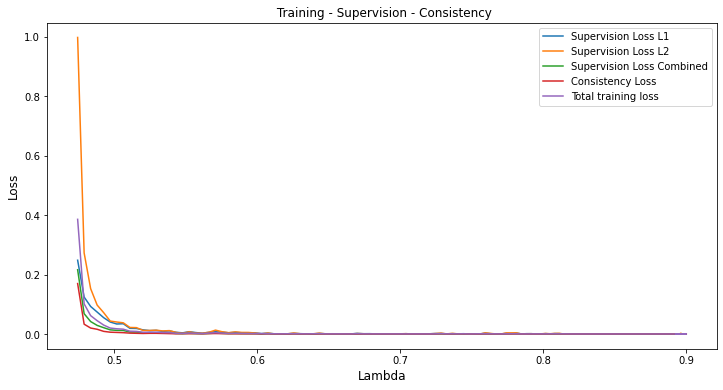

In [51]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12,6))
plt.title(" Training - Supervision - Consistency")
plt.plot(co_lambda_L,cross_entr_L1,label='Supervision Loss L1')
plt.plot(co_lambda_L,cross_entr_L2,label='Supervision Loss L2')
plt.plot(co_lambda_L,cross_entr_Loss,label='Supervision Loss Combined')
plt.plot(co_lambda_L,consistency_Loss, label='Consistency Loss')
plt.plot(co_lambda_L,CCT_train_loss, label='Total training loss')
plt.xlabel('Lambda', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend(loc='best')

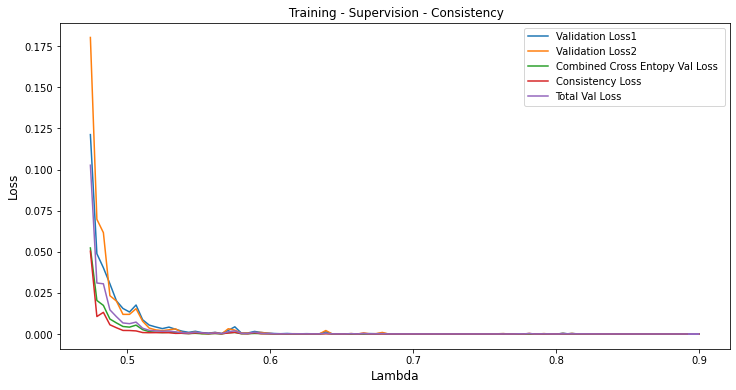

In [52]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12,6))
plt.title(" Training - Supervision - Consistency")
plt.plot(co_lambda_L,cross_entr_VL1,label='Validation Loss1 ')
plt.plot(co_lambda_L,cross_entr_VL2,label='Validation Loss2 ')
plt.plot(co_lambda_L,cross_entr_Val_Loss,label='Combined Cross Entopy Val Loss ')
plt.plot(co_lambda_L,consistency_Val_Loss, label='Consistency Loss')
plt.plot(co_lambda_L,CCT_val_loss,label='Total Val Loss ')
plt.xlabel('Lambda', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend(loc='best')

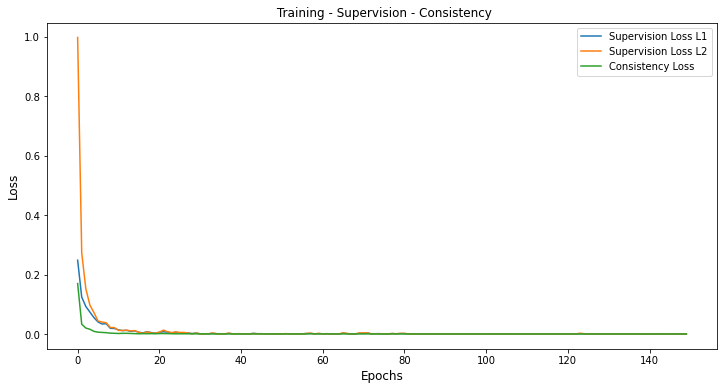

In [20]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12,6))
plt.title(" Training - Supervision - Consistency")
plt.plot(cross_entr_L1,label='Supervision Loss L1')
plt.plot(cross_entr_L2,label='Supervision Loss L2')
plt.plot(consistency_Loss, label='Consistency Loss')
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend(loc='best')

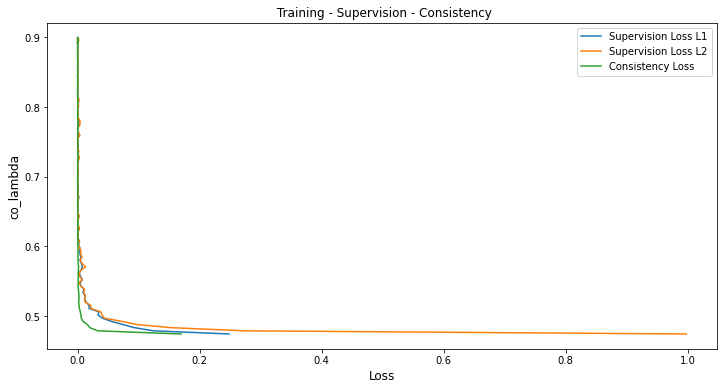

In [19]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12,6))
plt.title(" Training - Supervision - Consistency")
plt.plot(cross_entr_L1,co_lambda_L,label='Supervision Loss L1')
plt.plot(cross_entr_L2,co_lambda_L,label='Supervision Loss L2')
plt.plot(consistency_Loss,co_lambda_L, label='Consistency Loss')
plt.xlabel('Loss', fontsize=12)
plt.ylabel('co_lambda', fontsize=12)
plt.legend(loc='best')

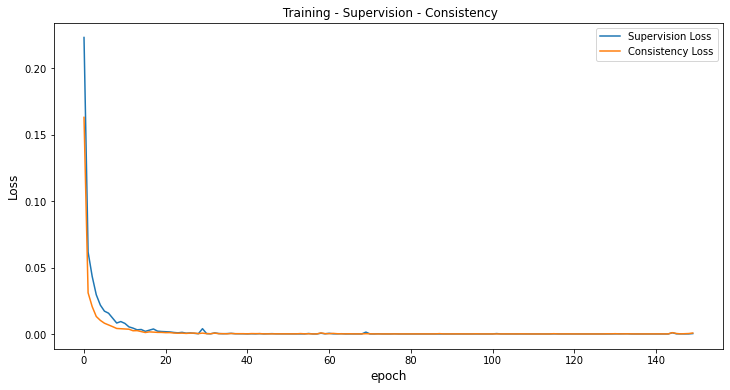

In [76]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12,6))
plt.title(" Training - Supervision - Consistency")
plt.plot(cross_entr_Loss,label='Supervision Loss ')
plt.plot(consistency_Loss, label='Consistency Loss')
plt.xlabel('epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend(loc='best')

In [44]:
net_teacher1.load_state_dict(torch.load("net_teacher1.pt", map_location=device))
net_teacher1 = net_teacher1.to(device)
net_teacher2.load_state_dict(torch.load("net_teacher2.pt", map_location=device))
net_teacher2 = net_teacher2.to(device)

In [35]:
teacher1_test_acc=[]
teacher1_test_loss=[]
teacher1_dict=dict()
n_epochs=150
for epoch in range(1, n_epochs+1):
    cum_loss=0
    total_t=0
    correct_t=0
    with torch.no_grad():
        for image_name,cell_data, context_data, target_t in test_loader:
            cell_data, context_data, target_t = cell_data.to(device), context_data.to(device), target_t.to(device)
            cell_data = cell_data.float()
            context_data = context_data.float()
            target_t = torch.squeeze(target_t)
            outputs_t = net_teacher1(cell_data, context_data)
        #outputs_t = F.softmax(outputs_t, dim=1)
            loss_t = criterion(outputs_t, target_t)
            cum_loss += loss_t.item()
            pred_t = F.softmax(outputs_t, dim=1)
            _,pred_t = torch.max(pred_t, dim=1)
            correct_t+= torch.sum(pred_t==target_t).item()
            teacher1_dict[loss_t]=(image_name,cell_data,context_data,target_t,pred_t,outputs_t)
            total_t += target_t.size(0)
        teacher1_test_acc.append(100 * correct_t/total_t)
        teacher1_test_loss.append(cum_loss/len(test_loader))
    
    print(f'teacher test loss: {np.mean(teacher1_test_loss):.4f}, teacher test acc: {100 * correct_t/total_t:.4f}\n')
        
sorted_teacher1_dict = dict(sorted(zip(teacher1_dict.keys(), teacher1_dict.values()),reverse=True))



teacher test loss: 0.7524, teacher test acc: 91.2670

teacher test loss: 0.7329, teacher test acc: 91.7195

teacher test loss: 0.7384, teacher test acc: 91.8552



KeyboardInterrupt: 

In [369]:
teacher2_test_acc=[]
teacher2_test_loss=[]
teacher2_dict=dict()
n_epochs=30
for epoch in range(1, n_epochs+1):
    cum_loss=0
    total_t=0
    correct_t=0
    with torch.no_grad():
        for image_name,cell_data, context_data, target_t in test_loader:
            cell_data, context_data, target_t = cell_data.to(device), context_data.to(device), target_t.to(device)
            cell_data = cell_data.float()
            context_data = context_data.float()
            target_t = torch.squeeze(target_t)
            outputs_t = net_teacher2(cell_data, context_data)
        #outputs_t = F.softmax(outputs_t, dim=1)
            loss_t = criterion(outputs_t, target_t)
            cum_loss+=loss_t.item()
            pred_t = F.softmax(outputs_t, dim=1)
            _,pred_t = torch.max(pred_t, dim=1)
            correct_t+=torch.sum(pred_t==target_t).item()
            teacher2_dict[loss_t]=(image_name,cell_data,context_data,target_t,pred_t,outputs_t)
            total_t+=target_t.size(0)
        teacher2_test_acc.append(100 * correct_t/total_t)
        teacher2_test_loss.append(cum_loss/len(test_loader))
    
    print(f'teacher2 test loss: {np.mean(teacher2_test_loss):.4f}, teacher2 test acc: {100 * correct_t/total_t:.4f}\n')
        
sorted_teacher2_dict = dict(sorted(zip(teacher2_dict.keys(), teacher2_dict.values()),reverse=True))

teacher2 test loss: 0.7879, teacher2 test acc: 89.4570

teacher2 test loss: 0.8082, teacher2 test acc: 88.6878

teacher2 test loss: 0.8021, teacher2 test acc: 89.7738

teacher2 test loss: 0.7936, teacher2 test acc: 89.6833

teacher2 test loss: 0.7975, teacher2 test acc: 89.2760

teacher2 test loss: 0.7996, teacher2 test acc: 89.0498

teacher2 test loss: 0.8011, teacher2 test acc: 89.3213

teacher2 test loss: 0.8014, teacher2 test acc: 89.5023

teacher2 test loss: 0.8039, teacher2 test acc: 89.4118

teacher2 test loss: 0.8053, teacher2 test acc: 89.3213

teacher2 test loss: 0.8044, teacher2 test acc: 89.3665

teacher2 test loss: 0.8055, teacher2 test acc: 89.2760

teacher2 test loss: 0.8050, teacher2 test acc: 89.1855

teacher2 test loss: 0.8040, teacher2 test acc: 89.6833

teacher2 test loss: 0.8076, teacher2 test acc: 89.0950

teacher2 test loss: 0.8056, teacher2 test acc: 89.2760

teacher2 test loss: 0.8060, teacher2 test acc: 89.0045

teacher2 test loss: 0.8052, teacher2 test acc: 8

In [43]:
criterion = nn.CrossEntropyLoss()
#optimizer=optim.Adam(list(net_teacher1.parameters()) + list(net_teacher2.parameters()))
optimizer = optim.SGD(net_student.parameters(), lr=0.001, momentum=0.9)

In [ ]:
import torch.nn.functional as F
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import math
n_epochs = 150
print_every = 10
student_valid_loss_min = np.Inf
student_val_loss = []
student_val_acc= []
student_train_loss = []
student_train_acc = []
student_avg_correct=[]
total_step = len(train_loader)
epsilon = 1e-7
student_precision_Score=[]
student_f1_Score=[]
student_recall_Score=[]
cross_entropy_StudentL=[]
consistency_Loss_Stud_Tech1=[]
consistency_Loss_Stud_Tech2=[]
cross_entropy_Student_valL=[]
consistency_Val_Loss_Stud_Tech1=[]
consistency_Val_Loss_Stud_Tech2=[]
T=2
lambda_=0.5
x=dict()
for epoch in range(1, n_epochs+1):
    running_loss = 0.0
    correct = 0
    total=0
    z=0
    cross_entropy_L=0.0
    consistency_Loss_2=0.0
    consistency_Loss_3=0.0
    print(f'Epoch {epoch}\n')
    for batch_idx, (image_name,cell_data, context_data, target_) in enumerate(train_loader):
        #print(image_name)
     
        cell_data = cell_data.float()
        context_data = context_data.float()
        cell_data, context_data, target_ = cell_data.to(device), context_data.to(device),  target_.to(device)
  
        target_ = torch.squeeze(target_)
        net_teacher1.eval()
        net_teacher2.eval()
        with torch.no_grad():
            outputs_teacher1 = net_teacher1(cell_data, context_data)*(1.0/T)
            outputs_teacher1 = F.softmax(outputs_teacher1, dim =1)
            outputs_teacher2 = net_teacher2(cell_data, context_data)*(1.0/T)
            outputs_teacher2 = F.softmax(outputs_teacher2, dim =1)
        outputs_student=   net_student(cell_data, context_data)
        cost_1 = F.cross_entropy(outputs_student, target_)
        cross_entropy_L+=cost_1.data.item()
        logp = F.log_softmax(outputs_student/T, dim=1)
        cost_2 = -torch.mean(torch.sum(outputs_teacher1 * logp, dim=1))
        consistency_Loss_2+=cost_2.data.item()
        cost_3 = -torch.mean(torch.sum(outputs_teacher2 * logp, dim=1))
        consistency_Loss_3+=cost_3.data.item()
        cost_final1 = ((1.0 - lambda_) * cost_1 + lambda_ * cost_2)
        cost_final2 = ((1.0 - lambda_) * cost_1 + lambda_ * cost_3)
        loss=cost_final1+cost_final2
        running_loss += loss.data.item()
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        pred = F.softmax(outputs_student, dim = 1)
        _,pred = torch.max(pred, dim=1)
        correct += torch.sum(pred==target_).item()
        total += target_.size(0)
        if (batch_idx) % 20 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' .format(epoch, n_epochs, batch_idx, total_step, loss.data.item()))

    student_train_acc.append(100 * correct / total)
    f1_Score=f1_score(target_, pred)
    student_f1_Score.append(f1_Score)
    recall_Score=recall_score(target_, pred)
    student_recall_Score.append(recall_Score)
    precision_Score=precision_score(target_, pred)
    student_precision_Score.append(precision_Score)
    student_train_loss.append(running_loss/total_step)
    cross_entropy_StudentL.append(cross_entropy_L/total_step)
    consistency_Loss_Stud_Tech1.append(consistency_Loss_2/total_step)
    consistency_Loss_Stud_Tech2.append(consistency_Loss_3/total_step)
    print(f'\ntrain-loss: {np.mean(student_train_loss):.4f}, train_acc: {(100 * correct/total):.4f},recall_Score: {recall_Score},precision_Score: {precision_Score}, f1_Score: {f1_Score}')
    batch_loss = 0
    total_t=0
    correct_val=0
    cross_entropy_Val=0
    consistency_Loss_Val_2=0
    consistency_Loss_Val_3=0
    with torch.no_grad():
        net_student.eval()
        
        for val_image_name,cell_data, context_data, target_t in (val_loader):
            cell_data, context_data, target_t = cell_data.to(device), context_data.to(device), target_t.to(device)
            cell_data = cell_data.float()
            context_data = context_data.float()
            target_t = torch.squeeze(target_t)
            outputs_teacher_val1 = net_teacher1(cell_data, context_data)*(1.0/T)
            outputs_teacher_val1 = F.softmax(outputs_teacher_val1, dim =1)
            outputs_teacher_val2 = net_teacher2(cell_data, context_data)*(1.0/T)
            outputs_teacher_val2 = F.softmax(outputs_teacher_val2, dim =1)
            outputs_student_val=   net_student(cell_data, context_data)
            cost_val1 = F.cross_entropy(outputs_student_val, target_t)
            cross_entropy_Val+=cost_val1.data.item()
            logp = F.log_softmax(outputs_student_val/T, dim=1)
            cost_val2 = -torch.mean(torch.sum(outputs_teacher_val1 * logp, dim=1))
            consistency_Loss_Val_2+=cost_val2.data.item()
            cost_val3 = -torch.mean(torch.sum(outputs_teacher_val2 * logp, dim=1))
            consistency_Loss_Val_3+=cost_val3.data.item()
            cost_final_val1 = ((1.0 - lambda_) * cost_val1 + lambda_ * cost_val2)
            cost_final_val2 = ((1.0 - lambda_) * cost_val1 + lambda_ * cost_val3)
            loss_val=cost_final_val1+cost_final_val2
            batch_loss+=loss_val.data.item()
            pred_val = F.softmax(outputs_student_val, dim = 1)
            _,pred_val = torch.max(pred_val, dim=1)
            correct_val += torch.sum(pred_val==target_t).item()
            total_t += target_t.size(0)
        student_val_acc.append(100 * correct_val/total_t)
        student_val_loss.append(batch_loss/len(val_loader))
        cross_entropy_Student_valL.append(cross_entropy_Val/len(val_loader))
        consistency_Val_Loss_Stud_Tech1.append(consistency_Loss_Val_2/len(val_loader))
        consistency_Val_Loss_Stud_Tech2.append(consistency_Loss_Val_3/len(val_loader))
        network_learned = batch_loss < student_valid_loss_min
        print(f'validation loss: {np.mean(student_val_loss):.4f},validation_acc: {(100 * correct_val/total_t):.4f}\n')
        
        
        if network_learned:
            student_valid_loss_min = batch_loss
            torch.save(net_student.state_dict(), 'net_student.pt')
            print('Improvement-Detected, save-model')
    net_student.train()

    

Epoch 1

Epoch [1/150], Step [0/578], Loss: 1.5006
Epoch [1/150], Step [20/578], Loss: 0.2083
Epoch [1/150], Step [40/578], Loss: 1.4857
Epoch [1/150], Step [60/578], Loss: 0.0473
Epoch [1/150], Step [80/578], Loss: 0.0681
Epoch [1/150], Step [100/578], Loss: 0.0397
Epoch [1/150], Step [120/578], Loss: 0.0272
Epoch [1/150], Step [140/578], Loss: 0.0096
Epoch [1/150], Step [160/578], Loss: 0.0224
Epoch [1/150], Step [180/578], Loss: 0.1409
Epoch [1/150], Step [200/578], Loss: 0.0843
Epoch [1/150], Step [220/578], Loss: 0.0192
Epoch [1/150], Step [240/578], Loss: 0.0019
Epoch [1/150], Step [260/578], Loss: 0.0075
Epoch [1/150], Step [280/578], Loss: 0.0009
Epoch [1/150], Step [300/578], Loss: 0.0856
Epoch [1/150], Step [320/578], Loss: 0.1883
Epoch [1/150], Step [340/578], Loss: 0.2501
Epoch [1/150], Step [360/578], Loss: 0.0067
Epoch [1/150], Step [380/578], Loss: 0.0043
Epoch [1/150], Step [400/578], Loss: 0.0085


In [372]:
net_student.load_state_dict(torch.load("net_student.pt", map_location=device))
net_student = net_student.to(device)

In [373]:
student_test_acc=[]
student_test_loss=[]
student_dict=dict()
n_epochs=30
for epoch in range(1, n_epochs+1):
    cum_loss=0
    total_t=0
    correct_t=0
    with torch.no_grad():
        for image_name,cell_data, context_data, target_t in test_loader:
            cell_data, context_data, target_t = cell_data.to(device), context_data.to(device), target_t.to(device)
            cell_data = cell_data.float()
            context_data = context_data.float()
            target_t = torch.squeeze(target_t)
            outputs_t = net_student(cell_data, context_data)
        #outputs_t = F.softmax(outputs_t, dim=1)
            loss_t = criterion(outputs_t, target_t)
            cum_loss+=loss_t.item()
            pred_t = F.softmax(outputs_t, dim=1)
            _,pred_t = torch.max(pred_t, dim=1)
            correct_t+=torch.sum(pred_t==target_t).item()
            student_dict[loss_t]=(image_name,cell_data,context_data,target_t,pred_t,outputs_t)
            total_t+=target_t.size(0)
        student_test_acc.append(100 * correct_t/total_t)
        student_test_loss.append(cum_loss/len(test_loader))
    
    
    print(f'student test loss: {np.mean(student_test_loss):.4f}, student test acc: {(100 * correct_t/total_t):.4f}\n')
        
sorted_student_dict = dict(sorted(zip(student_dict.keys(), student_dict.values()),reverse=True))

student test loss: 0.2722, student test acc: 90.9955

student test loss: 0.2880, student test acc: 91.0407

student test loss: 0.2857, student test acc: 91.2670

student test loss: 0.2828, student test acc: 91.4932

student test loss: 0.2805, student test acc: 91.5385

student test loss: 0.2846, student test acc: 91.5837

student test loss: 0.2859, student test acc: 90.8597

student test loss: 0.2880, student test acc: 90.6787

student test loss: 0.2880, student test acc: 91.1312

student test loss: 0.2884, student test acc: 90.6787

student test loss: 0.2886, student test acc: 90.5882

student test loss: 0.2886, student test acc: 91.0860

student test loss: 0.2879, student test acc: 90.9050

student test loss: 0.2879, student test acc: 90.6787

student test loss: 0.2875, student test acc: 91.4932

student test loss: 0.2877, student test acc: 90.9955

student test loss: 0.2863, student test acc: 92.0362

student test loss: 0.2859, student test acc: 90.9050

student test loss: 0.2857, s

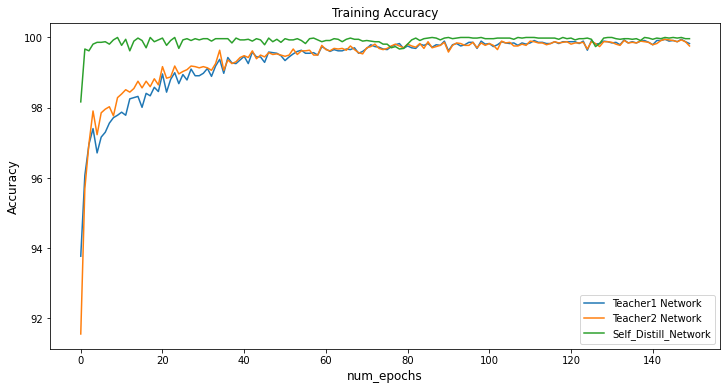

In [250]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12,6))
plt.title("Training Accuracy")
plt.plot(CCT_train_acc1, label='Teacher1 Network ')
plt.plot(CCT_train_acc2, label='Teacher2 Network')
plt.plot(student_train_acc, label='Self_Distill_Network')
plt.xlabel('num_epochs', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend(loc='best')

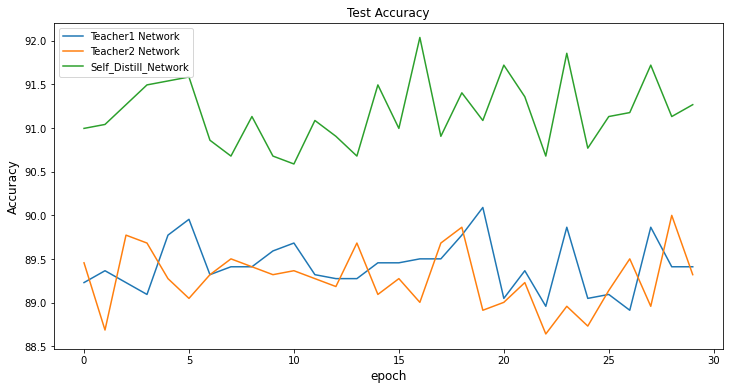

In [374]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12,6))
plt.title("Test Accuracy")
plt.plot(teacher1_test_acc, label='Teacher1 Network ')
plt.plot(teacher2_test_acc, label='Teacher2 Network')
plt.plot(student_test_acc, label='Self_Distill_Network')
plt.xlabel('epoch', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend(loc='best')

In [13]:
len(student_test_acc)

NameError: name 'student_test_acc' is not defined

In [ ]:
import numpy as np
def softmax(x):
    z=np.exp(x)
    sum_z=np.sum(np.exp(x),axis=1)
    for i in range(len(z)):
        z[i]=z[i]/sum_z[i]
    return z

In [20]:
import torch.nn.functional as F
n_epochs = 30
print_every = 10
teacher_valid_loss_min = np.Inf
teacher_val_loss = []
teacher_val_acc = []
teacher_train_loss = []
teacher_train_acc = []
total_step = len(train_loader)
epsilon = 1e-7
teacher_new=[]
teacher_precision_score=[]
teacher_recall_score=[]
teacher_TPR=[]
teacher_FPR=[]
teacher_f1_score=[]
#custom_softmax=[]
#actual_softmax=[]
x=dict()
for epoch in range(1, n_epochs+1):
    running_loss = 0.0
    correct = 0
    total=0
    tp=0
    tn=0
    fp=0
    fn=0
    z=0
 
    count_positive_match=0
    count_positive_nonmatch=0
    count_negative_match=0
    count_negative_nonmatch=0
    print(f'Epoch {epoch}\n')
    for batch_idx, (image_name,cell_data, context_data, target_) in enumerate(train_loader):
        #print(image_name)
     
        cell_data = cell_data.float()
        context_data = context_data.float()
        cell_data, context_data, target_ = cell_data.to(device), context_data.to(device),  target_.to(device)
        optimizer.zero_grad()
        target_ = torch.squeeze(target_)
        outputs = net_teacher(cell_data, context_data)
        loss = criterion(outputs, target_)
        running_loss += loss.item()
        loss.backward()
        optimizer.step()
        _,pred = torch.max(outputs, dim=1)
        x[loss]=(image_name,cell_data, context_data, target_,pred,outputs)
        y_pred=outputs
        #correct_pred=outputs
        #outputs_numpy=outputs.detach().numpy()
        #custom_softmax.append(softmax(outputs_numpy))
        #print("custom_softmax {}".format(custom_softmax))
        assert y_pred.ndim == 2 
        assert target_.ndim == 1
        y_true =F.one_hot(target_, 2).to(torch.float32)
        y_pred = F.softmax(y_pred,dim=1)
        #actual_softmax.append(y_pred)
        #print("actual_softmax {}".format(actual_softmax))
        for i in range(len(y_true[:,1].numpy())):
            if y_true[:,1].numpy()[i]==1 and pred.numpy()[i]==1:
                count_positive_match+=1
                z+=y_pred[:,1].detach().numpy()[i]
        for i in range(len(y_true[:,1].numpy())):
            if y_true[:,1].numpy()[i]==0 and pred.numpy()[i]==0:
                count_positive_nonmatch+=1
                z+=y_pred[:,0].detach().numpy()[i]
        for i in range(len(y_true[:,1].numpy())):
            if y_true[:,1].numpy()[i]==1 and pred.numpy()[i]==0:
                count_negative_match+=1
                #print("A : {}".format(outputs[i]))
                #print("B: {}".format(target_))
                #print("B : {}".format(y_pred[:,1].numpy()[i]))
                z+=y_pred[:,1].detach().numpy()[i]
        for i in range(len(y_true[:,1].numpy())):
            if y_true[:,1].numpy()[i]==0 and pred.numpy()[i]==1:
                count_negative_nonmatch+=1
                #print(outputs[:,0].detach().numpy()[i])
                #print(outputs[i])
                z+=y_pred[:,0].detach().numpy()[i]
        tp = tp+(y_true[:,1] * y_pred[:,1]).sum(dim=0).to(torch.float32)
        tn = tn+(y_true[:,0] * y_pred[:,0]).sum(dim=0).to(torch.float32)
        fp = fp+(y_true[:,0] * y_pred[:,1]).sum(dim=0).to(torch.float32)
        fn = fn+(y_true[:,1] * y_pred[:,0]).sum(dim=0).to(torch.float32)

        correct += torch.sum(pred==target_).item()
        total += target_.size(0)
        if (batch_idx) % 20 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' .format(epoch, n_epochs, batch_idx, total_step, loss.item()))
        
    precision = tp / (tp + fp + epsilon)
    teacher_precision_score.append(precision)
    recall = tp / (tp + fn + epsilon)
    teacher_recall_score.append(recall)
    teacher_TPR.append(recall)
    true_negative=tn/(tn+fp+ epsilon)
    teacher_FPR.append(1-true_negative)
    
    f1 = 2* (precision*recall) / (precision + recall + epsilon)
    teacher_f1_score.append(f1)
    teacher_new.append(z/(count_positive_match+count_positive_nonmatch+count_negative_match+count_negative_nonmatch))
    #f1_score = f1_score.clamp(min=epsilon, max=1-epsilon)
    #f1=1 - f1.mean()
    teacher_train_acc.append(100 * correct / total)
    teacher_train_loss.append(running_loss/total_step)
    print(f'\ntrain-loss: {np.mean(teacher_train_loss):.4f}, train-acc: {(100 * correct/total):.4f}, f1-score: {f1}, running_loss: {running_loss},count_positive_match: {count_positive_match}, count_positive_nonmatch: {count_positive_nonmatch}, count_negative_match: {count_negative_match}, count_negative_nonmatch: {count_negative_nonmatch}, Probability for correct class: {np.mean(teacher_new):.4f}')
    batch_loss = 0
    total_t=0
    correct_t=0
    with torch.no_grad():
        net_teacher.eval()
        for val_image_name,cell_data, context_data, target_t in (val_loader):
            cell_data, context_data, target_t = cell_data.to(device), context_data.to(device), target_t.to(device)
            cell_data = cell_data.float()
            context_data = context_data.float()
            target_t = torch.squeeze(target_t)
            outputs_t = net_teacher(cell_data, context_data)
            loss_t = criterion(outputs_t, target_t)
            batch_loss += loss_t.item()
            _,pred_t = torch.max(outputs_t, dim=1)
            correct_t += torch.sum(pred_t==target_t).item()
            
            total_t += target_t.size(0)
        teacher_val_acc.append(100 * correct_t/total_t)
        teacher_val_loss.append(batch_loss/len(val_loader))
        network_learned = batch_loss < teacher_valid_loss_min
        print(f'validation loss: {np.mean(teacher_val_loss):.4f}, validation acc: {(100 * correct_t/total_t):.4f}\n')
        
        
        if network_learned:
            teacher_valid_loss_min = batch_loss
            torch.save(net_teacher.state_dict(), 'resnet_teacher1.pt')
            print('Improvement-Detected, save-model')
    net_teacher.train()

sorted_mydict = dict(sorted(zip(x.keys(), x.values()),reverse=True))
    

Epoch 1

Epoch [1/30], Step [0/578], Loss: 0.6644
Epoch [1/30], Step [20/578], Loss: 0.6528
Epoch [1/30], Step [40/578], Loss: 0.5633
Epoch [1/30], Step [60/578], Loss: 0.6002
Epoch [1/30], Step [80/578], Loss: 0.8082
Epoch [1/30], Step [100/578], Loss: 0.5225
Epoch [1/30], Step [120/578], Loss: 0.4384
Epoch [1/30], Step [140/578], Loss: 0.5264
Epoch [1/30], Step [160/578], Loss: 0.5801
Epoch [1/30], Step [180/578], Loss: 0.5031
Epoch [1/30], Step [200/578], Loss: 0.3665
Epoch [1/30], Step [220/578], Loss: 0.4939
Epoch [1/30], Step [240/578], Loss: 0.5667
Epoch [1/30], Step [260/578], Loss: 0.4048
Epoch [1/30], Step [280/578], Loss: 0.5448
Epoch [1/30], Step [300/578], Loss: 0.3625
Epoch [1/30], Step [320/578], Loss: 0.7396
Epoch [1/30], Step [340/578], Loss: 0.3290
Epoch [1/30], Step [360/578], Loss: 0.3253
Epoch [1/30], Step [380/578], Loss: 0.3126
Epoch [1/30], Step [400/578], Loss: 0.5074
Epoch [1/30], Step [420/578], Loss: 0.2778
Epoch [1/30], Step [440/578], Loss: 0.6316
Epoch [1

In [44]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net_teacher_random.parameters(), lr=0.0001, momentum=0.9)
optim.Adam(list(model1.parameters()) + list(model2.parameters())
def accuracy(out, labels):
    _,pred = torch.max(out, dim=1)
    return torch.sum(pred==labels).item()

In [ ]:
import torch.nn.functional as F
n_epochs = 30
print_every = 10
teacher_random_valid_loss_min = np.Inf
teacher_random_val_loss = []
teacher_random_val_acc = []
teacher_random_train_loss = []
teacher_random_train_acc = []
total_step = len(train_loader)
epsilon = 1e-7
teacher_random_new=[]
teacher_random_precision_score=[]
teacher_random_recall_score=[]
teacher_random_TPR=[]
teacher_random_FPR=[]
teacher_random_f1_score=[]
#custom_softmax=[]
#actual_softmax=[]
x=dict()
for epoch in range(1, n_epochs+1):
    running_loss = 0.0
    correct = 0
    total=0
    tp=0
    tn=0
    fp=0
    fn=0
    z=0
 
    count_positive_match=0
    count_positive_nonmatch=0
    count_negative_match=0
    count_negative_nonmatch=0
    print(f'Epoch {epoch}\n')
    for batch_idx, (image_name,cell_data, context_data, target_) in enumerate(train_loader):
        #print(image_name)
     
        cell_data = cell_data.float()
        context_data = context_data.float()
        cell_data, context_data, target_ = cell_data.to(device), context_data.to(device),  target_.to(device)
        optimizer.zero_grad()
        target_ = torch.squeeze(target_)
        outputs = net_teacher_random(cell_data, context_data)
        loss = criterion(outputs, target_)
        running_loss += loss.item()
        loss.backward()
        optimizer.step()
        _,pred = torch.max(outputs, dim=1)
        x[loss]=(image_name,cell_data, context_data, target_,pred,outputs)
        y_pred=outputs
        #correct_pred=outputs
        #outputs_numpy=outputs.detach().numpy()
        #custom_softmax.append(softmax(outputs_numpy))
        #print("custom_softmax {}".format(custom_softmax))
        assert y_pred.ndim == 2 
        assert target_.ndim == 1
        y_true =F.one_hot(target_, 2).to(torch.float32)
        y_pred = F.softmax(y_pred,dim=1)
        #actual_softmax.append(y_pred)
        #print("actual_softmax {}".format(actual_softmax))
        for i in range(len(y_true[:,1].numpy())):
            if y_true[:,1].numpy()[i]==1 and pred.numpy()[i]==1:
                count_positive_match+=1
                z+=y_pred[:,1].detach().numpy()[i]
        for i in range(len(y_true[:,1].numpy())):
            if y_true[:,1].numpy()[i]==0 and pred.numpy()[i]==0:
                count_positive_nonmatch+=1
                z+=y_pred[:,0].detach().numpy()[i]
        for i in range(len(y_true[:,1].numpy())):
            if y_true[:,1].numpy()[i]==1 and pred.numpy()[i]==0:
                count_negative_match+=1
                #print("A : {}".format(outputs[i]))
                #print("B: {}".format(target_))
                #print("B : {}".format(y_pred[:,1].numpy()[i]))
                z+=y_pred[:,1].detach().numpy()[i]
        for i in range(len(y_true[:,1].numpy())):
            if y_true[:,1].numpy()[i]==0 and pred.numpy()[i]==1:
                count_negative_nonmatch+=1
                #print(outputs[:,0].detach().numpy()[i])
                #print(outputs[i])
                z+=y_pred[:,0].detach().numpy()[i]
        tp = tp+(y_true[:,1] * y_pred[:,1]).sum(dim=0).to(torch.float32)
        tn = tn+(y_true[:,0] * y_pred[:,0]).sum(dim=0).to(torch.float32)
        fp = fp+(y_true[:,0] * y_pred[:,1]).sum(dim=0).to(torch.float32)
        fn = fn+(y_true[:,1] * y_pred[:,0]).sum(dim=0).to(torch.float32)

        correct += torch.sum(pred==target_).item()
        total += target_.size(0)
        if (batch_idx) % 20 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' .format(epoch, n_epochs, batch_idx, total_step, loss.item()))
        
    precision = tp / (tp + fp + epsilon)
    teacher_random_precision_score.append(precision)
    recall = tp / (tp + fn + epsilon)
    teacher_random_recall_score.append(recall)
    teacher_random_TPR.append(recall)
    true_negative=tn/(tn+fp+ epsilon)
    teacher_random_FPR.append(1-true_negative)
    
    f1 = 2* (precision*recall) / (precision + recall + epsilon)
    teacher_random_f1_score.append(f1)
    teacher_random_new.append(z/(count_positive_match+count_positive_nonmatch+count_negative_match+count_negative_nonmatch))
    #f1_score = f1_score.clamp(min=epsilon, max=1-epsilon)
    #f1=1 - f1.mean()
    teacher_random_train_acc.append(100 * correct / total)
    teacher_random_train_loss.append(running_loss/total_step)
    print(f'\ntrain-loss: {np.mean(teacher_random_train_loss):.4f}, train-acc: {(100 * correct/total):.4f}, f1-score: {f1}, running_loss: {running_loss},count_positive_match: {count_positive_match}, count_positive_nonmatch: {count_positive_nonmatch}, count_negative_match: {count_negative_match}, count_negative_nonmatch: {count_negative_nonmatch}, Probability for correct class: {np.mean(teacher_random_new):.4f}')
    batch_loss = 0
    total_t=0
    correct_t=0
    with torch.no_grad():
        net_teacher_random.eval()
        for val_image_name,cell_data, context_data, target_t in (val_loader):
            cell_data, context_data, target_t = cell_data.to(device), context_data.to(device), target_t.to(device)
            cell_data = cell_data.float()
            context_data = context_data.float()
            target_t = torch.squeeze(target_t)
            outputs_t = net_teacher_random(cell_data, context_data)
            loss_t = criterion(outputs_t, target_t)
            batch_loss += loss_t.item()
            _,pred_t = torch.max(outputs_t, dim=1)
            correct_t += torch.sum(pred_t==target_t).item()
            
            total_t += target_t.size(0)
        teacher_random_val_acc.append(100 * correct_t/total_t)
        teacher_random_val_loss.append(batch_loss/len(val_loader))
        network_learned = batch_loss < teacher_random_valid_loss_min
        print(f'validation loss: {np.mean(teacher_random_val_loss):.4f}, validation acc: {(100 * correct_t/total_t):.4f}\n')
        
        
        if network_learned:
            teacher_random_valid_loss_min = batch_loss
            torch.save(net_teacher_random.state_dict(), 'resnet_teacher_random.pt')
            print('Improvement-Detected, save-model')
    net_teacher_random.train()

sorted_mydict = dict(sorted(zip(x.keys(), x.values()),reverse=True))
    

Epoch 1

Epoch [1/30], Step [0/578], Loss: 2.4890
Epoch [1/30], Step [20/578], Loss: 0.2605
Epoch [1/30], Step [40/578], Loss: 0.0000
Epoch [1/30], Step [60/578], Loss: 0.7490
Epoch [1/30], Step [80/578], Loss: 0.0282
Epoch [1/30], Step [100/578], Loss: 0.1236
Epoch [1/30], Step [120/578], Loss: 0.0102
Epoch [1/30], Step [140/578], Loss: 1.2348
Epoch [1/30], Step [160/578], Loss: 0.0010
Epoch [1/30], Step [180/578], Loss: 1.5480
Epoch [1/30], Step [200/578], Loss: 0.6201
Epoch [1/30], Step [220/578], Loss: 0.0011
Epoch [1/30], Step [240/578], Loss: 0.0001
Epoch [1/30], Step [260/578], Loss: 0.0001
Epoch [1/30], Step [280/578], Loss: 0.0007
Epoch [1/30], Step [300/578], Loss: 0.1750
Epoch [1/30], Step [320/578], Loss: 0.1599
Epoch [1/30], Step [340/578], Loss: 0.6538
Epoch [1/30], Step [360/578], Loss: 1.5330
Epoch [1/30], Step [380/578], Loss: 0.0003
Epoch [1/30], Step [400/578], Loss: 1.5557
Epoch [1/30], Step [420/578], Loss: 0.0119
Epoch [1/30], Step [440/578], Loss: 0.0000
Epoch [1

In [ ]:
import torch.nn.functional as F
import os 
import shutil
n_epochs = 30
print_every = 10
teacher_hard_valid_loss_min = np.Inf
teacher_hard_val_loss = []
teacher_hard_val_acc = []
teacher_hard_train_loss = []
teacher_hard_train_acc = []
total_step = len(train_loader)
epsilon = 1e-7
teacher_hard_new=[]
teacher_hard_precision_score=[]
teacher_hard_recall_score=[]
teacher_hard_TPR=[]
teacher_hard_FPR=[]
teacher_hard_f1_score=[]
custom_softmax=[]
actual_softmax=[]

for epoch in range(1, n_epochs+1):
    running_loss = 0.0
    correct = 0
    total=0
    tp=0
    tn=0
    fp=0
    fn=0
    z=0
    count_positive_match=0
    count_positive_nonmatch=0
    count_negative_match=0
    count_negative_nonmatch=0
    print(f'Epoch {epoch}\n')
    x=dict()
    for batch_idx, (cell_data, context_data, target_) in enumerate(train_loader):
        #print(cell_data.shape,context_data.shape,target_.shape)
     
        cell_data = cell_data.float()
        context_data = context_data.float()
        cell_data, context_data, target_ = cell_data.to(device), context_data.to(device),  target_.to(device)
        optimizer.zero_grad()
        target_ = torch.squeeze(target_)
        outputs = net_teacher(cell_data, context_data)
        loss = criterion(outputs, target_)
        x[loss]=(cell_data, context_data, target_)
        running_loss += loss.item()
        loss.backward()
        optimizer.step()
        _,pred = torch.max(outputs, dim=1)
        y_pred=outputs
        #correct_pred=outputs
        outputs_numpy=outputs.detach().numpy()
        custom_softmax.append(softmax(outputs_numpy))
        #print("custom_softmax {}".format(custom_softmax))
        assert y_pred.ndim == 2 
        assert target_.ndim == 1
        y_true =F.one_hot(target_, 2).to(torch.float32)
        y_pred = F.softmax(y_pred,dim=1)
        actual_softmax.append(y_pred)
        #print("actual_softmax {}".format(actual_softmax))
        for i in range(len(y_true[:,1].numpy())):
            if y_true[:,1].numpy()[i]==1 and pred.numpy()[i]==1:
                count_positive_match+=1
                z+=y_pred[:,1].detach().numpy()[i]
        for i in range(len(y_true[:,1].numpy())):
            if y_true[:,1].numpy()[i]==0 and pred.numpy()[i]==0:
                count_positive_nonmatch+=1
                z+=y_pred[:,0].detach().numpy()[i]
        for i in range(len(y_true[:,1].numpy())):
            if y_true[:,1].numpy()[i]==1 and pred.numpy()[i]==0:
                count_negative_match+=1
                #print("A : {}".format(outputs[i]))
                #print("B: {}".format(target_))
                #print("B : {}".format(y_pred[:,1].numpy()[i]))
                z+=y_pred[:,1].detach().numpy()[i]
        for i in range(len(y_true[:,1].numpy())):
            if y_true[:,1].numpy()[i]==0 and pred.numpy()[i]==1:
                count_negative_nonmatch+=1
                #print(outputs[:,0].detach().numpy()[i])
                #print(outputs[i])
                z+=y_pred[:,0].detach().numpy()[i]
        tp = tp+(y_true[:,1] * y_pred[:,1]).sum(dim=0).to(torch.float32)
        tn = tn+(y_true[:,0] * y_pred[:,0]).sum(dim=0).to(torch.float32)
        fp = fp+(y_true[:,0] * y_pred[:,1]).sum(dim=0).to(torch.float32)
        fn = fn+(y_true[:,1] * y_pred[:,0]).sum(dim=0).to(torch.float32)

        correct += torch.sum(pred==target_).item()
        total += target_.size(0)
        if (batch_idx) % 20 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' .format(epoch, n_epochs, batch_idx, total_step, loss.item()))
        
    precision = tp / (tp + fp + epsilon)
    teacher_hard_precision_score.append(precision)
    recall = tp / (tp + fn + epsilon)
    teacher_hard_recall_score.append(recall)
    teacher_hard_TPR.append(recall)
    true_negative=tn/(tn+fp+ epsilon)
    teacher_hard_FPR.append(1-true_negative)
    
    f1 = 2* (precision*recall) / (precision + recall + epsilon)
    teacher_hard_f1_score.append(f1)
    teacher_hard_new.append(z/(count_positive_match+count_positive_nonmatch+count_negative_match+count_negative_nonmatch))
    #f1_score = f1_score.clamp(min=epsilon, max=1-epsilon)
    #f1=1 - f1.mean()
    teacher_hard_train_acc.append(100 * correct / total)
    teacher_hard_train_loss.append(running_loss/total_step)
    print(f'\ntrain-loss: {np.mean(teacher_hard_train_loss):.4f}, train-acc: {(100 * correct/total):.4f}, f1-score: {f1}, running_loss: {running_loss},count_positive_match: {count_positive_match}, count_positive_nonmatch: {count_positive_nonmatch}, count_negative_match: {count_negative_match}, count_negative_nonmatch: {count_negative_nonmatch}, Probability for correct class: {np.mean(teacher_hard_new):.4f}')
    batch_loss = 0
    total_t=0
    correct_t=0
    with torch.no_grad():
        net_teacher.eval()
        for cell_data, context_data, target_t in (val_loader):
            cell_data, context_data, target_t = cell_data.to(device), context_data.to(device), target_t.to(device)
            cell_data = cell_data.float()
            context_data = context_data.float()
            target_t = torch.squeeze(target_t)
            outputs_t = net_teacher(cell_data, context_data)
            loss_t = criterion(outputs_t, target_t)
            batch_loss += loss_t.item()
            _,pred_t = torch.max(outputs_t, dim=1)
            correct_t += torch.sum(pred_t==target_t).item()
            
            total_t += target_t.size(0)
        teacher_hard_val_acc.append(100 * correct_t/total_t)
        teacher_hard_val_loss.append(batch_loss/len(val_loader))
        network_learned = batch_loss < teacher_hard_valid_loss_min
        print(f'validation loss: {np.mean(teacher_val_loss):.4f}, validation acc: {(100 * correct_t/total_t):.4f}\n')
        
        
        if network_learned:
            teacher_hard_valid_loss_min = batch_loss
            torch.save(net_teacher.state_dict(), 'resnet_hard_teacher.pt')
            print('Improvement-Detected, save-model')
    net_teacher.train()
    print('loss is {}'.format(x))
    sorted_mydict = dict(sorted(zip(x.keys(), x.values()),reverse=True))
    print('sorted loss{}'.format(sorted_mydict))
    dir_path="Images_for_retraining/"
 #   if os.path.isdir(dir_path):
  #      print(True)
   #     shutil.rmtree(dir_path)
    
    os.makedirs("./Images_for_retraining/class0/")
    os.makedirs("./Images_for_retraining/class1/")
    for i,index in enumerate(sorted_mydict.keys()):
        if i<400:
            for j in range(10):
                images,context,labels=sorted_mydict[index]
                images,context,labels=images.numpy(),context.numpy(),labels.numpy()
                if labels[j]==0:
                    cv2.imwrite('Images_for_retraining/class0/'+'retrain_epoch'+str(epoch)+str(i)+str(j)+'.jpg',np.transpose(images[j] , (1, 2, 0)))
                    cv2.imwrite('Images_for_retraining/class0/'+'retrain_epoch'+str(epoch)+str(j)+'_context'+'.jpg',np.transpose(context[j] , (1, 2, 0)))
                else:
                    cv2.imwrite('Images_for_retraining/class1/'+'retrain_epoch'+str(epoch)+str(i)+str(j)+'.jpg',np.transpose(images[j] , (1, 2, 0)))
                    cv2.imwrite('Images_for_retraining/class1/'+'retrain_epoch'+str(epoch)+str(i)+str(j)+'_context'+'.jpg',np.transpose(context[j] , (1, 2, 0)))








In [37]:
net_teacher.load_state_dict(torch.load("resnet_teacher1.pt", map_location=device))
net_teacher = net_teacher.to(device)

In [43]:
net_teacher_random.load_state_dict(torch.load("resnet_teacher_random.pt", map_location=device))
net_teacher_random = net_teacher_random.to(device)

In [40]:
teacher_test_acc=[]
teacher_test_loss=[]
teacher_dict=dict()
cum_loss=0
correct_t=0
total_t=0
with torch.no_grad():
    for image_name,cell_data, context_data, target_t in (test_loader):
        cell_data, context_data, target_t = cell_data.to(device), context_data.to(device), target_t.to(device)
        cell_data = cell_data.float()
        context_data = context_data.float()
        target_t = torch.squeeze(target_t)
        outputs_t = net_teacher(cell_data, context_data)
        loss_t = criterion(outputs_t, target_t)
        cum_loss += loss_t.item()
        _,pred_t = torch.max(outputs_t, dim=1)
        correct_t += torch.sum(pred_t==target_t).item()
        teacher_dict[loss_t]=(image_name,cell_data,context_data,target_t,pred_t,outputs_t)
        total_t += target_t.size(0)
    teacher_test_acc.append(100 * correct_t/total_t)
    teacher_test_loss.append(cum_loss/len(test_loader))
    
    print(f'teacher test loss: {np.mean(teacher_test_loss):.4f}, teacher test acc: {(100 * correct_t/total_t):.4f}\n')
        
sorted_teacher_dict = dict(sorted(zip(teacher_dict.keys(), teacher_dict.values()),reverse=True))


teacher test loss: 0.4067, teacher test acc: 81.8552



In [40]:
net_teacher_random.load_state_dict(torch.load("resnet_teacher_random.pt", map_location=device))
net_teacher_random = net_teacher_random.to(device)

In [45]:
teacher_random_test_acc=[]
teacher_random_test_loss=[]
cum_loss=0
correct_t=0
total_t=0
teacher_random_dict=dict()
with torch.no_grad():
    for image_name,cell_data, context_data, target_t in (test_loader):
        cell_data, context_data, target_t = cell_data.to(device), context_data.to(device), target_t.to(device)
        cell_data = cell_data.float()
        context_data = context_data.float()
        target_t = torch.squeeze(target_t)
        outputs_t = net_teacher_random(cell_data, context_data)
        loss_t = criterion(outputs_t, target_t)
        cum_loss += loss_t.item()
        _,pred_t = torch.max(outputs_t, dim=1)
        correct_t += torch.sum(pred_t==target_t).item()
        teacher_random_dict[loss_t]=(image_name,cell_data,context_data,target_t,pred_t,outputs_t)
        total_t += target_t.size(0)
    teacher_random_test_acc.append(100 * correct_t/total_t)
    teacher_random_test_loss.append(cum_loss/len(test_loader))
    
    print(f'teacher_random test loss: {np.mean(teacher_random_test_loss):.4f}, teacher_random test acc: {(100 * correct_t/total_t):.4f}\n')
        
sorted_teacher_random_dict = dict(sorted(zip(teacher_random_dict.keys(), teacher_random_dict.values()),reverse=True))

teacher_random test loss: 1.1746, teacher_random test acc: 89.1855



In [28]:
teacher_image_name_list=[]
teacher_actual_target=[]
teacher_predicted_target=[]
teacher_soft_targets0=[]
teacher_soft_targets1=[]
for i in range(len(sorted_teacher_dict.keys())):
    image_name,cell_data, context_data, target_,pred,outputs=sorted_teacher_dict[list(sorted_teacher_dict.keys())[i]]
    teacher_image_name_list.extend(list(image_name))
    teacher_actual_target.extend(list(target_.numpy()))
    teacher_predicted_target.extend(list(pred.numpy()))
    teacher_soft_targets0.extend(list(outputs.detach().numpy()[:,0]))
    teacher_soft_targets1.extend(list(outputs.detach().numpy()[:,1]))

In [30]:
import pandas as pd
data_teacher = {'Teach_Image': teacher_image_name_list, 'Actual': teacher_actual_target,'Teach_Pedicted':teacher_predicted_target,'Teach_Soft_tgt0':teacher_soft_targets0,'Teach_Soft_tgt1':teacher_soft_targets1}
teacher_data_frame = pd.DataFrame(data_teacher)

In [72]:
x = torch.arange(1., 6.)
torch.topk(x, 1)

torch.return_types.topk(
values=tensor([5.]),
indices=tensor([4]))

In [33]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net_self_distill.parameters(), lr=0.0001, momentum=0.9)

def accuracy(out, labels):
    _,pred = torch.max(out, dim=1)
    return torch.sum(pred==labels).item()

In [45]:
import torch.nn.functional as F
n_epochs = 30
print_every = 10
T=1
alpha=0.05
self_distill_valid_loss_min = np.Inf
self_distill_val_loss = []
self_distill_val_acc = []
self_distill_train_loss = []
self_distill_train_acc = []
total_step = len(train_loader)
epsilon = 1e-7
self_distill_new=[]
self_distill_precision_score=[]
self_distill_recall_score=[]
self_distill_TPR=[]
self_distill_FPR=[]
self_distill_f1_score=[]
self_distill_custom_softmax=[]
self_distill_actual_softmax=[]
self_distill_high_loss=dict()
for epoch in range(1, n_epochs+1):
    running_loss = 0.0
    correct = 0
    total=0
    tp=0
    tn=0
    fp=0
    fn=0
    z=0
    count_positive_match=0
    count_positive_nonmatch=0
    count_negative_match=0
    count_negative_nonmatch=0
    print(f'Epoch {epoch}\n')
    for batch_idx, (image_name,cell_data, context_data, target_) in enumerate(train_loader):
        #print("target_ {}".format(target_))
     
        cell_data = cell_data.float()
        context_data = context_data.float()
        cell_data, context_data, target_ = cell_data.to(device), context_data.to(device),  target_.to(device)
        optimizer.zero_grad()
        target_ = torch.squeeze(target_)
        self_distill_outputs = net_self_distill(cell_data, context_data)
        #print("student_output {}".format(student_outputs))
        with torch.no_grad():
            teacher_outputs = net_teacher(cell_data, context_data)
            #print("teacher_outputs {}".format(teacher_outputs))
        loss = F.kl_div(F.log_softmax(self_distill_outputs / T, dim=1), F.softmax(teacher_outputs / T, dim=1), reduction='batchmean') * (T ** 2) * (alpha) + F.cross_entropy(self_distill_outputs, target_) * (1-alpha)
        
        #loss = criterion(student_outputs, target_)
        #loss=F.cross_entropy(student_outputs, target_)
        running_loss += loss.item()
        loss.backward()
        optimizer.step()
        _,self_distill_pred = torch.max(self_distill_outputs, dim=1)
        self_distill_high_loss[loss]=(image_name,cell_data, context_data, target_,self_distill_pred,self_distill_outputs)
        y_pred=self_distill_outputs
        #correct_pred=student_outputs
        #outputs_numpy=self_distill_outputs.detach().numpy()
        #custom_softmax.append(softmax(outputs_numpy))
        assert y_pred.ndim == 2 
        assert target_.ndim == 1
        y_true =F.one_hot(target_, 2).to(torch.float32)
        y_pred = F.softmax(y_pred,dim=1)
        #actual_softmax.append(y_pred)
        for i in range(len(y_true[:,1].numpy())):
            if y_true[:,1].numpy()[i]==1 and self_distill_pred.numpy()[i]==1:
                count_positive_match+=1
                z+=y_pred[:,1].detach().numpy()[i]
        for i in range(len(y_true[:,1].numpy())):
            if y_true[:,1].numpy()[i]==0 and self_distill_pred.numpy()[i]==0:
                count_positive_nonmatch+=1
                z+=y_pred[:,0].detach().numpy()[i]
        for i in range(len(y_true[:,1].numpy())):
            if y_true[:,1].numpy()[i]==1 and self_distill_pred.numpy()[i]==0:
                count_negative_match+=1
                #print("A : {}".format(outputs[i]))
                #print("B: {}".format(target_))
                #print("B : {}".format(y_pred[:,1].numpy()[i]))
                z+=y_pred[:,1].detach().numpy()[i]
        for i in range(len(y_true[:,1].numpy())):
            if y_true[:,1].numpy()[i]==0 and self_distill_pred.numpy()[i]==1:
                count_negative_nonmatch+=1
                #print(outputs[:,0].detach().numpy()[i])
                #print(outputs[i])
                z+=y_pred[:,0].detach().numpy()[i]
        tp = tp+(y_true[:,1] * y_pred[:,1]).sum(dim=0).to(torch.float32)
        tn = tn+(y_true[:,0] * y_pred[:,0]).sum(dim=0).to(torch.float32)
        fp = fp+(y_true[:,0] * y_pred[:,1]).sum(dim=0).to(torch.float32)
        fn = fn+(y_true[:,1] * y_pred[:,0]).sum(dim=0).to(torch.float32)

        correct += torch.sum(self_distill_pred==target_).item()
        total += target_.size(0)
        if (batch_idx) % 20 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' .format(epoch, n_epochs, batch_idx, total_step, loss.item()))
        
    precision = tp / (tp + fp + epsilon)
    self_distill_precision_score.append(precision)
    recall = tp / (tp + fn + epsilon)
    self_distill_recall_score.append(recall)
    self_distill_TPR.append(recall)
    true_negative=tn/(tn+fp+ epsilon)
    self_distill_FPR.append(1-true_negative)
    
    f1 = 2* (precision*recall) / (precision + recall + epsilon)
    self_distill_f1_score.append(f1)
    self_distill_new.append(z/(count_positive_match+count_positive_nonmatch+count_negative_match+count_negative_nonmatch))
    #f1_score = f1_score.clamp(min=epsilon, max=1-epsilon)
    #f1=1 - f1.mean()
    self_distill_train_acc.append(100 * correct / total)
    self_distill_train_loss.append(running_loss/total_step)
    print(f'\ntrain-loss: {np.mean(self_distill_train_loss):.4f}, train-acc: {(100 * correct/total):.4f}, f1-score: {f1}, running_loss: {running_loss},count_positive_match: {count_positive_match}, count_positive_nonmatch: {count_positive_nonmatch}, count_negative_match: {count_negative_match}, count_negative_nonmatch: {count_negative_nonmatch}, Probability for correct class: {np.mean(self_distill_new):.4f}')
    batch_loss = 0
    total_t=0
    correct_t=0
   
        
    with torch.no_grad():
        net_self_distill.eval()
        for val_image_name,cell_data, context_data, target_t in (val_loader):
            cell_data, context_data, target_t = cell_data.to(device), context_data.to(device), target_t.to(device)
            cell_data = cell_data.float()
            context_data = context_data.float()
            target_t = torch.squeeze(target_t)
            outputs_t = net_self_distill(cell_data, context_data)
            loss_t = criterion(outputs_t, target_t)
            batch_loss += loss_t.item()
            _,pred_t = torch.max(outputs_t, dim=1)
            correct_t += torch.sum(pred_t==target_t).item()
            
            total_t += target_t.size(0)
        self_distill_val_acc.append(100 * correct_t/total_t)
        self_distill_val_loss.append(batch_loss/len(val_loader))
        network_learned = batch_loss < self_distill_valid_loss_min
        print(f'validation loss: {np.mean(self_distill_val_loss):.4f}, validation acc: {(100 * correct_t/total_t):.4f}\n')
        
        
        if network_learned:
            self_distill_valid_loss_min = batch_loss
            torch.save(net_self_distill.state_dict(), 'resnet_self_distill1.pt')
            print('Improvement-Detected, save-model')
    net_self_distill.train()



sorted_mydict_self_distill = dict(sorted(zip(self_distill_high_loss.keys(), self_distill_high_loss.values()),reverse=True))

Epoch 1

Epoch [1/30], Step [0/578], Loss: 0.5634
Epoch [1/30], Step [20/578], Loss: 0.4434
Epoch [1/30], Step [40/578], Loss: 0.4921
Epoch [1/30], Step [60/578], Loss: 0.3027
Epoch [1/30], Step [80/578], Loss: 0.2954
Epoch [1/30], Step [100/578], Loss: 0.3863
Epoch [1/30], Step [120/578], Loss: 0.2188
Epoch [1/30], Step [140/578], Loss: 0.2043
Epoch [1/30], Step [160/578], Loss: 0.2122
Epoch [1/30], Step [180/578], Loss: 0.3339
Epoch [1/30], Step [200/578], Loss: 0.2526
Epoch [1/30], Step [220/578], Loss: 0.1398
Epoch [1/30], Step [240/578], Loss: 0.1424
Epoch [1/30], Step [260/578], Loss: 0.1297
Epoch [1/30], Step [280/578], Loss: 0.2584
Epoch [1/30], Step [300/578], Loss: 0.2644
Epoch [1/30], Step [320/578], Loss: 0.1770
Epoch [1/30], Step [340/578], Loss: 0.1583
Epoch [1/30], Step [360/578], Loss: 0.1810
Epoch [1/30], Step [380/578], Loss: 0.1349
Epoch [1/30], Step [400/578], Loss: 0.1738
Epoch [1/30], Step [420/578], Loss: 0.1311
Epoch [1/30], Step [440/578], Loss: 0.1011
Epoch [1

In [47]:
net_self_distill.load_state_dict(torch.load("resnet_self_distill.pt", map_location=device))
net_self_distill = net_self_distill.to(device)

In [48]:
self_distill_test_acc=[]
self_distill_test_loss=[]
self_distill_dict=dict()
with torch.no_grad():
    for image_name,cell_data, context_data, target_t in (test_loader):
        cell_data, context_data, target_t = cell_data.to(device), context_data.to(device), target_t.to(device)
        cell_data = cell_data.float()
        context_data = context_data.float()
        target_t = torch.squeeze(target_t)
        outputs_t = net_self_distill(cell_data, context_data)
        loss_t = criterion(outputs_t, target_t)
        batch_loss += loss_t.item()
        _,pred_t = torch.max(outputs_t, dim=1)
        correct_t += torch.sum(pred_t==target_t).item()
        self_distill_dict[loss_t]=(image_name,cell_data,context_data,target_t,pred_t,outputs_t)
        total_t += target_t.size(0)
    self_distill_test_acc.append(100 * correct_t/total_t)
    self_distill_test_loss.append(batch_loss/len(test_loader))
    
    print(f'self_distill test loss: {np.mean(self_distill_test_loss):.4f}, self_distill test acc: {(100 * correct_t/total_t):.4f}\n')
        
sorted_self_distill_dict = dict(sorted(zip(self_distill_dict.keys(), self_distill_dict.values()),reverse=True))

self_distill test loss: 0.5146, self_distill test acc: 96.7835



In [54]:
distilled_teacher_image_name_list=[]
distilled_teacher_actual_target=[]
distilled_teacher_predicted_target=[]
distilled_teacher_soft_targets0=[]
distilled_teacher_soft_targets1=[]
for i in range(len(sorted_self_distill_dict.keys())):
    image_name,cell_data, context_data, target_,pred,outputs=sorted_self_distill_dict[list(sorted_self_distill_dict.keys())[i]]
    distilled_teacher_image_name_list.extend(list(image_name))
    distilled_teacher_actual_target.extend(list(target_.numpy()))
    distilled_teacher_predicted_target.extend(list(pred.numpy()))
    distilled_teacher_soft_targets0.extend(list(outputs.detach().numpy()[:,0]))
    distilled_teacher_soft_targets1.extend(list(outputs.detach().numpy()[:,1]))

In [55]:
data_self_distill = {'Self_Dist_Image': distilled_teacher_image_name_list, 'Actual': distilled_teacher_actual_target,'Self_Dist_Pedicted':distilled_teacher_predicted_target,'Self_Dist_Soft_tgt0':distilled_teacher_soft_targets0,'Self_Dist_Soft_tgt1':distilled_teacher_soft_targets1}
self_distill_data_frame = pd.DataFrame(data_self_distill)

In [62]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net_self_distill_10.parameters(), lr=0.0001, momentum=0.9)

def accuracy(out, labels):
    _,pred = torch.max(out, dim=1)
    return torch.sum(pred==labels).item()

In [63]:
import torch.nn.functional as F
n_epochs = 30
print_every = 10
T=10

alpha=0.05
self_distill_10_valid_loss_min = np.Inf
self_distill_10_val_loss = []
self_distill_10_val_acc = []
self_distill_10_train_loss = []
self_distill_10_train_acc = []
total_step = len(train_loader)
epsilon = 1e-7
self_distill_10_new=[]
self_distill_10_precision_score=[]
self_distill_10_recall_score=[]
self_distill_10_TPR=[]
self_distill_10_FPR=[]
self_distill_10_f1_score=[]
self_distill_10_custom_softmax=[]
self_distill_10_actual_softmax=[]
self_distill_10_high_loss=dict()
for epoch in range(1, n_epochs+1):
    running_loss = 0.0
    correct = 0
    total=0
    tp=0
    tn=0
    fp=0
    fn=0
    z=0
    count_positive_match=0
    count_positive_nonmatch=0
    count_negative_match=0
    count_negative_nonmatch=0
    print(f'Epoch {epoch}\n')
    for batch_idx, (image_name,cell_data, context_data, target_) in enumerate(train_loader):
        #print("target_ {}".format(target_))
     
        cell_data = cell_data.float()
        context_data = context_data.float()
        cell_data, context_data, target_ = cell_data.to(device), context_data.to(device),  target_.to(device)
        optimizer.zero_grad()
        target_ = torch.squeeze(target_)
        self_distill_10_outputs = net_self_distill_10(cell_data, context_data)
        #print("student_output {}".format(student_outputs))
        with torch.no_grad():
            teacher_outputs = net_teacher(cell_data, context_data)
            #print("teacher_outputs {}".format(teacher_outputs))
        loss = F.kl_div(F.log_softmax(self_distill_10_outputs / T, dim=1), F.softmax(teacher_outputs / T, dim=1), reduction='batchmean') * (T ** 2) * (alpha) + F.cross_entropy(self_distill_10_outputs, target_) * (1-alpha)
        
        #loss = criterion(student_outputs, target_)
        #loss=F.cross_entropy(student_outputs, target_)
        running_loss += loss.item()
        loss.backward()
        optimizer.step()
        _,self_distill_10_pred = torch.max(self_distill_10_outputs, dim=1)
        self_distill_10_high_loss[loss]=(image_name,cell_data, context_data, target_,self_distill_10_pred,self_distill_10_outputs)
        y_pred=self_distill_10_outputs
        #correct_pred=student_outputs
        #outputs_numpy=self_distill_10_outputs.detach().numpy()
        #custom_softmax.append(softmax(outputs_numpy))
        assert y_pred.ndim == 2 
        assert target_.ndim == 1
        y_true =F.one_hot(target_, 2).to(torch.float32)
        y_pred = F.softmax(y_pred,dim=1)
       # actual_softmax.append(y_pred)
        for i in range(len(y_true[:,1].numpy())):
            if y_true[:,1].numpy()[i]==1 and self_distill_10_pred.numpy()[i]==1:
                count_positive_match+=1
                z+=y_pred[:,1].detach().numpy()[i]
        for i in range(len(y_true[:,1].numpy())):
            if y_true[:,1].numpy()[i]==0 and self_distill_10_pred.numpy()[i]==0:
                count_positive_nonmatch+=1
                z+=y_pred[:,0].detach().numpy()[i]
        for i in range(len(y_true[:,1].numpy())):
            if y_true[:,1].numpy()[i]==1 and self_distill_10_pred.numpy()[i]==0:
                count_negative_match+=1
                #print("A : {}".format(outputs[i]))
                #print("B: {}".format(target_))
                #print("B : {}".format(y_pred[:,1].numpy()[i]))
                z+=y_pred[:,1].detach().numpy()[i]
        for i in range(len(y_true[:,1].numpy())):
            if y_true[:,1].numpy()[i]==0 and self_distill_10_pred.numpy()[i]==1:
                count_negative_nonmatch+=1
                #print(outputs[:,0].detach().numpy()[i])
                #print(outputs[i])
                z+=y_pred[:,0].detach().numpy()[i]
        tp = tp+(y_true[:,1] * y_pred[:,1]).sum(dim=0).to(torch.float32)
        tn = tn+(y_true[:,0] * y_pred[:,0]).sum(dim=0).to(torch.float32)
        fp = fp+(y_true[:,0] * y_pred[:,1]).sum(dim=0).to(torch.float32)
        fn = fn+(y_true[:,1] * y_pred[:,0]).sum(dim=0).to(torch.float32)

        correct += torch.sum(self_distill_10_pred==target_).item()
        total += target_.size(0)
        if (batch_idx) % 20 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' .format(epoch, n_epochs, batch_idx, total_step, loss.item()))
        
    precision = tp / (tp + fp + epsilon)
    self_distill_10_precision_score.append(precision)
    recall = tp / (tp + fn + epsilon)
    self_distill_10_recall_score.append(recall)
    self_distill_10_TPR.append(recall)
    true_negative=tn/(tn+fp+ epsilon)
    self_distill_10_FPR.append(1-true_negative)
    
    f1 = 2* (precision*recall) / (precision + recall + epsilon)
    self_distill_10_f1_score.append(f1)
    self_distill_10_new.append(z/(count_positive_match+count_positive_nonmatch+count_negative_match+count_negative_nonmatch))
    #f1_score = f1_score.clamp(min=epsilon, max=1-epsilon)
    #f1=1 - f1.mean()
    self_distill_10_train_acc.append(100 * correct / total)
    self_distill_10_train_loss.append(running_loss/total_step)
    print(f'\ntrain-loss: {np.mean(self_distill_10_train_loss):.4f}, train-acc: {(100 * correct/total):.4f}, f1-score: {f1}, running_loss: {running_loss},count_positive_match: {count_positive_match}, count_positive_nonmatch: {count_positive_nonmatch}, count_negative_match: {count_negative_match}, count_negative_nonmatch: {count_negative_nonmatch}, Probability for correct class: {np.mean(self_distill_10_new):.4f}')
    batch_loss = 0
    total_t=0
    correct_t=0
   
        
    with torch.no_grad():
        net_self_distill_10.eval()
        for val_image_name,cell_data, context_data, target_t in (val_loader):
            cell_data, context_data, target_t = cell_data.to(device), context_data.to(device), target_t.to(device)
            cell_data = cell_data.float()
            context_data = context_data.float()
            target_t = torch.squeeze(target_t)
            outputs_t = net_self_distill_10(cell_data, context_data)
            loss_t = criterion(outputs_t, target_t)
            batch_loss += loss_t.item()
            _,pred_t = torch.max(outputs_t, dim=1)
            correct_t += torch.sum(pred_t==target_t).item()
            
            total_t += target_t.size(0)
        self_distill_10_val_acc.append(100 * correct_t/total_t)
        self_distill_10_val_loss.append(batch_loss/len(val_loader))
        network_learned = batch_loss < self_distill_10_valid_loss_min
        print(f'validation loss: {np.mean(self_distill_10_val_loss):.4f}, validation acc: {(100 * correct_t/total_t):.4f}\n')
        
        
        if network_learned:
            self_distill_10_valid_loss_min = batch_loss
            torch.save(net_self_distill_10.state_dict(), 'resnet_self_distill_10.pt')
            print('Improvement-Detected, save-model')
    net_self_distill_10.train()



sorted_mydict_self_distill_10 = dict(sorted(zip(self_distill_10_high_loss.keys(), self_distill_10_high_loss.values()),reverse=True))

Epoch 1

Epoch [1/30], Step [0/578], Loss: 0.8859
Epoch [1/30], Step [20/578], Loss: 0.8751
Epoch [1/30], Step [40/578], Loss: 0.5416
Epoch [1/30], Step [60/578], Loss: 0.4821
Epoch [1/30], Step [80/578], Loss: 0.5719
Epoch [1/30], Step [100/578], Loss: 0.3927
Epoch [1/30], Step [120/578], Loss: 0.3613
Epoch [1/30], Step [140/578], Loss: 0.4775
Epoch [1/30], Step [160/578], Loss: 0.4580
Epoch [1/30], Step [180/578], Loss: 0.4264
Epoch [1/30], Step [200/578], Loss: 0.2791
Epoch [1/30], Step [220/578], Loss: 0.5845
Epoch [1/30], Step [240/578], Loss: 0.2738
Epoch [1/30], Step [260/578], Loss: 0.3093
Epoch [1/30], Step [280/578], Loss: 0.2135
Epoch [1/30], Step [300/578], Loss: 0.3022
Epoch [1/30], Step [320/578], Loss: 0.2084
Epoch [1/30], Step [340/578], Loss: 0.2928
Epoch [1/30], Step [360/578], Loss: 0.2419
Epoch [1/30], Step [380/578], Loss: 0.2567
Epoch [1/30], Step [400/578], Loss: 0.2423
Epoch [1/30], Step [420/578], Loss: 0.2054
Epoch [1/30], Step [440/578], Loss: 0.2047
Epoch [1

In [64]:
net_self_distill_10.load_state_dict(torch.load("resnet_self_distill_10.pt", map_location=device))
net_self_distill_10 = net_self_distill.to(device)

In [66]:
self_distill_10_test_acc=[]
self_distill_10_test_loss=[]
self_distill_10_dict=dict()
with torch.no_grad():
    for image_name,cell_data, context_data, target_t in (test_loader):
        cell_data, context_data, target_t = cell_data.to(device), context_data.to(device), target_t.to(device)
        cell_data = cell_data.float()
        context_data = context_data.float()
        target_t = torch.squeeze(target_t)
        outputs_t = net_self_distill_10(cell_data, context_data)
        loss_t = criterion(outputs_t, target_t)
        batch_loss += loss_t.item()
        _,pred_t = torch.max(outputs_t, dim=1)
        correct_t += torch.sum(pred_t==target_t).item()
        self_distill_10_dict[loss_t]=(image_name,cell_data,context_data,target_t,pred_t,outputs_t)
        total_t += target_t.size(0)
    self_distill_10_test_acc.append(100 * correct_t/total_t)
    self_distill_10_test_loss.append(batch_loss/len(test_loader))
    
    print(f'self_distill_10 test loss: {np.mean(self_distill_10_test_loss):.4f}, self_distill_10 test acc: {(100 * correct_t/total_t):.4f}\n')
        
sorted_self_distill_10_dict = dict(sorted(zip(self_distill_10_dict.keys(), self_distill_10_dict.values()),reverse=True))

self_distill_10 test loss: 0.4947, self_distill_10 test acc: 96.3204



In [73]:
distilled_teacher_T10_image_name_list=[]
distilled_teacher_T10_actual_target=[]
distilled_teacher_T10_predicted_target=[]
distilled_teacher_T10_soft_targets0=[]
distilled_teacher_T10_soft_targets1=[]
for i in range(len(sorted_self_distill_10_dict.keys())):
    image_name,cell_data, context_data, target_,pred,outputs=sorted_self_distill_10_dict[list(sorted_self_distill_10_dict.keys())[i]]
    distilled_teacher_T10_image_name_list.extend(list(image_name))
    distilled_teacher_T10_actual_target.extend(list(target_.numpy()))
    distilled_teacher_T10_predicted_target.extend(list(pred.numpy()))
    distilled_teacher_T10_soft_targets0.extend(list(outputs.detach().numpy()[:,0]))
    distilled_teacher_T10_soft_targets1.extend(list(outputs.detach().numpy()[:,1]))
    
    


In [74]:
data_self_distillT10 = {'Self_Dist_T10_Image': distilled_teacher_T10_image_name_list, 'Actual': distilled_teacher_T10_actual_target,'Self_Dist_T10_Pedicted':distilled_teacher_T10_predicted_target,'Self_Dist_T10_Soft_tgt0':distilled_teacher_T10_soft_targets0,'Self_Dist_T10_Soft_tgt1':distilled_teacher_T10_soft_targets1}
self_distill_T10_data_frame = pd.DataFrame(data_self_distillT10)

In [75]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net_self_distill_rev.parameters(), lr=0.0001, momentum=0.9)

def accuracy(out, labels):
    _,pred = torch.max(out, dim=1)
    return torch.sum(pred==labels).item()

In [79]:
import torch.nn.functional as F
n_epochs = 30
print_every = 10
T=1
alpha=0.95
self_distill_rev_valid_loss_min = np.Inf
self_distill_rev_val_loss = []
self_distill_rev_val_acc = []
self_distill_rev_train_loss = []
self_distill_rev_train_acc = []
total_step = len(train_loader)
epsilon = 1e-7
self_distill_rev_new=[]
self_distill_rev_precision_score=[]
self_distill_rev_recall_score=[]
self_distill_rev_TPR=[]
self_distill_rev_FPR=[]
self_distill_rev_f1_score=[]
self_distill_rev_custom_softmax=[]
self_distill_rev_actual_softmax=[]
self_distill_rev_high_loss=dict()
for epoch in range(1, n_epochs+1):
    running_loss = 0.0
    correct = 0
    total=0
    tp=0
    tn=0
    fp=0
    fn=0
    z=0
    count_positive_match=0
    count_positive_nonmatch=0
    count_negative_match=0
    count_negative_nonmatch=0
    print(f'Epoch {epoch}\n')
    for batch_idx, (image_name,cell_data, context_data, target_) in enumerate(train_loader):
        #print("target_ {}".format(target_))
      
        cell_data = cell_data.float()
        context_data = context_data.float()
        cell_data, context_data, target_ = cell_data.to(device), context_data.to(device),  target_.to(device)
        optimizer.zero_grad()
        target_ = torch.squeeze(target_)
        self_distill_rev_outputs = net_self_distill_rev(cell_data, context_data)
        #print("student_output {}".format(student_outputs))
        with torch.no_grad():
            teacher_outputs = net_teacher(cell_data, context_data)
            #print("teacher_outputs {}".format(teacher_outputs))
        loss = F.kl_div(F.log_softmax(self_distill_rev_outputs / T, dim=1), F.softmax(teacher_outputs / T, dim=1), reduction='batchmean') * (T ** 2) * (alpha) + F.cross_entropy(self_distill_rev_outputs, target_) * (1-alpha)
        
        #loss = criterion(student_outputs, target_)
        #loss=F.cross_entropy(student_outputs, target_)
        running_loss += loss.item()
        loss.backward()
        optimizer.step()
        _,self_distill_rev_pred = torch.max(self_distill_rev_outputs, dim=1)
        self_distill_rev_high_loss[loss]=(image_name,cell_data, context_data, target_,self_distill_rev_pred,self_distill_rev_outputs)
        y_pred=self_distill_rev_outputs
        #correct_pred=student_outputs
        #outputs_numpy=self_distill_rev_outputs.detach().numpy()
        #custom_softmax.append(softmax(outputs_numpy))
        assert y_pred.ndim == 2 
        assert target_.ndim == 1
        y_true =F.one_hot(target_, 2).to(torch.float32)
        y_pred = F.softmax(y_pred,dim=1)
        #actual_softmax.append(y_pred)
        for i in range(len(y_true[:,1].numpy())):
            if y_true[:,1].numpy()[i]==1 and self_distill_rev_pred.numpy()[i]==1:
                count_positive_match+=1
                z+=y_pred[:,1].detach().numpy()[i]
        for i in range(len(y_true[:,1].numpy())):
            if y_true[:,1].numpy()[i]==0 and self_distill_rev_pred.numpy()[i]==0:
                count_positive_nonmatch+=1
                z+=y_pred[:,0].detach().numpy()[i]
        for i in range(len(y_true[:,1].numpy())):
            if y_true[:,1].numpy()[i]==1 and self_distill_rev_pred.numpy()[i]==0:
                count_negative_match+=1
                #print("A : {}".format(outputs[i]))
                #print("B: {}".format(target_))
                #print("B : {}".format(y_pred[:,1].numpy()[i]))
                z+=y_pred[:,1].detach().numpy()[i]
        for i in range(len(y_true[:,1].numpy())):
            if y_true[:,1].numpy()[i]==0 and self_distill_rev_pred.numpy()[i]==1:
                count_negative_nonmatch+=1
                #print(outputs[:,0].detach().numpy()[i])
                #print(outputs[i])
                z+=y_pred[:,0].detach().numpy()[i]
        tp = tp+(y_true[:,1] * y_pred[:,1]).sum(dim=0).to(torch.float32)
        tn = tn+(y_true[:,0] * y_pred[:,0]).sum(dim=0).to(torch.float32)
        fp = fp+(y_true[:,0] * y_pred[:,1]).sum(dim=0).to(torch.float32)
        fn = fn+(y_true[:,1] * y_pred[:,0]).sum(dim=0).to(torch.float32)

        correct += torch.sum(self_distill_rev_pred==target_).item()
        total += target_.size(0)
        if (batch_idx) % 20 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' .format(epoch, n_epochs, batch_idx, total_step, loss.item()))
        
    precision = tp / (tp + fp + epsilon)
    self_distill_rev_precision_score.append(precision)
    recall = tp / (tp + fn + epsilon)
    self_distill_rev_recall_score.append(recall)
    self_distill_rev_TPR.append(recall)
    true_negative=tn/(tn+fp+ epsilon)
    self_distill_rev_FPR.append(1-true_negative)
    
    f1 = 2* (precision*recall) / (precision + recall + epsilon)
    self_distill_rev_f1_score.append(f1)
    self_distill_rev_new.append(z/(count_positive_match+count_positive_nonmatch+count_negative_match+count_negative_nonmatch))
    #f1_score = f1_score.clamp(min=epsilon, max=1-epsilon)
    #f1=1 - f1.mean()
    self_distill_rev_train_acc.append(100 * correct / total)
    self_distill_rev_train_loss.append(running_loss/total_step)
    print(f'\ntrain-loss: {np.mean(self_distill_rev_train_loss):.4f}, train-acc: {(100 * correct/total):.4f}, f1-score: {f1}, running_loss: {running_loss},count_positive_match: {count_positive_match}, count_positive_nonmatch: {count_positive_nonmatch}, count_negative_match: {count_negative_match}, count_negative_nonmatch: {count_negative_nonmatch}, Probability for correct class: {np.mean(self_distill_rev_new):.4f}')
    batch_loss = 0
    total_t=0
    correct_t=0
   
        
    with torch.no_grad():
        net_self_distill_rev.eval()
        for val_image_name,cell_data, context_data, target_t in (val_loader):
            cell_data, context_data, target_t = cell_data.to(device), context_data.to(device), target_t.to(device)
            cell_data = cell_data.float()
            context_data = context_data.float()
            target_t = torch.squeeze(target_t)
            outputs_t = net_self_distill_rev(cell_data, context_data)
            loss_t = criterion(outputs_t, target_t)
            batch_loss += loss_t.item()
            _,pred_t = torch.max(outputs_t, dim=1)
            correct_t += torch.sum(pred_t==target_t).item()
            
            total_t += target_t.size(0)
        self_distill_rev_val_acc.append(100 * correct_t/total_t)
        self_distill_rev_val_loss.append(batch_loss/len(val_loader))
        network_learned = batch_loss < self_distill_rev_valid_loss_min
        print(f'validation loss: {np.mean(self_distill_rev_val_loss):.4f}, validation acc: {(100 * correct_t/total_t):.4f}\n')
        
        
        if network_learned:
            self_distill_rev_valid_loss_min = batch_loss
            torch.save(net_self_distill_rev.state_dict(), 'resnet_self_distill_rev.pt')
            print('Improvement-Detected, save-model')
    net_self_distill_rev.train()



sorted_mydict_self_distill_rev = dict(sorted(zip(self_distill_rev_high_loss.keys(), self_distill_rev_high_loss.values()),reverse=True))

Epoch 1

Epoch [1/30], Step [0/578], Loss: 0.1018
Epoch [1/30], Step [20/578], Loss: 0.0962
Epoch [1/30], Step [40/578], Loss: 0.1329
Epoch [1/30], Step [60/578], Loss: 0.0968
Epoch [1/30], Step [80/578], Loss: 0.0864
Epoch [1/30], Step [100/578], Loss: 0.0733
Epoch [1/30], Step [120/578], Loss: 0.0594
Epoch [1/30], Step [140/578], Loss: 0.0703
Epoch [1/30], Step [160/578], Loss: 0.0629
Epoch [1/30], Step [180/578], Loss: 0.0619
Epoch [1/30], Step [200/578], Loss: 0.0943
Epoch [1/30], Step [220/578], Loss: 0.0654
Epoch [1/30], Step [240/578], Loss: 0.0457
Epoch [1/30], Step [260/578], Loss: 0.0758
Epoch [1/30], Step [280/578], Loss: 0.0592
Epoch [1/30], Step [300/578], Loss: 0.0640
Epoch [1/30], Step [320/578], Loss: 0.0611
Epoch [1/30], Step [340/578], Loss: 0.0672
Epoch [1/30], Step [360/578], Loss: 0.0346
Epoch [1/30], Step [380/578], Loss: 0.0874
Epoch [1/30], Step [400/578], Loss: 0.0606
Epoch [1/30], Step [420/578], Loss: 0.0855
Epoch [1/30], Step [440/578], Loss: 0.0561
Epoch [1

In [80]:
net_self_distill_rev.load_state_dict(torch.load("resnet_self_distill_rev.pt", map_location=device))
net_self_distill_rev = net_self_distill_rev.to(device)

In [82]:
self_distill_rev_test_acc=[]
self_distill_rev_test_loss=[]
self_distill_rev_dict=dict()
with torch.no_grad():
    for image_name,cell_data, context_data, target_t in (test_loader):
        cell_data, context_data, target_t = cell_data.to(device), context_data.to(device), target_t.to(device)
        cell_data = cell_data.float()
        context_data = context_data.float()
        target_t = torch.squeeze(target_t)
        outputs_t = net_self_distill_rev(cell_data, context_data)
        loss_t = criterion(outputs_t, target_t)
        batch_loss += loss_t.item()
        _,pred_t = torch.max(outputs_t, dim=1)
        correct_t += torch.sum(pred_t==target_t).item()
        self_distill_rev_dict[loss_t]=(image_name,cell_data,context_data,target_t,pred_t,outputs_t)
        total_t += target_t.size(0)
    self_distill_rev_test_acc.append(100 * correct_t/total_t)
    self_distill_rev_test_loss.append(batch_loss/len(test_loader))
    
    print(f'self_distill_rev test loss: {np.mean(self_distill_rev_test_loss):.4f}, self_distill_rev test acc: {(100 * correct_t/total_t):.4f}\n')
        
sorted_self_distill_rev_dict = dict(sorted(zip(self_distill_rev_dict.keys(), self_distill_rev_dict.values()),reverse=True))

self_distill_rev test loss: 0.5178, self_distill_rev test acc: 96.5207



In [83]:
distilled_teacher_rev_image_name_list=[]
distilled_teacher_rev_actual_target=[]
distilled_teacher_rev_predicted_target=[]
distilled_teacher_rev_soft_targets0=[]
distilled_teacher_rev_soft_targets1=[]
for i in range(len(sorted_self_distill_rev_dict.keys())):
    image_name,cell_data, context_data, target_,pred,outputs=sorted_self_distill_rev_dict[list(sorted_self_distill_rev_dict.keys())[i]]
    distilled_teacher_rev_image_name_list.extend(list(image_name))
    distilled_teacher_rev_actual_target.extend(list(target_.numpy()))
    distilled_teacher_rev_predicted_target.extend(list(pred.numpy()))
    distilled_teacher_rev_soft_targets0.extend(list(outputs.detach().numpy()[:,0]))
    distilled_teacher_rev_soft_targets1.extend(list(outputs.detach().numpy()[:,1]))

In [84]:
data_self_distill_rev = {'Self_Dist_rev_Image': distilled_teacher_rev_image_name_list, 'Actual': distilled_teacher_rev_actual_target,'Self_Dist_rev_Pedicted':distilled_teacher_rev_predicted_target,'Self_Dist_rev_Soft_tgt0':distilled_teacher_rev_soft_targets0,'Self_Dist_rev_Soft_tgt1':distilled_teacher_rev_soft_targets1}
self_distill_rev_data_frame = pd.DataFrame(data_self_distill_rev)

In [96]:
import torch.nn.functional as F
n_epochs = 30
print_every = 10
alpha=0.95
T=10
self_distill_10_rev_valid_loss_min = np.Inf
self_distill_10_rev_val_loss = []
self_distill_10_rev_val_acc = []
self_distill_10_rev_train_loss = []
self_distill_10_rev_train_acc = []
total_step = len(train_loader)
epsilon = 1e-7
self_distill_10_rev_new=[]
self_distill_10_rev_precision_score=[]
self_distill_10_rev_recall_score=[]
self_distill_10_rev_TPR=[]
self_distill_10_rev_FPR=[]
self_distill_10_rev_f1_score=[]
self_distill_10_rev_high_loss=dict()
for epoch in range(1, n_epochs+1):
    running_loss = 0.0
    correct = 0
    total=0
    tp=0
    tn=0
    fp=0
    fn=0
    z=0
    count_positive_match=0
    count_positive_nonmatch=0
    count_negative_match=0
    count_negative_nonmatch=0
    print(f'Epoch {epoch}\n')
    for batch_idx, (image_name,cell_data, context_data, target_) in enumerate(train_loader):

     
        cell_data = cell_data.float()
        context_data = context_data.float()
        cell_data, context_data, target_ = cell_data.to(device), context_data.to(device),  target_.to(device)
        optimizer.zero_grad()
        target_ = torch.squeeze(target_)
        self_distill_10_rev_outputs = net_self_distill_10_rev(cell_data, context_data)
        with torch.no_grad():
            teacher_outputs = net_teacher(cell_data, context_data)
        loss = F.kl_div(F.log_softmax(self_distill_10_rev_outputs / T, dim=1), F.softmax(teacher_outputs / T, dim=1), reduction='batchmean') * (T ** 2) * (alpha) + F.cross_entropy(self_distill_10_rev_outputs, target_) * (1-alpha)

        running_loss += loss.item()
        loss.backward()
        optimizer.step()
        _,self_distill_10_rev_pred = torch.max(self_distill_10_rev_outputs, dim=1)
        self_distill_10_rev_high_loss[loss]=(image_name,cell_data, context_data, target_,self_distill_10_rev_pred,self_distill_10_rev_outputs)
        y_pred=self_distill_10_rev_outputs
        assert y_pred.ndim == 2 
        assert target_.ndim == 1
        y_true =F.one_hot(target_, 2).to(torch.float32)
        y_pred = F.softmax(y_pred,dim=1)
        for i in range(len(y_true[:,1].numpy())):
            if y_true[:,1].numpy()[i]==1 and self_distill_10_rev_pred.numpy()[i]==1:
                count_positive_match+=1
                z+=y_pred[:,1].detach().numpy()[i]
        for i in range(len(y_true[:,1].numpy())):
            if y_true[:,1].numpy()[i]==0 and self_distill_10_rev_pred.numpy()[i]==0:
                count_positive_nonmatch+=1
                z+=y_pred[:,0].detach().numpy()[i]
        for i in range(len(y_true[:,1].numpy())):
            if y_true[:,1].numpy()[i]==1 and self_distill_10_rev_pred.numpy()[i]==0:
                count_negative_match+=1
                #print("A : {}".format(outputs[i]))
                #print("B: {}".format(target_))
                #print("B : {}".format(y_pred[:,1].numpy()[i]))
                z+=y_pred[:,1].detach().numpy()[i]
        for i in range(len(y_true[:,1].numpy())):
            if y_true[:,1].numpy()[i]==0 and self_distill_10_rev_pred.numpy()[i]==1:
                count_negative_nonmatch+=1
                #print(outputs[:,0].detach().numpy()[i])
                #print(outputs[i])
                z+=y_pred[:,0].detach().numpy()[i]
        tp = tp+(y_true[:,1] * y_pred[:,1]).sum(dim=0).to(torch.float32)
        tn = tn+(y_true[:,0] * y_pred[:,0]).sum(dim=0).to(torch.float32)
        fp = fp+(y_true[:,0] * y_pred[:,1]).sum(dim=0).to(torch.float32)
        fn = fn+(y_true[:,1] * y_pred[:,0]).sum(dim=0).to(torch.float32)

        correct += torch.sum(self_distill_10_rev_pred==target_).item()
        total += target_.size(0)
        if (batch_idx) % 20 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' .format(epoch, n_epochs, batch_idx, total_step, loss.item()))
        
    precision = tp / (tp + fp + epsilon)
    self_distill_10_rev_precision_score.append(precision)
    recall = tp / (tp + fn + epsilon)
    self_distill_10_rev_recall_score.append(recall)
    self_distill_10_rev_TPR.append(recall)
    true_negative=tn/(tn+fp+ epsilon)
    self_distill_10_rev_FPR.append(1-true_negative)
    
    f1 = 2* (precision*recall) / (precision + recall + epsilon)
    self_distill_10_rev_f1_score.append(f1)
    self_distill_10_rev_new.append(z/(count_positive_match+count_positive_nonmatch+count_negative_match+count_negative_nonmatch))
    #f1_score = f1_score.clamp(min=epsilon, max=1-epsilon)
    #f1=1 - f1.mean()
    self_distill_10_rev_train_acc.append(100 * correct / total)
    self_distill_10_rev_train_loss.append(running_loss/total_step)
    print(f'\ntrain-loss: {np.mean(self_distill_10_rev_train_loss):.4f}, train-acc: {(100 * correct/total):.4f}, f1-score: {f1}, running_loss: {running_loss},count_positive_match: {count_positive_match}, count_positive_nonmatch: {count_positive_nonmatch}, count_negative_match: {count_negative_match}, count_negative_nonmatch: {count_negative_nonmatch}, Probability for correct class: {np.mean(self_distill_10_rev_new):.4f}')
    batch_loss = 0
    total_t=0
    correct_t=0
   
        
    with torch.no_grad():
        net_self_distill_10_rev.eval()
        for val_image_name,cell_data, context_data, target_t in (val_loader):
            cell_data, context_data, target_t = cell_data.to(device), context_data.to(device), target_t.to(device)
            cell_data = cell_data.float()
            context_data = context_data.float()
            target_t = torch.squeeze(target_t)
            outputs_t = net_self_distill_10_rev(cell_data, context_data)
            loss_t = criterion(outputs_t, target_t)
            batch_loss += loss_t.item()
            _,pred_t = torch.max(outputs_t, dim=1)
            correct_t += torch.sum(pred_t==target_t).item()
            
            total_t += target_t.size(0)
        self_distill_10_rev_val_acc.append(100 * correct_t/total_t)
        self_distill_10_rev_val_loss.append(batch_loss/len(val_loader))
        network_learned = batch_loss < self_distill_10_rev_valid_loss_min
        print(f'validation loss: {np.mean(self_distill_10_rev_val_loss):.4f}, validation acc: {(100 * correct_t/total_t):.4f}\n')
        
        
        if network_learned:
            self_distill_10_rev_valid_loss_min = batch_loss
            torch.save(net_self_distill_10_rev.state_dict(), 'resnet_self_distill_10_rev.pt')
            print('Improvement-Detected, save-model')
    net_self_distill_10_rev.train()



sorted_mydict_self_distill_10_rev = dict(sorted(zip(self_distill_10_rev_high_loss.keys(), self_distill_10_rev_high_loss.values()),reverse=True))

Epoch 1

Epoch [1/30], Step [0/578], Loss: 5.8914
Epoch [1/30], Step [20/578], Loss: 5.0603
Epoch [1/30], Step [40/578], Loss: 2.7330
Epoch [1/30], Step [60/578], Loss: 4.3480
Epoch [1/30], Step [80/578], Loss: 6.2196
Epoch [1/30], Step [100/578], Loss: 2.7515
Epoch [1/30], Step [120/578], Loss: 5.2602
Epoch [1/30], Step [140/578], Loss: 4.5661
Epoch [1/30], Step [160/578], Loss: 5.8889
Epoch [1/30], Step [180/578], Loss: 4.6684
Epoch [1/30], Step [200/578], Loss: 5.4340
Epoch [1/30], Step [220/578], Loss: 3.2598
Epoch [1/30], Step [240/578], Loss: 3.8657
Epoch [1/30], Step [260/578], Loss: 4.1914
Epoch [1/30], Step [280/578], Loss: 3.3100
Epoch [1/30], Step [300/578], Loss: 3.4804
Epoch [1/30], Step [320/578], Loss: 4.0540
Epoch [1/30], Step [340/578], Loss: 3.8056
Epoch [1/30], Step [360/578], Loss: 2.9217
Epoch [1/30], Step [380/578], Loss: 3.8374
Epoch [1/30], Step [400/578], Loss: 2.8036
Epoch [1/30], Step [420/578], Loss: 2.9612
Epoch [1/30], Step [440/578], Loss: 2.8882
Epoch [1

In [97]:
net_self_distill_10_rev.load_state_dict(torch.load("resnet_self_distill_10_rev.pt", map_location=device))
net_self_distill_10_rev = net_self_distill_10_rev.to(device)

In [98]:
self_distill_rev_10_test_acc=[]
self_distill_rev_10_test_loss=[]
self_distill_rev_10_dict=dict()
with torch.no_grad():
    for image_name,cell_data, context_data, target_t in (test_loader):
        cell_data, context_data, target_t = cell_data.to(device), context_data.to(device), target_t.to(device)
        cell_data = cell_data.float()
        context_data = context_data.float()
        target_t = torch.squeeze(target_t)
        outputs_t = net_self_distill_10_rev(cell_data, context_data)
        loss_t = criterion(outputs_t, target_t)
        batch_loss += loss_t.item()
        _,pred_t = torch.max(outputs_t, dim=1)
        correct_t += torch.sum(pred_t==target_t).item()
        self_distill_rev_10_dict[loss_t]=(image_name,cell_data,context_data,target_t,pred_t,outputs_t)
        total_t += target_t.size(0)
    self_distill_rev_10_test_acc.append(100 * correct_t/total_t)
    self_distill_rev_10_test_loss.append(batch_loss/len(test_loader))
    
    print(f'self_distill_rev_10 test loss: {np.mean(self_distill_rev_10_test_loss):.4f}, self_distill_rev_10 test acc: {(100 * correct_t/total_t):.4f}\n')
        
sorted_self_distill_rev_10_dict = dict(sorted(zip(self_distill_rev_10_dict.keys(), self_distill_rev_10_dict.values()),reverse=True))

self_distill_rev_10 test loss: 2.5545, self_distill_rev_10 test acc: 76.6458



In [99]:
distilled_teacher_rev_10_image_name_list=[]
distilled_teacher_rev_10_actual_target=[]
distilled_teacher_rev_10_predicted_target=[]
distilled_teacher_rev_10_soft_targets0=[]
distilled_teacher_rev_10_soft_targets1=[]
for i in range(len(sorted_self_distill_rev_10_dict.keys())):
    image_name,cell_data, context_data, target_,pred,outputs=sorted_self_distill_rev_10_dict[list(sorted_self_distill_rev_10_dict.keys())[i]]
    distilled_teacher_rev_10_image_name_list.extend(list(image_name))
    distilled_teacher_rev_10_actual_target.extend(list(target_.numpy()))
    distilled_teacher_rev_10_predicted_target.extend(list(pred.numpy()))
    distilled_teacher_rev_10_soft_targets0.extend(list(outputs.detach().numpy()[:,0]))
    distilled_teacher_rev_10_soft_targets1.extend(list(outputs.detach().numpy()[:,1]))

In [ ]:
student_data_frame,teacher_data_frame, self_distill_data_frame,self_distill_T10_data_frame,data_df

In [ ]:
actual_display=data_df.loc[data_df['Cluster_Number']==0]
actual_display.sort_values(by='image_name',inplace=True)
actual_display.reset_index(drop=True,inplace=True)

In [ ]:
with pd.option_context("display.max_rows", None):
    display(actual_display)

In [ ]:
with pd.option_context("display.max_rows", None):
    display(student_data_frame_mod)

In [ ]:
student_data_frame = student_data_frame.rename(columns={"Stud_Image":"image_name"})
#q=student_data_frame["image_name"]
#q.reset_index(drop=True,inplace=True)

In [ ]:
student_data_frame.sort_values(by='image_name',inplace=True)

In [ ]:
student_data_frame.reset_index(drop=True,inplace=True)

In [ ]:
student_data_frame_mod=student_data_frame.loc[ (student_data_frame["Actual"]==1) & (student_data_frame["Stud_Pedicted"]==0)]

In [ ]:
actual_display1=actual_display.set_index('image_name', drop = False)

In [ ]:
student_data_frame_mod1=student_data_frame_mod.set_index('image_name', drop = False)


In [ ]:
actual_display_student=actual_display1.loc[student_data_frame_mod1.index]

In [ ]:
student_data_frame_mod1

In [ ]:
img_rgb1 = cv2.imread('60B.tif')
#img_rgb1 = cv2.imread('40B.jpg')

for (start_x, start_y, end_x, end_y) in actual_display_student[["X_Start","Y_Start","X_End","Y_End"]].values:
    cv2.rectangle(img_rgb1, (start_x, start_y), (end_x, end_y), (255, 0, 0), 2)
plt.figure(figsize=(10, 10))
plt.imshow(img_rgb1)

In [ ]:
data = {'Teach_Image': teacher_image_name_list, 'Actual': teacher_actual_target,'Teach_Pedicted':teacher_predicted_target,'Teach_Soft_tgt0':teacher_soft_targets0,'Teach_Soft_tgt1':teacher_soft_targets1}
teacher_data_frame = pd.DataFrame(data)

In [ ]:
teacher_data_frame = teacher_data_frame.rename(columns={"Teach_Image":"image_name"})

In [ ]:
teacher_data_frame.sort_values(by='image_name',inplace=True)
teacher_data_frame.reset_index(drop=True,inplace=True)

In [ ]:
teacher_data_frame_mod=teacher_data_frame.loc[ (teacher_data_frame["Actual"]==1) & (teacher_data_frame["Teach_Pedicted"]==0)]

In [ ]:
teacher_data_frame_mod1=teacher_data_frame_mod.set_index('image_name', drop = False)

In [ ]:
actual_display_teacher=actual_display1.loc[teacher_data_frame_mod1.index]

In [ ]:
teacher_data_frame_mod1

In [ ]:
img_rgb1 = cv2.imread('60B.tif')
#img_rgb1 = cv2.imread('40B.jpg')

for (start_x, start_y, end_x, end_y) in actual_display_teacher[["X_Start","Y_Start","X_End","Y_End"]].values:
    cv2.rectangle(img_rgb1, (start_x, start_y), (end_x, end_y), (255, 0, 0), 2)
plt.figure(figsize=(10, 10))
plt.imshow(img_rgb1)

In [ ]:
data = {'Self_Dist_Image': distilled_teacher_image_name_list, 'Actual': distilled_teacher_actual_target,'Self_Dist_Pedicted':distilled_teacher_predicted_target,'Self_Dist_Soft_tgt0':distilled_teacher_soft_targets0,'Self_Dist_Soft_tgt1':distilled_teacher_soft_targets1}
self_distill_data_frame = pd.DataFrame(data)


In [ ]:
self_distill_data_frame = self_distill_data_frame.rename(columns={"Self_Dist_Image":"image_name"})

In [ ]:
self_distill_data_frame.sort_values(by='image_name',inplace=True)
self_distill_data_frame.reset_index(drop=True,inplace=True)

In [ ]:
self_distill_data_frame_mod=self_distill_data_frame.loc[ (self_distill_data_frame["Actual"]==1) & (self_distill_data_frame["Self_Dist_Pedicted"]==0)]

In [ ]:
self_distill_data_frame_mod1=self_distill_data_frame_mod.set_index('image_name', drop = False)

In [ ]:
actual_display_self_distill=actual_display1.loc[self_distill_data_frame_mod1.index]

In [ ]:
self_distill_data_frame_mod1

In [ ]:
img_rgb1 = cv2.imread('60B.tif')
#img_rgb1 = cv2.imread('40B.jpg')

for (start_x, start_y, end_x, end_y) in actual_display_self_distill[["X_Start","Y_Start","X_End","Y_End"]].values:
    cv2.rectangle(img_rgb1, (start_x, start_y), (end_x, end_y), (255, 0, 0), 2)
plt.figure(figsize=(10, 10))
plt.imshow(img_rgb1)

In [ ]:
data = {'Self_Dist_T10_Image': distilled_teacher_T10_image_name_list, 'Actual': distilled_teacher_T10_actual_target,'Self_Dist_T10_Pedicted':distilled_teacher_T10_predicted_target,'Self_Dist_T10_Soft_tgt0':distilled_teacher_T10_soft_targets0,'Self_Dist_T10_Soft_tgt1':distilled_teacher_T10_soft_targets1}
self_distill_T10_data_frame = pd.DataFrame(data)

In [ ]:
self_distill_T10_data_frame = self_distill_T10_data_frame.rename(columns={"Self_Dist_T10_Image":"image_name"})

In [ ]:
self_distill_T10_data_frame.sort_values(by='image_name',inplace=True)
self_distill_T10_data_frame.reset_index(drop=True,inplace=True)

In [ ]:
self_distill_T10_data_frame_mod=self_distill_T10_data_frame.loc[ (self_distill_T10_data_frame["Actual"]==1) & (self_distill_T10_data_frame["Self_Dist_T10_Pedicted"]==0)]

In [ ]:
self_distill_T10_data_frame_mod1=self_distill_T10_data_frame_mod.set_index('image_name', drop = False)

In [ ]:
self_distill_T10_data_frame_mod1

In [ ]:
actual_display_self_distill_T10=actual_display1.loc[self_distill_T10_data_frame_mod1.index]

In [ ]:
img_rgb1 = cv2.imread('60B.tif')
#img_rgb1 = cv2.imread('40B.jpg')

for (start_x, start_y, end_x, end_y) in actual_display_self_distill_T10[["X_Start","Y_Start","X_End","Y_End"]].values:
    cv2.rectangle(img_rgb1, (start_x, start_y), (end_x, end_y), (255, 0, 0), 2)
plt.figure(figsize=(10, 10))
plt.imshow(img_rgb1)

In [ ]:
data_self_distill_rev = {'Self_Dist_rev_Image': distilled_teacher_rev_image_name_list, 'Actual': distilled_teacher_rev_actual_target,'Self_Dist_rev_Pedicted':distilled_teacher_rev_predicted_target,'Self_Dist_rev_Soft_tgt0':distilled_teacher_rev_soft_targets0,'Self_Dist_rev_Soft_tgt1':distilled_teacher_rev_soft_targets1}
self_distill_rev_data_frame = pd.DataFrame(data_self_distill_rev)

In [ ]:
self_distill_rev_data_frame = self_distill_rev_data_frame.rename(columns={"Self_Dist_rev_Image":"image_name"})

In [ ]:
self_distill_rev_data_frame.sort_values(by='image_name',inplace=True)
self_distill_rev_data_frame.reset_index(drop=True,inplace=True)

In [ ]:
self_distill_rev_data_frame_mod=self_distill_rev_data_frame.loc[ (self_distill_rev_data_frame["Actual"]==1) & (self_distill_rev_data_frame["Self_Dist_rev_Pedicted"]==0)]

In [ ]:
self_distill_rev_data_frame_mod1=self_distill_rev_data_frame_mod.set_index('image_name', drop = False)

In [ ]:
self_distill_rev_data_frame_mod1

In [ ]:
actual_display_self_distill_rev=actual_display1.loc[self_distill_rev_data_frame_mod1.index]

In [ ]:
img_rgb1 = cv2.imread('60B.tif')
#img_rgb1 = cv2.imread('40B.jpg')

for (start_x, start_y, end_x, end_y) in actual_display_self_distill_rev[["X_Start","Y_Start","X_End","Y_End"]].values:
    cv2.rectangle(img_rgb1, (start_x, start_y), (end_x, end_y), (255, 0, 0), 2)
plt.figure(figsize=(10, 10))
plt.imshow(img_rgb1)